<a href="https://colab.research.google.com/github/NicoD920/Otono2025/blob/main/Copia_de_Tarea_1_version_personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminares

## Carga de datos

In [194]:
library(readr)
df <- read_csv('https://raw.githubusercontent.com/NicoD920/Otono2025/refs/heads/main/Lead%20Scoring.csv')
head(df)


Rows: 9240 Columns: 37
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (30): Prospect ID, Lead Origin, Lead Source, Do Not Email, Do Not Call, ...
dbl  (7): Lead Number, Converted, TotalVisits, Total Time Spent on Website, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,⋯,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0,0,0.0,⋯,No,Select,Select,02.Medium,02.Medium,15,15,No,No,Modified
2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5,674,2.5,⋯,No,Select,Select,02.Medium,02.Medium,15,15,No,No,Email Opened
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2.0,⋯,No,Potential Lead,Mumbai,02.Medium,01.High,14,20,No,Yes,Email Opened
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1,305,1.0,⋯,No,Select,Mumbai,02.Medium,01.High,13,17,No,No,Modified
3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2,1428,1.0,⋯,No,Select,Mumbai,02.Medium,01.High,15,18,No,No,Modified
2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0,0,0.0,⋯,No,NA,NA,01.High,02.Medium,17,15,No,No,Modified


## Carga de librerías

In [195]:
# Install missing packages if necessary

if(!require(performance)){install.packages("performance")}
if(!require(kknn)){install.packages("kknn")}
if(!require(randomForest)){install.packages("randomForest")}
if(!require(caTools)){install.packages("caTools")}
if(!require(rpart)){install.packages("rpart")}
if(!require(leaps)){install.packages("leaps")}
if(!require(glmnet)){install.packages("glmnet")}
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(ggcorrplot)){install.packages("ggcorrplot")}
if(!require(fixest)){install.packages("fixest")}
if(!require(tidyverse)){install.packages("tidyverse")}
if(!require(kableExtra)){install.packages("kableExtra")}
if(!require(skimr)){install.packages("skimr")}


library(performance)
library(kknn)
library(randomForest)
library(caTools)
library(rpart)
library(leaps)
library(glmnet)     #Ajusta modelo lineal
library(ggplot2)    #Para realización de gráficos
library(ggcorrplot) #Para realizar correlogramas
library(fixest)     #Para correr modelos con efectos fijos
library(tidyverse)  #Funcionalidades para manipular y desplegar datos
library(kableExtra) #Para formatear tablas
library(skimr)

## Exploración de datos

In [196]:
# prompt: convertimos todas las variables categoricas, y pasamos sus valores a minusculas

# Convertir variables categóricas a minúsculas
for (col in names(df)) {
  if (is.character(df[[col]])) {
    df[[col]] <- tolower(df[[col]])
  }
}
head(df)


Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,⋯,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0,0,0.0,⋯,no,select,select,02.medium,02.medium,15,15,no,no,modified
2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5,674,2.5,⋯,no,select,select,02.medium,02.medium,15,15,no,no,email opened
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2,1532,2.0,⋯,no,potential lead,mumbai,02.medium,01.high,14,20,no,yes,email opened
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1,305,1.0,⋯,no,select,mumbai,02.medium,01.high,13,17,no,no,modified
3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2,1428,1.0,⋯,no,select,mumbai,02.medium,01.high,15,18,no,no,modified
2058ef08-2858-443e-a01f-a9237db2f5ce,660680,api,olark chat,no,no,0,0,0,0.0,⋯,no,NA,NA,01.high,02.medium,17,15,no,no,modified


### Observación de variables de interés

***Page Views Per Visit***: Esta es nuestra variable objetivo

Tomando en cuenta el contexto del ejercicio tomaré las variables de interés iniciales como:



*   **Total Time Spent on Webstite (Tiempo total en el sitio web.)**: Esta variable puede ayudarnos a dirigir posteriormente ajustes en la página, para buscar que el usuario permanezca más tiempo en ella
*   **TotalVisits (Total de visitas del cliente al sitio web.)**: Para ver si hay que reforzar la cantidad de visitas que haga cliente de alguna forma
*   **Lead Source / Lead Origin (Fuente del lead (Google, búsqueda orgánica, chat, etc.). / Origen del lead (API, formulario web, etc.).)**: Observar que medios son más efectivos
*   **Lead Quality (Calidad del lead según evaluación del personal.)**: Sigue la idea anterior en dónde podemos dar incapié a ciertos medios para la conversión efectiva de usuarios
*   **Lead Profile (Perfil asignado al cliente.)**: Permite comprender si la asignación previa se está realizando de forma correcta, tal vez los criterios que se usan para determinarlo ya implican relación con otras variables de una u otra manera, así que cuidado acá
*   **Specialization (Área en la que trabajaba el cliente.)**: Permite enfocarse en ciertas áreas o tal vez buscar que es lo que hace que ciertas áreas no tengan interés en nosotros
*   **Country / City**: Clásico análisis demográfico
*   **Do not Email / Do not Call / Recieve More Updates About Our Courses (Si el cliente pidió no recibir correos. /Si el cliente pidió no recibir llamadas./  Si pidió recibir más información de los cursos. )**: Esto para reforzar ciertas interacciones con los clientes o dejar de hacerlas si no son convenientes
*   **Digital Advertisement ( Si lo supo por publicidad digital.)**: Para saber si la publicidad digital es efectiva
*   **Search (Si vio el aviso en búsquedas listadas.)**: Para saber si el medio es efectivo
*   **Magazine (Si supo del curso por una revista.)**: Para saber si el medio es efectivo
*   **Newspaper Article ( Si lo supo por un artículo de diario.)**: Para saber si el medio es efectivo
*   **X Education Forum ( Si lo supo por foros de X Education.)**: Para saber si el medio es efectivo
*   **Newspape (Si lo supo por el diario.)**: Para saber si el medio es efectivo
*   **Tags (Etiquetas asignadas según el estado del lead.)**: Puede ser útil
*  Asymmetrique Activity Index: Índice basado en la actividad del cliente.
*  Asymmetrique Profile Index: Índice basado en el perfil del cliente.
*  Asymmetrique Activity Score: Puntaje de actividad del cliente.
*  Asymmetrique Profile Score: Puntaje del perfil del cliente.
Estas son las variabnles que encuentro que pueden ayudar
*  a free copy of Mastering The Interview: Si pidió una copia gratuita del libro ‘Mastering the Interview’.

### Generamos un subset que incluya solo las variables de interés para facilitar la visualización y trabajo

In [197]:
# Vector con los nombres de las variables seleccionadas
variables_seleccionadas <- c(
  "Total Time Spent on Website",
  "TotalVisits",
  "Lead Source",
  "Lead Origin",
  "Lead Quality",
  "Lead Profile",
  "Specialization",
  "Country",
  "City",
  "Do Not Email",
  "Do Not Call",
  "Receive More Updates About Our Courses",
  "Digital Advertisement",
  "Search",
  "Magazine",
  "Newspaper Article",
  "X Education Forums",
  "Newspaper",
  "Tags",
  'Page Views Per Visit',
  'Asymmetrique Activity Index',
  'Asymmetrique Profile Index',
  'Asymmetrique Activity Score',
  'Asymmetrique Profile Score',
  'A free copy of Mastering The Interview'
)

# Crear el subset del dataframe
df_subset <- df[ , variables_seleccionadas]


### Cambiamos los nombres para facilitar el trabajo posterior

In [198]:
library(dplyr)

df_subset <- df_subset %>%
  rename(
    time_on_site     = `Total Time Spent on Website`,
    total_visits     = TotalVisits,
    lead_source      = `Lead Source`,
    lead_origin      = `Lead Origin`,
    lead_quality     = `Lead Quality`,
    lead_profile     = `Lead Profile`,
    specialization   = Specialization,
    country          = Country,
    city             = City,
    no_email         = `Do Not Email`,
    no_call          = `Do Not Call`,
    wants_updates    = `Receive More Updates About Our Courses`,
    from_ads         = `Digital Advertisement`,
    from_search      = Search,
    from_magazine    = Magazine,
    from_article     = `Newspaper Article`,
    from_forum       = `X Education Forums`,
    from_newspaper   = Newspaper,
    tags             = Tags,
    page_views_visit = `Page Views Per Visit`,
    activiy_index    = `Asymmetrique Activity Index`,
    profile_index    = `Asymmetrique Profile Index`,
    activity_score   = `Asymmetrique Activity Score`,
    profile_score    = `Asymmetrique Profile Score`,
    free_copy        = `A free copy of Mastering The Interview`,
  )


### Observamos los datos

In [199]:
head(df_subset)

time_on_site,total_visits,lead_source,lead_origin,lead_quality,lead_profile,specialization,country,city,no_email,⋯,from_article,from_forum,from_newspaper,tags,page_views_visit,activiy_index,profile_index,activity_score,profile_score,free_copy
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
0,0,olark chat,api,low in relevance,select,select,NA,select,no,⋯,no,no,no,interested in other courses,0.0,02.medium,02.medium,15,15,no
674,5,organic search,api,NA,select,select,india,select,no,⋯,no,no,no,ringing,2.5,02.medium,02.medium,15,15,no
1532,2,direct traffic,landing page submission,might be,potential lead,business administration,india,mumbai,no,⋯,no,no,no,will revert after reading the email,2.0,02.medium,01.high,14,20,yes
305,1,direct traffic,landing page submission,not sure,select,media and advertising,india,mumbai,no,⋯,no,no,no,ringing,1.0,02.medium,01.high,13,17,no
1428,2,google,landing page submission,might be,select,select,india,mumbai,no,⋯,no,no,no,will revert after reading the email,1.0,02.medium,01.high,15,18,no
0,0,olark chat,api,NA,NA,NA,NA,NA,no,⋯,no,no,no,NA,0.0,01.high,02.medium,17,15,no


In [200]:
summary(df_subset)

  time_on_site     total_visits     lead_source        lead_origin       
 Min.   :   0.0   Min.   :  0.000   Length:9240        Length:9240       
 1st Qu.:  12.0   1st Qu.:  1.000   Class :character   Class :character  
 Median : 248.0   Median :  3.000   Mode  :character   Mode  :character  
 Mean   : 487.7   Mean   :  3.445                                        
 3rd Qu.: 936.0   3rd Qu.:  5.000                                        
 Max.   :2272.0   Max.   :251.000                                        
                  NA's   :137                                            
 lead_quality       lead_profile       specialization       country         
 Length:9240        Length:9240        Length:9240        Length:9240       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                       

### Observamos los valores únicos que contiene cada columna

In [201]:
unique_counts <- sapply(df_subset, function(x) length(unique(x)))

# Convertir a data frame para mejor visualización
unique_counts_df <- data.frame(
  variable = names(unique_counts),
  unique_values = as.vector(unique_counts)
)

# Mostrar la tabla
print(unique_counts_df)



           variable unique_values
1      time_on_site          1731
2      total_visits            42
3       lead_source            21
4       lead_origin             5
5      lead_quality             6
6      lead_profile             7
7    specialization            20
8           country            39
9              city             8
10         no_email             2
11          no_call             2
12    wants_updates             1
13         from_ads             2
14      from_search             2
15    from_magazine             1
16     from_article             2
17       from_forum             2
18   from_newspaper             2
19             tags            27
20 page_views_visit           115
21    activiy_index             4
22    profile_index             4
23   activity_score            13
24    profile_score            11
25        free_copy             2


### Observamos la cantidad de valores nulos

In [202]:
# Total de filas del dataset
total_filas <- nrow(df_subset)
print(total_filas)

[1] 9240


In [203]:
# Total de filas del dataset
total_filas <- nrow(df_subset)

# Calcular cantidad de NAs por columna
na_counts <- colSums(is.na(df_subset))

# Calcular porcentaje de NAs
na_percentage <- round(na_counts / total_filas * 100, 2)

# Crear tabla resumen
na_summary_df <- data.frame(
  #variable = names(na_counts),
  na_count = as.vector(na_counts),
  na_percentage = na_percentage
)

# Mostrar tabla
print(na_summary_df)


                 na_count na_percentage
time_on_site            0          0.00
total_visits          137          1.48
lead_source            36          0.39
lead_origin             0          0.00
lead_quality         4767         51.59
lead_profile         2709         29.32
specialization       1438         15.56
country              2461         26.63
city                 1420         15.37
no_email                0          0.00
no_call                 0          0.00
wants_updates           0          0.00
from_ads                0          0.00
from_search             0          0.00
from_magazine           0          0.00
from_article            0          0.00
from_forum              0          0.00
from_newspaper          0          0.00
tags                 3353         36.29
page_views_visit      137          1.48
activiy_index        4218         45.65
profile_index        4218         45.65
activity_score       4218         45.65
profile_score        4218         45.65


### Quitamos las columnas de variables que tengan sobre un 30% de valores nulos, prefiero dejalas como "unansigned"

In [204]:
# df_subset <- df_subset %>%
#   select(-lead_quality, -tags)

## Eliminamos la filas con valores nulos en nuestra variable objetivo

In [205]:
df_subset <- df_subset[!is.na(df_subset$page_views_visit), ]

## Observamos la cantidad de valores nulos que quedan actualmente

In [206]:
# Total de filas del dataset
total_filas <- nrow(df_subset)
print(total_filas)

[1] 9103


In [207]:
# Total de filas del dataset
total_filas <- nrow(df_subset)

# Calcular cantidad de NAs por columna
na_counts <- colSums(is.na(df_subset))

# Calcular porcentaje de NAs
na_percentage <- round(na_counts / total_filas * 100, 2)

# Crear tabla resumen
na_summary_df <- data.frame(
  #variable = names(na_counts),
  na_count = as.vector(na_counts),
  na_percentage = na_percentage
)

# Mostrar tabla
print(na_summary_df)

                 na_count na_percentage
time_on_site            0          0.00
total_visits            0          0.00
lead_source            29          0.32
lead_origin             0          0.00
lead_quality         4729         51.95
lead_profile         2702         29.68
specialization       1431         15.72
country              2324         25.53
city                 1419         15.59
no_email                0          0.00
no_call                 0          0.00
wants_updates           0          0.00
from_ads                0          0.00
from_search             0          0.00
from_magazine           0          0.00
from_article            0          0.00
from_forum              0          0.00
from_newspaper          0          0.00
tags                 3333         36.61
page_views_visit        0          0.00
activiy_index        4168         45.79
profile_index        4168         45.79
activity_score       4168         45.79
profile_score        4168         45.79


### Eliminamos wants_upadte del data frame dado que solo posee un valor

In [208]:
# prompt: eliminamos wants_upadte del data frame dado que solo posee un valor

df_subset <- df_subset %>%
  select(-wants_updates)


## Observamos detalles de cada variable con valores nulos para tratarlos de alguna manera

### Observamos lead_source

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


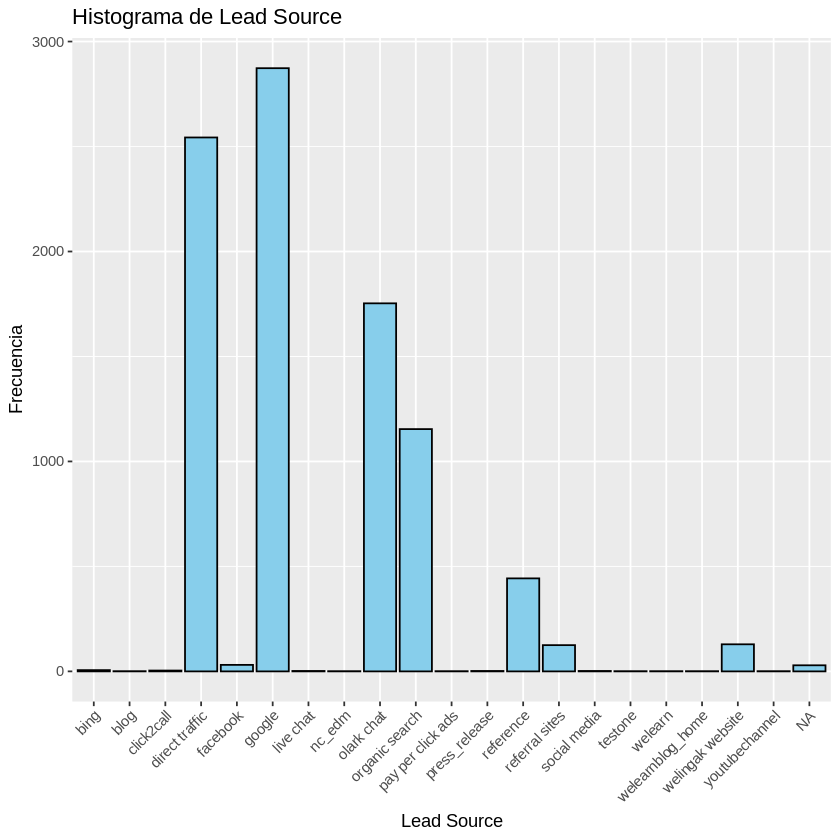

In [209]:
# prompt: histograma de la variable lead_source en db_subset

ggplot(df_subset, aes(x = lead_source)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Lead Source", x = "Lead Source", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [210]:
# prompt: completamos los nan de  lead_source usando la moda de esta columna

# Obtener la moda de la columna lead_source
moda_lead_source <- names(which.max(table(df_subset$lead_source)))

# Completar los valores NA en lead_source con la moda
df_subset$lead_source <- ifelse(is.na(df_subset$lead_source), moda_lead_source, df_subset$lead_source)

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


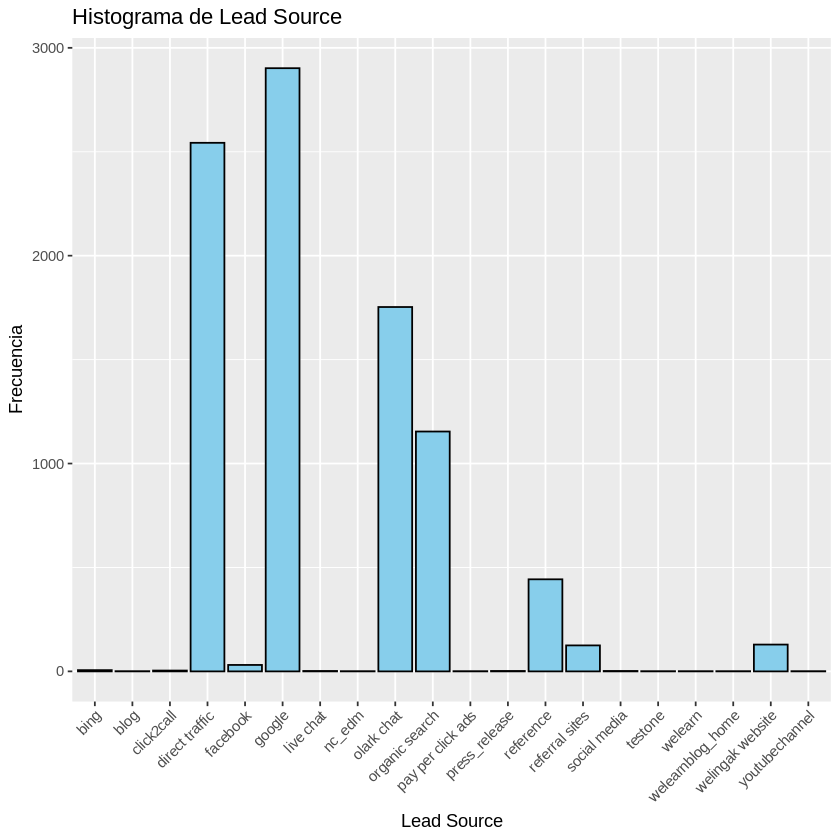

In [211]:
# prompt: histograma de la variable lead_source en db_subset

ggplot(df_subset, aes(x = lead_source)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Lead Source", x = "Lead Source", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Observamos lead_profile

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


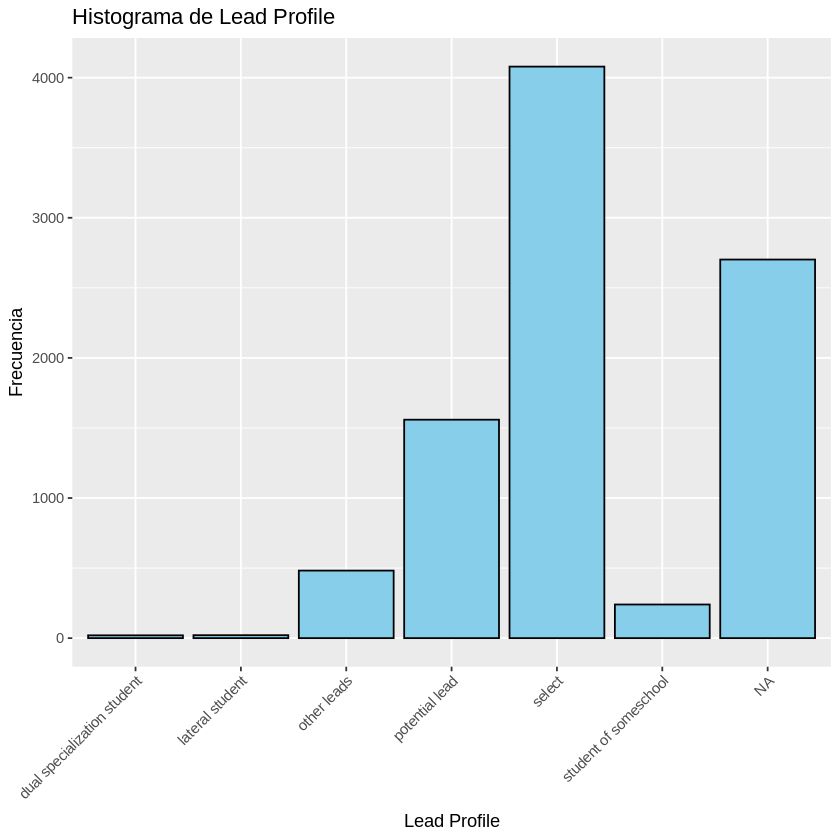

In [212]:
# prompt: hacemos un histograma ahora de lead_profile

ggplot(df_subset, aes(x = lead_profile)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Lead Profile", x = "Lead Profile", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [213]:
# prompt: quiero reemplazar los NAN en lead_profile con un "unassigned"

# Reemplazar NA en lead_profile con "unassigned"
df_subset$lead_profile[is.na(df_subset$lead_profile)] <- "unassigned"

# Verificar si se realizaron los cambios
table(df_subset$lead_profile)


dual specialization student             lateral student 
                         20                          21 
                other leads              potential lead 
                        482                        1559 
                     select       student of someschool 
                       4079                         240 
                 unassigned 
                       2702 

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


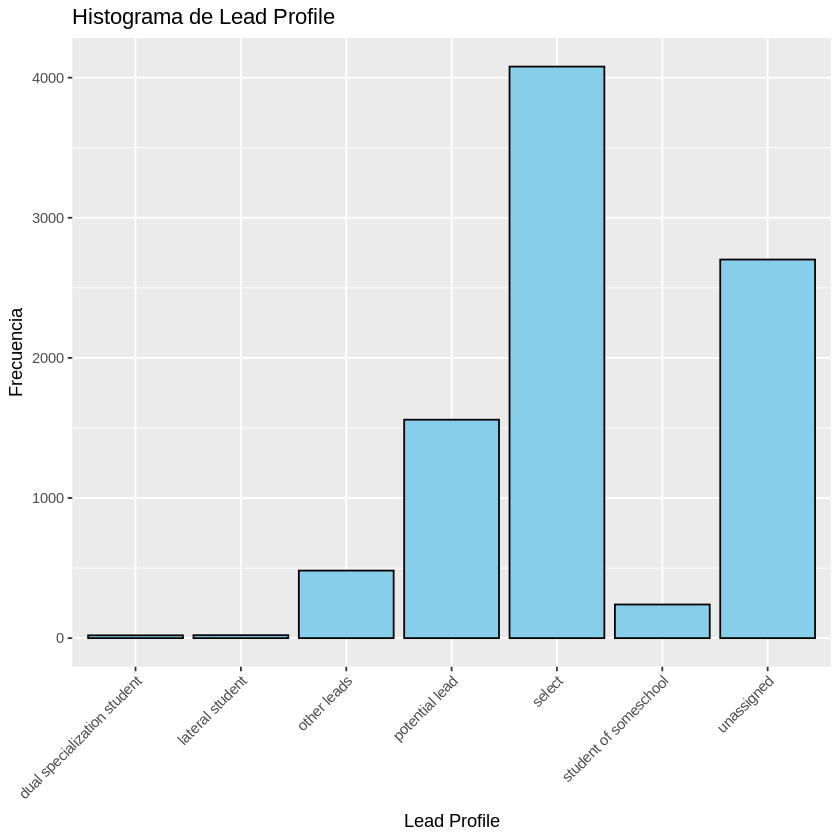

In [214]:
# prompt: hacemos un histograma ahora de lead_profile

ggplot(df_subset, aes(x = lead_profile)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Lead Profile", x = "Lead Profile", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Observamos ahora specialization

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


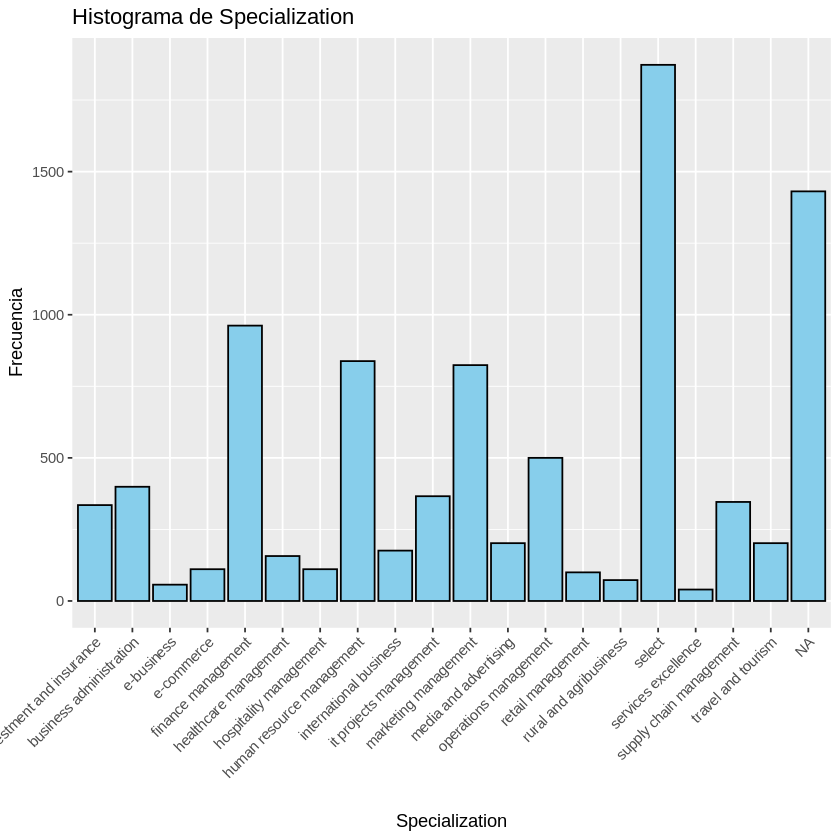

In [215]:
# prompt: hacemos un histograma de specialization

ggplot(df_subset, aes(x = specialization)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Specialization", x = "Specialization", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


banking, investment and insurance           business administration 
                              335                               399 
                       e-business                        e-commerce 
                               57                               111 
               finance management             healthcare management 
                              962                               157 
           hospitality management         human resource management 
                              111                               838 
           international business            it projects management 
                              176                               366 
             marketing management             media and advertising 
                              824                               202 
            operations management                 retail management 
                              500                               100 
           rural and agribusiness

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


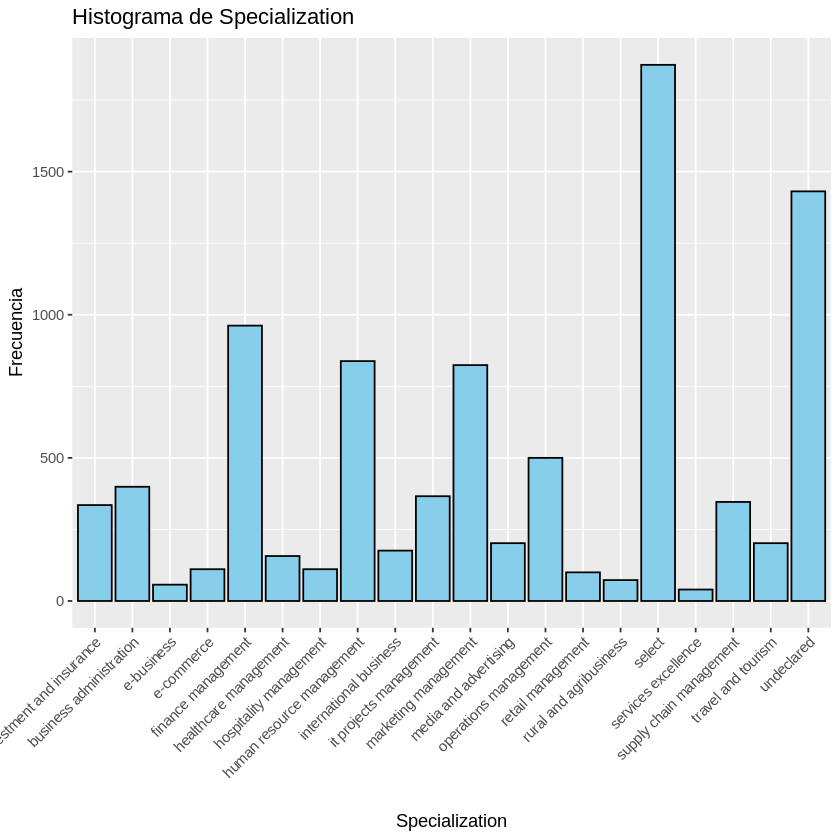

In [216]:
# prompt: completamos los valores nulos de especialization con "undeclared"

# Reemplazar NA en specialization con "undeclared"
df_subset$specialization[is.na(df_subset$specialization)] <- "undeclared"

# Verificar si se realizaron los cambios
table(df_subset$specialization)

ggplot(df_subset, aes(x = specialization)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Specialization", x = "Specialization", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Observamos ahora la variable country

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


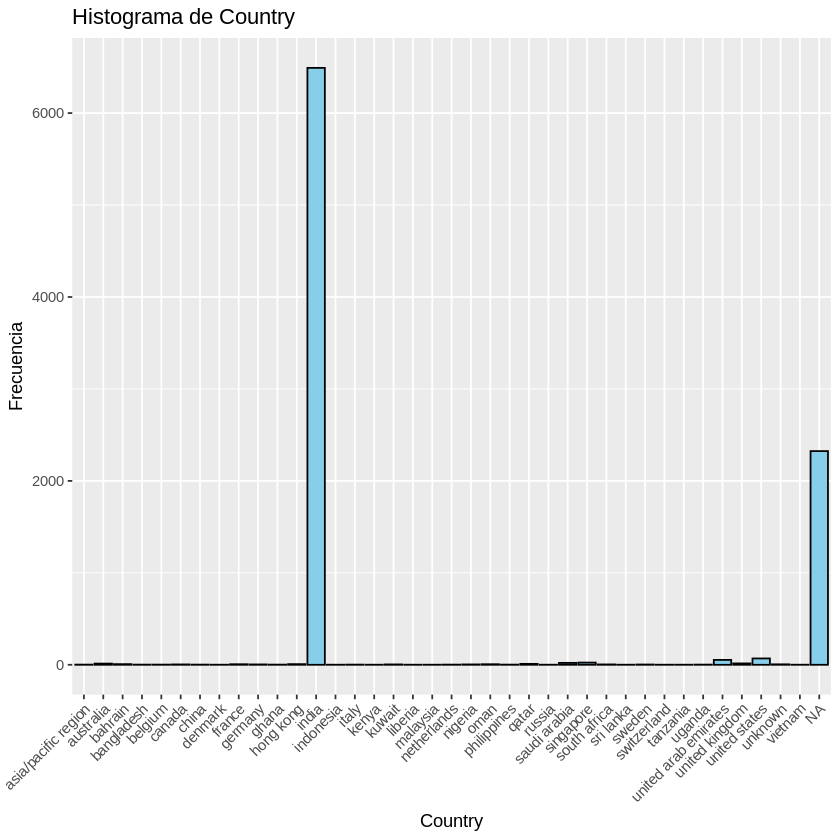

In [217]:
# prompt: hagamos un histograma de la variable country

ggplot(df_subset, aes(x = country)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Country", x = "Country", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


 asia/pacific region            australia              bahrain 
                   2                   13                    7 
          bangladesh              belgium               canada 
                   2                    2                    4 
               china              denmark               france 
                   2                    1                    6 
             germany                ghana            hong kong 
                   4                    2                    7 
               india            indonesia                italy 
                6492                    1                    2 
               kenya               kuwait              liberia 
                   1                    4                    1 
            malaysia          netherlands              nigeria 
                   1                    2                    4 
                oman          philippines                qatar 
                   6                   

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


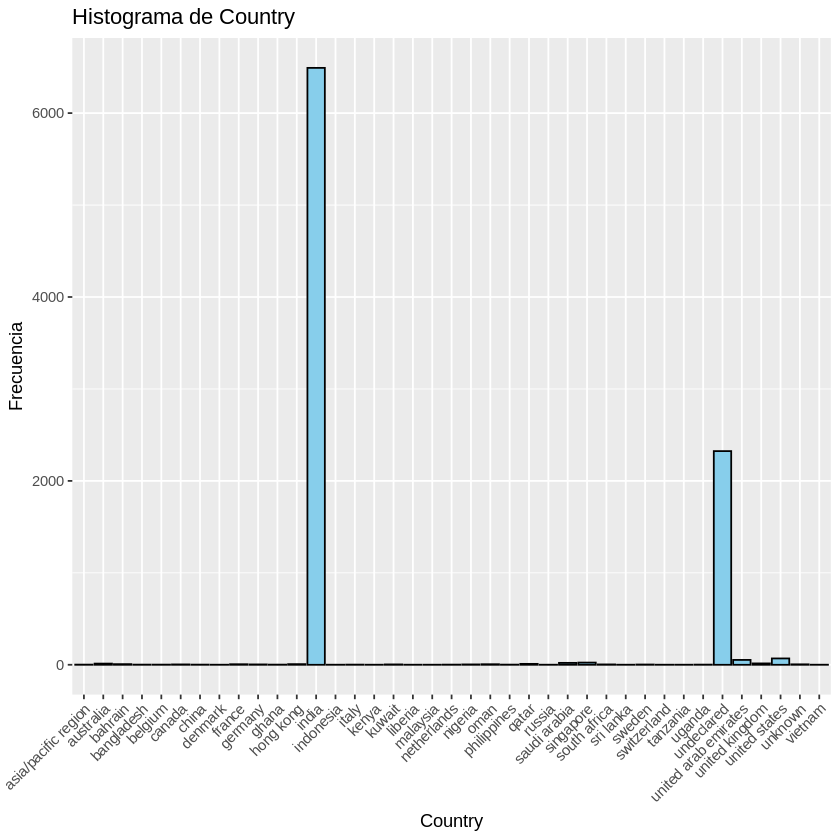

In [218]:
# prompt: reemplacemos los nan de country con "undeclared"

# Reemplazar NA en country con "undeclared"
df_subset$country[is.na(df_subset$country)] <- "undeclared"

# Verificar si se realizaron los cambios
table(df_subset$country)

ggplot(df_subset, aes(x = country)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Country", x = "Country", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Observamos la variable city

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


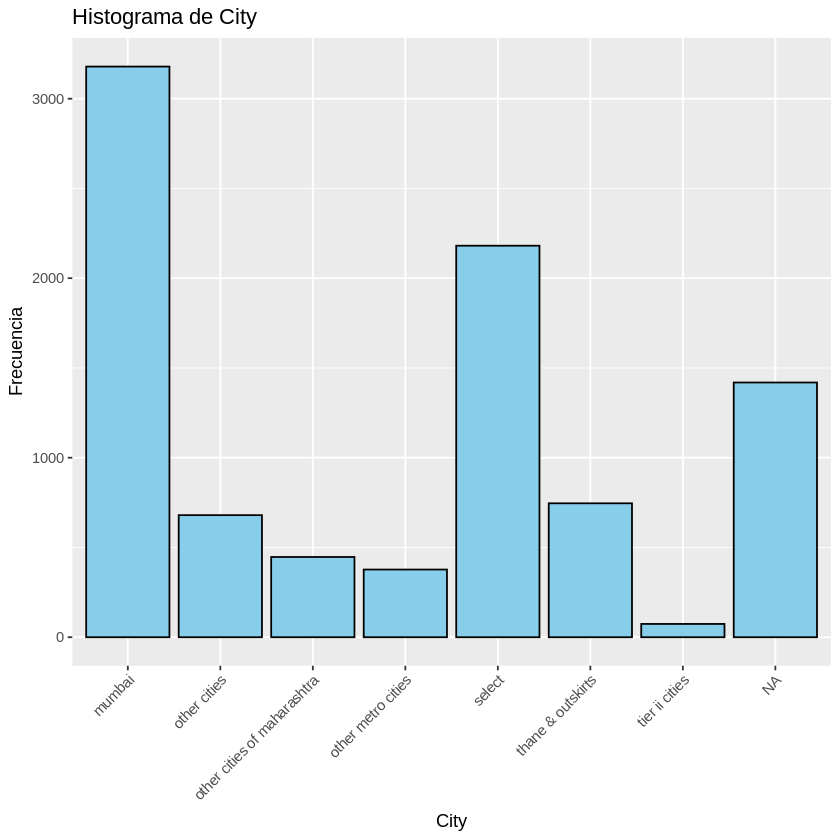

In [219]:
# prompt: hagamos un histograma de la variable city

ggplot(df_subset, aes(x = city)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de City", x = "City", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


                     mumbai                other cities 
                       3179                         680 
other cities of maharashtra          other metro cities 
                        447                         377 
                     select           thane & outskirts 
                       2181                         746 
             tier ii cities                  undeclared 
                         74                        1419 

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


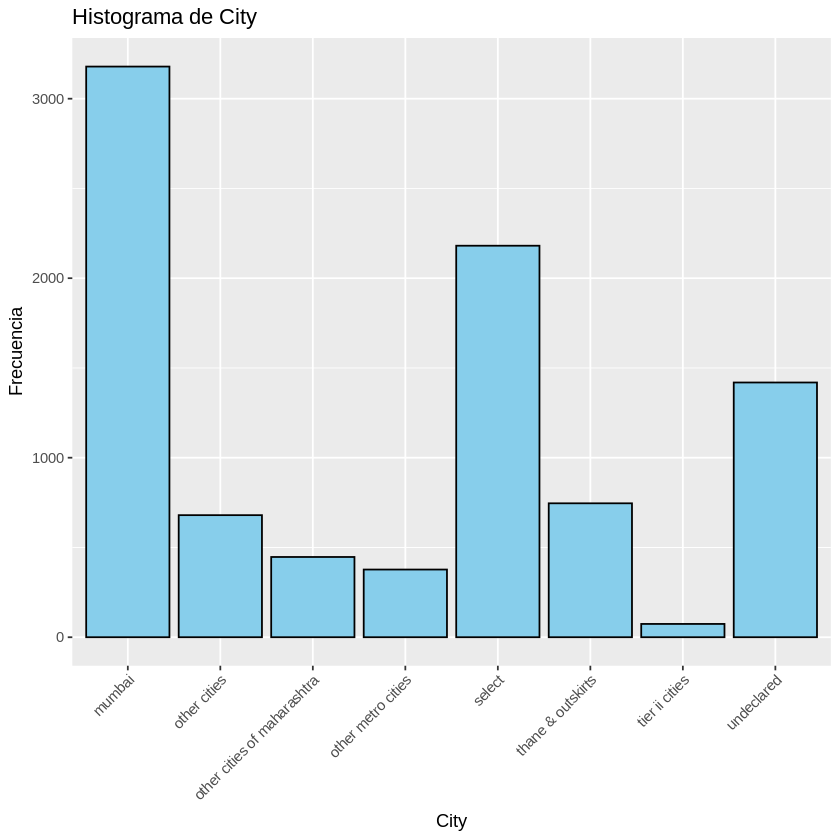

In [220]:
# prompt: reemplacemos los nan de city con "undeclared"

# Reemplazar NA en city con "undeclared"
df_subset$city[is.na(df_subset$city)] <- "undeclared"

# Verificar si se realizaron los cambios
table(df_subset$city)

ggplot(df_subset, aes(x = city)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de City", x = "City", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


 asia/pacific region            australia               canada 
                   2                    1                    1 
               ghana                india                italy 
                   1                  555                    1 
        south africa           undeclared united arab emirates 
                   1                  837                    3 
      united kingdom        united states              unknown 
                   1                   11                    5 


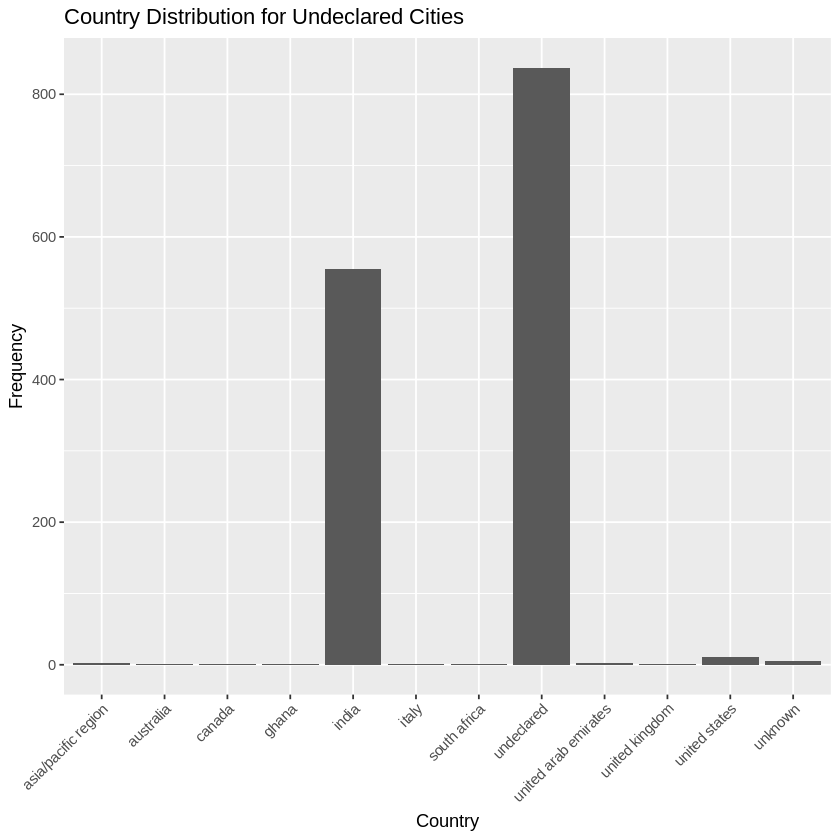

In [221]:
# prompt: quiero analizar a que country corresponden los valores que estan en undelcarate en city

# Analyze the 'country' values corresponding to 'undeclared' in 'city'

# Create a subset of the data where city is 'undeclared'
undeclared_cities <- df_subset[df_subset$city == "undeclared", ]

# Analyze the distribution of countries in this subset
country_distribution <- table(undeclared_cities$country)

# Print the distribution
print(country_distribution)

# Visualize the distribution
ggplot(undeclared_cities, aes(x = country)) +
  geom_bar() +
  labs(title = "Country Distribution for Undeclared Cities",
       x = "Country",
       y = "Frequency") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


#Further analysis can be done, for example, calculating proportions
#or focusing on specific countries of interest within this subset.

In [222]:
# prompt: quiero observar cuantas citys hay en country  india

# Filter the data for India
india_data <- df_subset[df_subset$country == "india", ]

# Count the unique cities in India
unique_cities_india <- length(unique(india_data$city))

# Print the result
cat("Number of unique cities in India:", unique_cities_india, "\n")

Number of unique cities in India: 8 


Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


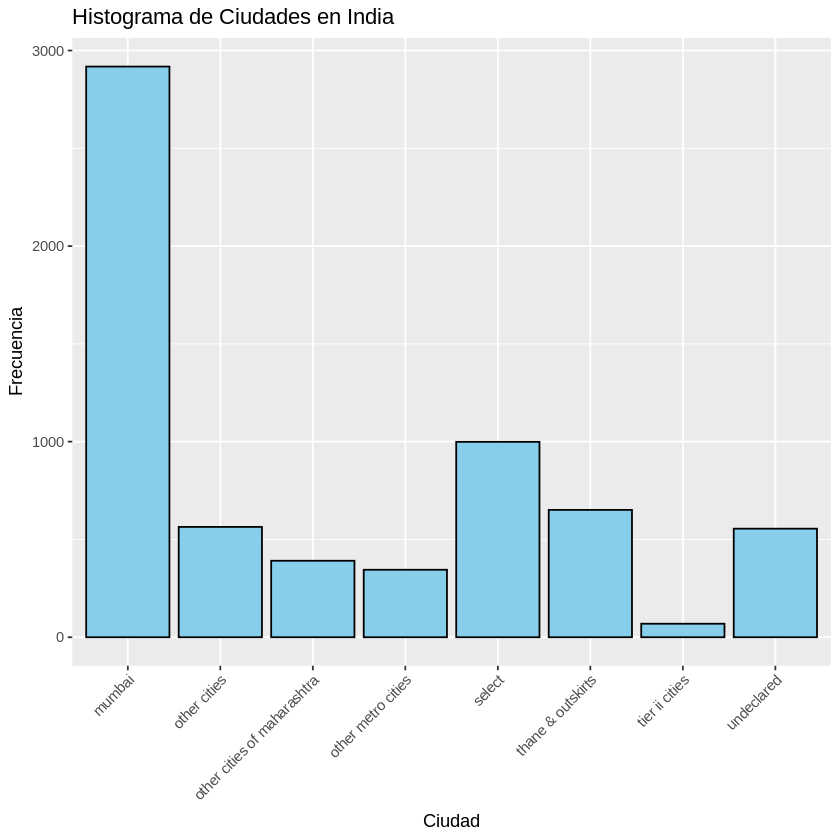

In [223]:
# prompt: grafica las ciudades de india en un histograma

# Create the histogram for cities in India
ggplot(india_data, aes(x = city)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Ciudades en India", x = "Ciudad", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [224]:
# prompt: los valores de city que estén como "undeclared" y sean de country "India" quiero que sean reemplazados por la moda que es "Mumbai"

# Calculate the mode of 'city' for India
india_city_mode <- names(which.max(table(df_subset$city[df_subset$country == "india"])))

# Replace "undeclared" city values in India with the mode
df_subset <- df_subset %>%
  mutate(city = ifelse(country == "india" & city == "undeclared", india_city_mode, city))

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


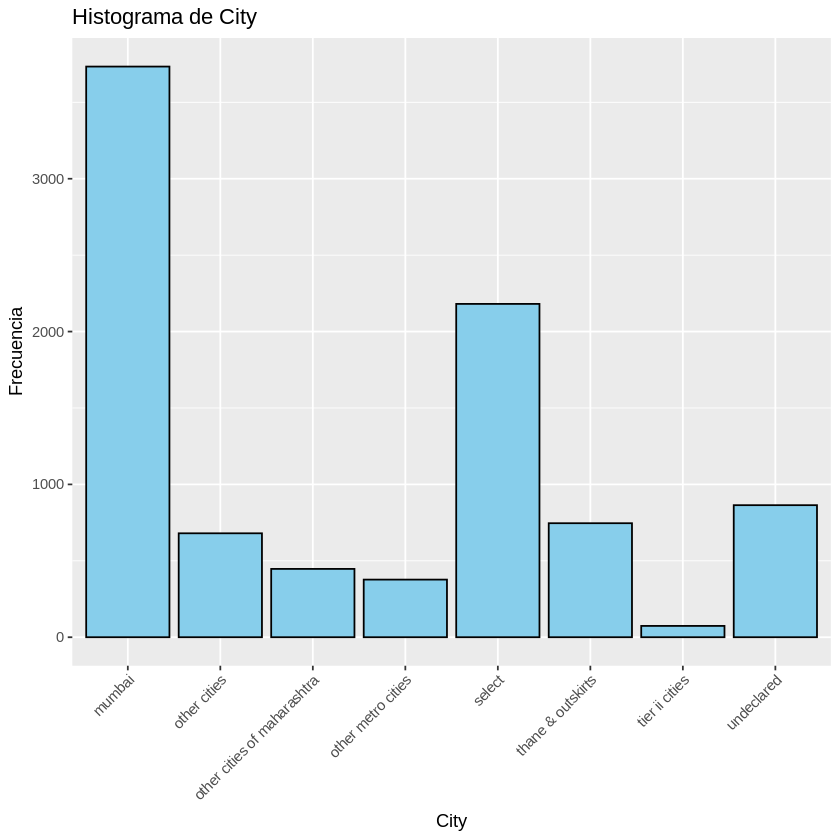

In [225]:
# prompt: muestrame un histograma de citys

ggplot(df_subset, aes(x = city)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de City", x = "City", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Analizamos ahora lead_quality

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


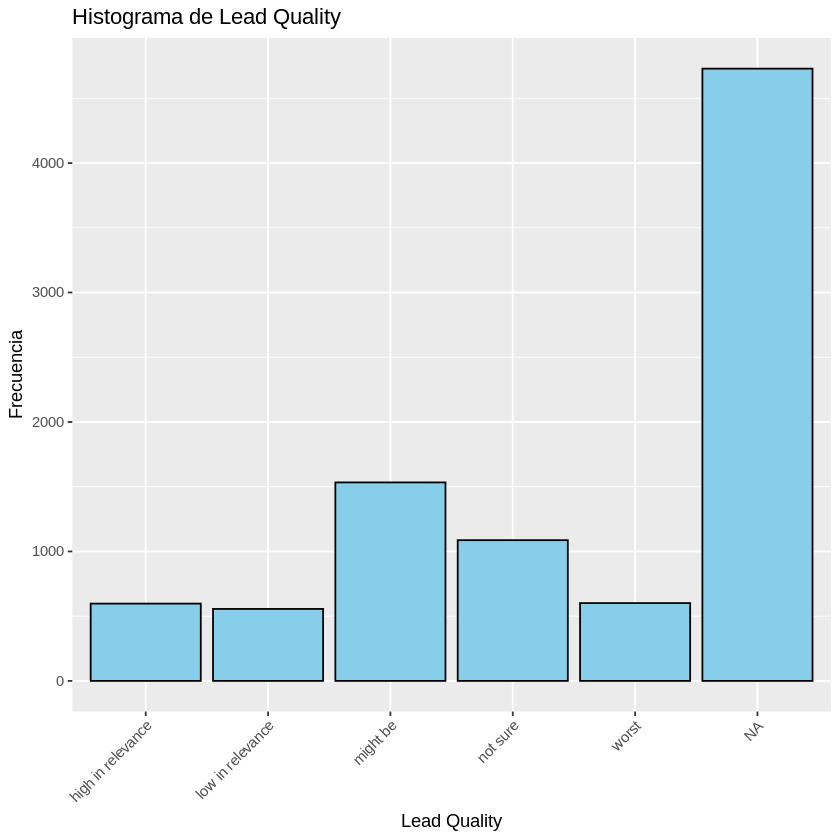

In [226]:
# prompt: un hiustorgrama de lead_quality

ggplot(df_subset, aes(x = lead_quality)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Lead Quality", x = "Lead Quality", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


high in relevance  low in relevance          might be          not sure 
              597               556              1533              1087 
       unassigned             worst 
             4729               601 

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


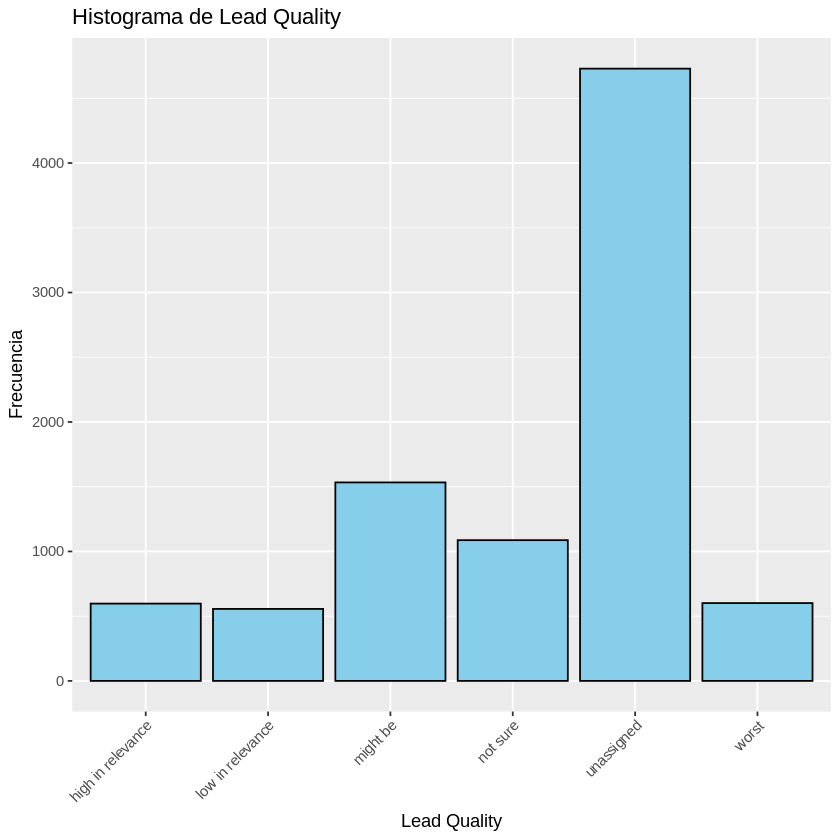

In [227]:
# prompt: convetimos los nan de lead_quality en unassigned

# Reemplazar NA en lead_quality con "unassigned"
df_subset$lead_quality[is.na(df_subset$lead_quality)] <- "unassigned"

# Verificar si se realizaron los cambios
table(df_subset$lead_quality)

ggplot(df_subset, aes(x = lead_quality)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Lead Quality", x = "Lead Quality", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Observamos ahora tags

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


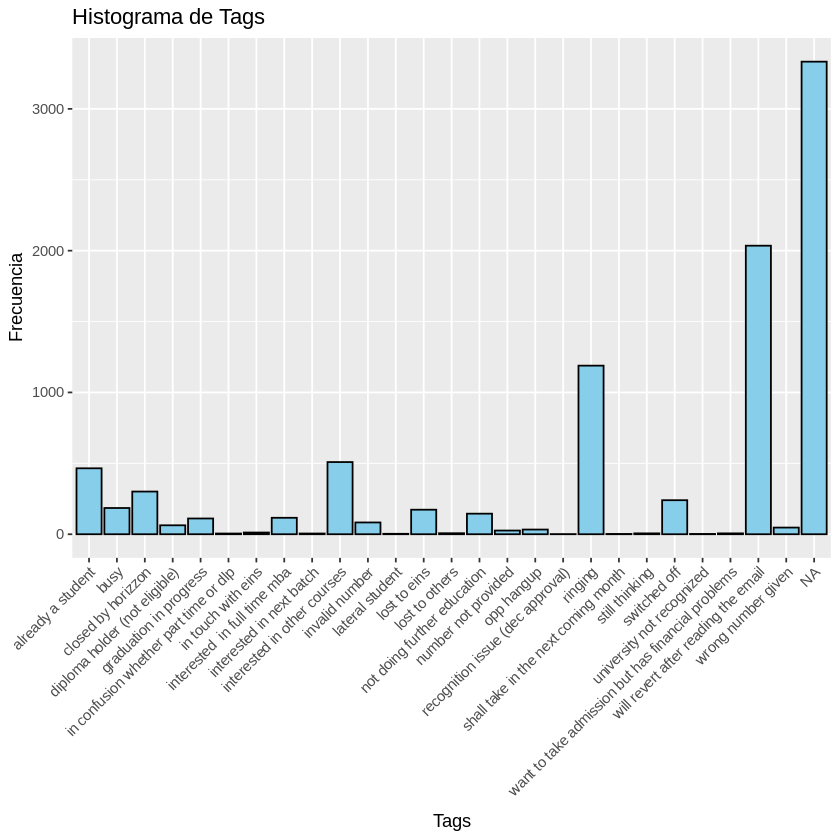

In [228]:
# prompt: histograma de tags

ggplot(df_subset, aes(x = tags)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Tags", x = "Tags", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))




                                already a student 
                                              465 
                                             busy 
                                              185 
                               closed by horizzon 
                                              301 
                    diploma holder (not eligible) 
                                               63 
                           graduation in progress 
                                              111 
            in confusion whether part time or dlp 
                                                5 
                               in touch with eins 
                                               12 
                     interested  in full time mba 
                                              116 
                         interested in next batch 
                                                5 
                      interested in other courses 
                              

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


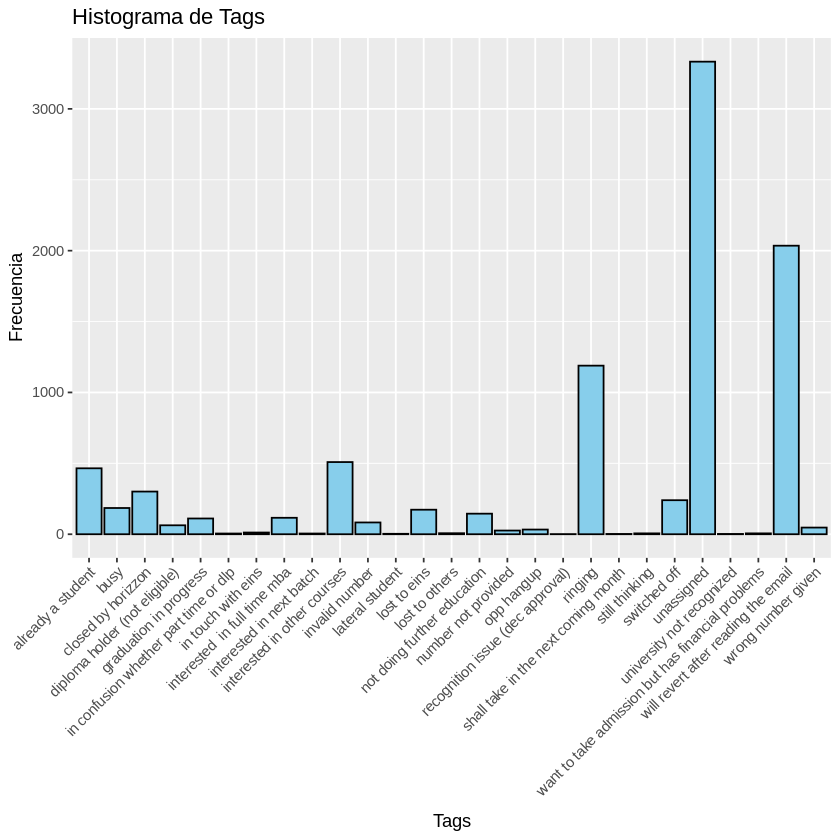

In [229]:
# Reemplazar NA en tags con "unassigned"
df_subset$tags[is.na(df_subset$tags)] <- "unassigned"

# Verificar si se realizaron los cambios
table(df_subset$tags)

ggplot(df_subset, aes(x = tags)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Tags", x = "Tags", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Observamos los valores de activiy indes

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


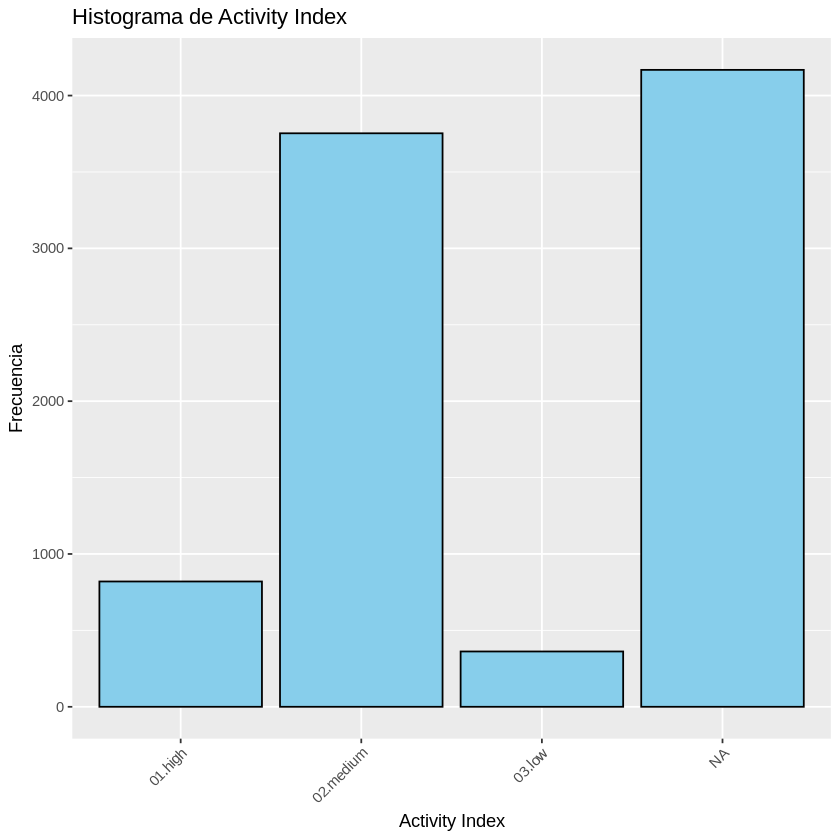

In [230]:
ggplot(df_subset, aes(x = activiy_index)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Activity Index", x = "Activity Index", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



   01.high  02.medium     03.low unassigned 
       820       3753        362       4168 

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


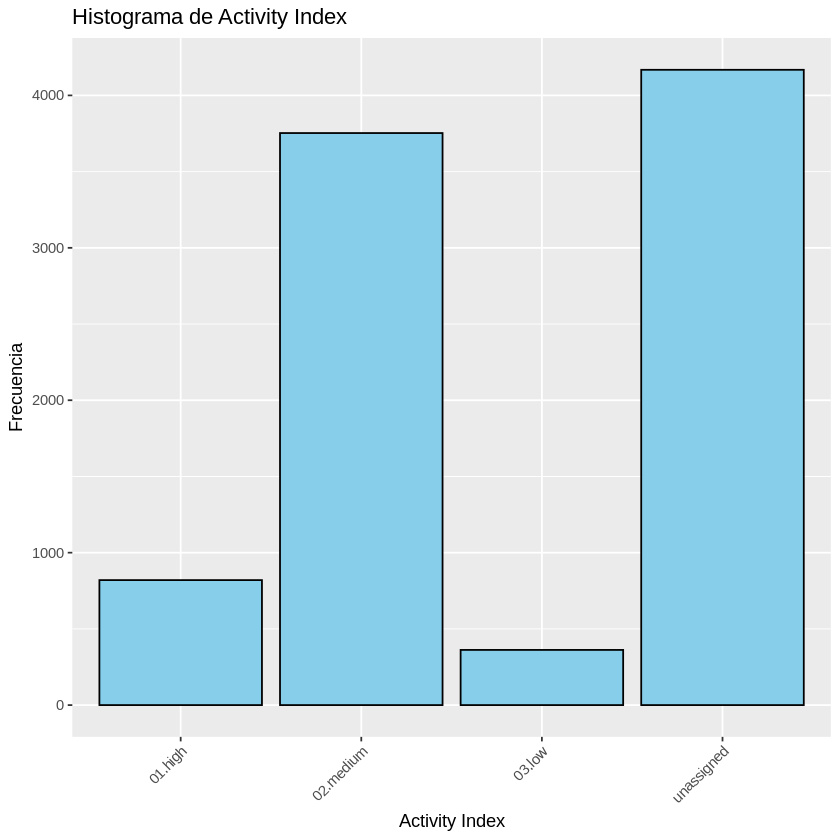

In [231]:
# prompt: reemplazamos los nan de activiy_index con unassigned

# Reemplazar NA en activiy_index con "unassigned"
df_subset$activiy_index[is.na(df_subset$activiy_index)] <- "unassigned"

# Verificar si se realizaron los cambios
table(df_subset$activiy_index)

ggplot(df_subset, aes(x = activiy_index)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Activity Index", x = "Activity Index", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Ahora observamos profile_index

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


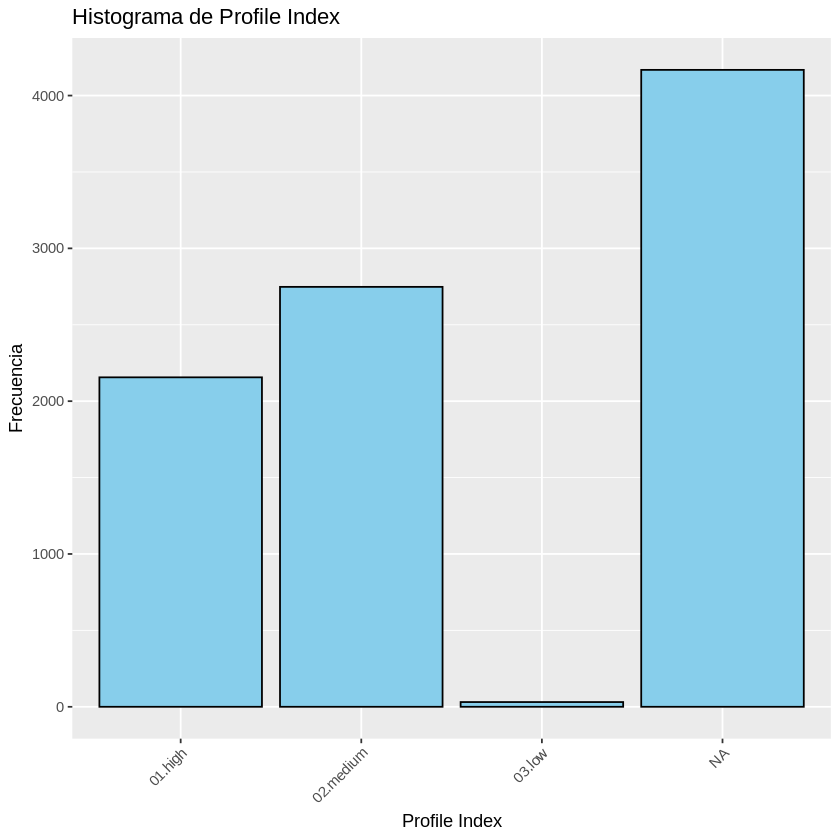

In [232]:
# prompt: histograma de profile_index

ggplot(df_subset, aes(x = profile_index)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Profile Index", x = "Profile Index", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


   01.high  02.medium     03.low unassigned 
      2156       2748         31       4168 

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


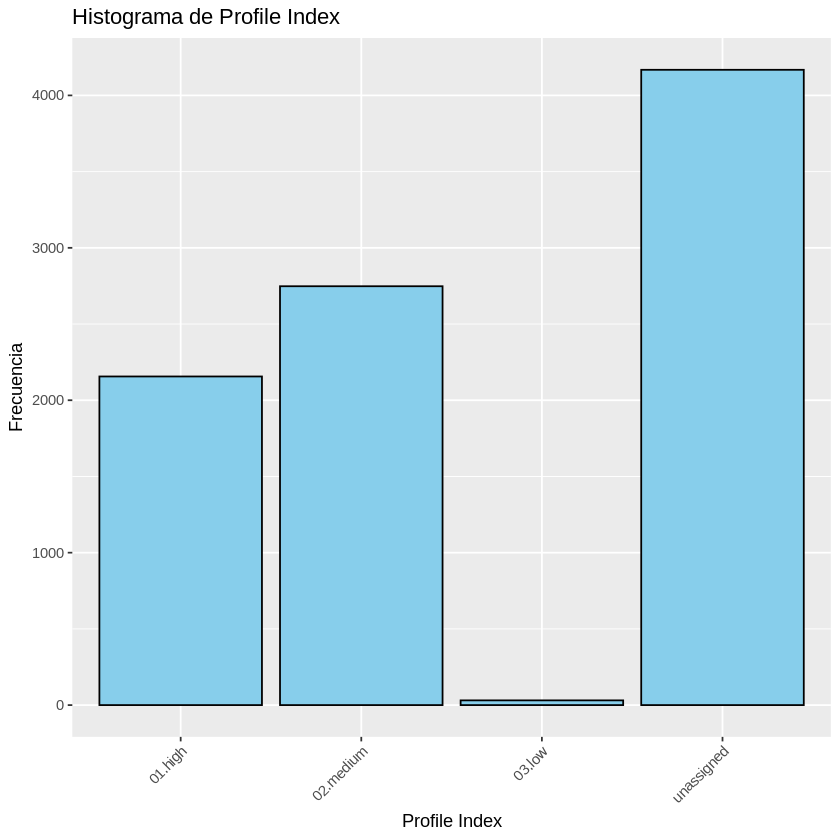

In [233]:
# prompt: reemplazamos los nan de profile_index con "unassigned"

# Reemplazar NA en profile_index con "unassigned"
df_subset$profile_index[is.na(df_subset$profile_index)] <- "unassigned"

# Verificar si se realizaron los cambios
table(df_subset$profile_index)

ggplot(df_subset, aes(x = profile_index)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Profile Index", x = "Profile Index", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### La observacón para scores la omitmos ya que efectivamente se está repitiendo el patron


In [234]:
# prompt: corregimos los nan de activiy_score y profile_score por "unassigned"

# Reemplazar NA en activity_score con "unassigned"
df_subset$activity_score[is.na(df_subset$activity_score)] <- "unassigned"

# Verificar si se realizaron los cambios
table(df_subset$activity_score)

# Reemplazar NA en profile_score con "unassigned"
df_subset$profile_score[is.na(df_subset$profile_score)] <- "unassigned"

# Verificar si se realizaron los cambios
table(df_subset$profile_score)


        10         11         12         13         14         15         16 
        57         95        196        752       1712       1289        467 
        17         18          7          8          9 unassigned 
       348          5          1          4          9       4168 


        11         12         13         14         15         16         17 
         9         22        198        220       1736        594        568 
        18         19         20 unassigned 
      1066        224        298       4168 

## Observamos la nueva cantidad de calores nulos ahora

In [235]:
# Total de filas del dataset
total_filas <- nrow(df_subset)

# Calcular cantidad de NAs por columna
na_counts <- colSums(is.na(df_subset))

# Calcular porcentaje de NAs
na_percentage <- round(na_counts / total_filas * 100, 2)

# Crear tabla resumen
na_summary_df <- data.frame(
  #variable = names(na_counts),
  na_count = as.vector(na_counts),
  na_percentage = na_percentage
)

# Mostrar tabla
print(na_summary_df)

                 na_count na_percentage
time_on_site            0             0
total_visits            0             0
lead_source             0             0
lead_origin             0             0
lead_quality            0             0
lead_profile            0             0
specialization          0             0
country                 0             0
city                    0             0
no_email                0             0
no_call                 0             0
from_ads                0             0
from_search             0             0
from_magazine           0             0
from_article            0             0
from_forum              0             0
from_newspaper          0             0
tags                    0             0
page_views_visit        0             0
activiy_index           0             0
profile_index           0             0
activity_score          0             0
profile_score           0             0
free_copy               0             0


### DF Hasta el momento: df_susbset

In [236]:
head(df_subset)

time_on_site,total_visits,lead_source,lead_origin,lead_quality,lead_profile,specialization,country,city,no_email,⋯,from_article,from_forum,from_newspaper,tags,page_views_visit,activiy_index,profile_index,activity_score,profile_score,free_copy
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0,0,olark chat,api,low in relevance,select,select,undeclared,select,no,⋯,no,no,no,interested in other courses,0.0,02.medium,02.medium,15,15,no
674,5,organic search,api,unassigned,select,select,india,select,no,⋯,no,no,no,ringing,2.5,02.medium,02.medium,15,15,no
1532,2,direct traffic,landing page submission,might be,potential lead,business administration,india,mumbai,no,⋯,no,no,no,will revert after reading the email,2.0,02.medium,01.high,14,20,yes
305,1,direct traffic,landing page submission,not sure,select,media and advertising,india,mumbai,no,⋯,no,no,no,ringing,1.0,02.medium,01.high,13,17,no
1428,2,google,landing page submission,might be,select,select,india,mumbai,no,⋯,no,no,no,will revert after reading the email,1.0,02.medium,01.high,15,18,no
0,0,olark chat,api,unassigned,unassigned,undeclared,undeclared,undeclared,no,⋯,no,no,no,unassigned,0.0,01.high,02.medium,17,15,no


In [237]:
summary(df_subset)

  time_on_site     total_visits     lead_source        lead_origin       
 Min.   :   0.0   Min.   :  0.000   Length:9103        Length:9103       
 1st Qu.:   9.0   1st Qu.:  1.000   Class :character   Class :character  
 Median : 244.0   Median :  3.000   Mode  :character   Mode  :character  
 Mean   : 481.4   Mean   :  3.445                                        
 3rd Qu.: 919.5   3rd Qu.:  5.000                                        
 Max.   :2272.0   Max.   :251.000                                        
 lead_quality       lead_profile       specialization       country         
 Length:9103        Length:9103        Length:9103        Length:9103       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

## Convertimos variables categóricas en numéricas

In [238]:
# Crear una copia para no modificar el original
df_encoded <- df_subset

# Detectar columnas categóricas (character o factor)
cat_cols <- names(df_encoded)[sapply(df_encoded, function(x) is.character(x) | is.factor(x))]

# Crear una lista para guardar los niveles de cada variable categórica
categorical_mappings <- list()

# Convertir cada variable categórica en numérica y guardar los niveles
for (col in cat_cols) {
  df_encoded[[col]] <- as.factor(df_encoded[[col]])
  categorical_mappings[[col]] <- levels(df_encoded[[col]])
  df_encoded[[col]] <- as.numeric(df_encoded[[col]])
}


## Observamos las etiquetas

In [239]:
# Mostrar todas las variables codificadas y sus niveles
for (col in names(categorical_mappings)) {
  cat("Variable:", col, "\n")
  print(categorical_mappings[[col]])
  cat("\n")
}



Variable: lead_source 
 [1] "bing"              "blog"              "click2call"       
 [4] "direct traffic"    "facebook"          "google"           
 [7] "live chat"         "nc_edm"            "olark chat"       
[10] "organic search"    "pay per click ads" "press_release"    
[13] "reference"         "referral sites"    "social media"     
[16] "testone"           "welearn"           "welearnblog_home" 
[19] "welingak website"  "youtubechannel"   

Variable: lead_origin 
[1] "api"                     "landing page submission"
[3] "lead add form"           "lead import"            

Variable: lead_quality 
[1] "high in relevance" "low in relevance"  "might be"         
[4] "not sure"          "unassigned"        "worst"            

Variable: lead_profile 
[1] "dual specialization student" "lateral student"            
[3] "other leads"                 "potential lead"             
[5] "select"                      "student of someschool"      
[7] "unassigned"                 

V

## DF FINAL: df_encoded

In [240]:
head(df_encoded)
summary(df_encoded)

time_on_site,total_visits,lead_source,lead_origin,lead_quality,lead_profile,specialization,country,city,no_email,⋯,from_article,from_forum,from_newspaper,tags,page_views_visit,activiy_index,profile_index,activity_score,profile_score,free_copy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,9,1,2,5,16,34,5,1,⋯,1,1,1,10,0.0,2,2,6,5,1
674,5,10,1,5,5,16,13,5,1,⋯,1,1,1,19,2.5,2,2,6,5,1
1532,2,4,2,3,4,2,13,1,1,⋯,1,1,1,26,2.0,2,1,5,10,2
305,1,4,2,4,5,12,13,1,1,⋯,1,1,1,19,1.0,2,1,4,7,1
1428,2,6,2,3,5,16,13,1,1,⋯,1,1,1,26,1.0,2,1,6,8,1
0,0,9,1,5,7,20,34,8,1,⋯,1,1,1,23,0.0,1,2,8,5,1


  time_on_site     total_visits      lead_source      lead_origin   
 Min.   :   0.0   Min.   :  0.000   Min.   : 1.000   Min.   :1.000  
 1st Qu.:   9.0   1st Qu.:  1.000   1st Qu.: 4.000   1st Qu.:1.000  
 Median : 244.0   Median :  3.000   Median : 6.000   Median :2.000  
 Mean   : 481.4   Mean   :  3.445   Mean   : 7.162   Mean   :1.681  
 3rd Qu.: 919.5   3rd Qu.:  5.000   3rd Qu.: 9.000   3rd Qu.:2.000  
 Max.   :2272.0   Max.   :251.000   Max.   :20.000   Max.   :4.000  
  lead_quality    lead_profile   specialization     country     
 Min.   :1.000   Min.   :1.000   Min.   : 1.00   Min.   : 1.00  
 1st Qu.:3.000   1st Qu.:5.000   1st Qu.: 8.00   1st Qu.:13.00  
 Median :5.000   Median :5.000   Median :13.00   Median :13.00  
 Mean   :4.164   Mean   :5.327   Mean   :12.09   Mean   :18.81  
 3rd Qu.:5.000   3rd Qu.:7.000   3rd Qu.:16.00   3rd Qu.:34.00  
 Max.   :6.000   Max.   :7.000   Max.   :20.00   Max.   :39.00  
      city          no_email       no_call     from_ads  from_

## Analizamos comportamiento de variable entre si y con la variable objetivo

Calculamos matriz de correlaciones

In [241]:
# cor_matrix <- cor(df_encoded, use = "complete.obs")




Graficamos la matriz de correlaciones para observar la interacción entre variables

In [242]:
# ggcorrplot(cor_matrix,
#            method = "circle",       # También puedes usar "square"
#            type = "upper",          # Solo triángulo superior
#            lab = TRUE,              # Mostrar valores
#            lab_size = 3,
#            colors = c("red", "white", "blue"),
#            title = "Matriz de correlación",
#            ggtheme = ggplot2::theme_minimal())

## Analizamos el comportamiento de las variables en aspectos generales

#### Histogramas masivos como primera observación

### Observamos la variable objetivo pages views per visit

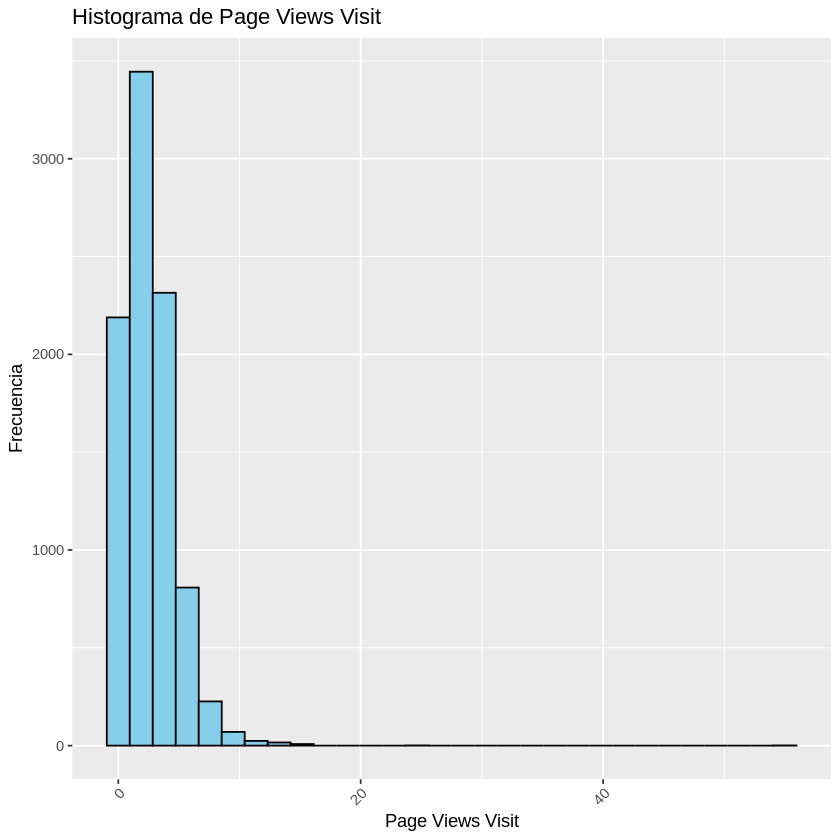

In [243]:
# prompt: histograma de pages view visit

# Assuming 'df_subset' is your data frame and 'page_views_visit' is a column

library(ggplot2)

ggplot(df_subset, aes(x = page_views_visit)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Histograma de Page Views Visit", x = "Page Views Visit", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [244]:
# prompt: cuantos valores de page views visit hay mayores a 16

# Assuming df_subset is your data frame and page_views_visit is a column

# Calculate the number of values greater than 16
num_greater_than_16 <- sum(df_subset$page_views_visit > 16, na.rm = TRUE)

# Print the result
cat("Number of page views visit values greater than 16:", num_greater_than_16, "\n")

Number of page views visit values greater than 16: 2 


In [245]:
# prompt: quiero observar los valores con Number of page views visit values greater than 16

# Assuming df_subset is your data frame and page_views_visit is a column

# Subset the data frame to include only rows where 'page_views_visit' is greater than 16
subset_data <- df_subset[df_subset$page_views_visit > 16, ]

# Print the subset
subset_data

time_on_site,total_visits,lead_source,lead_origin,lead_quality,lead_profile,specialization,country,city,no_email,⋯,from_article,from_forum,from_newspaper,tags,page_views_visit,activiy_index,profile_index,activity_score,profile_score,free_copy
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
297,55,direct traffic,landing page submission,unassigned,select,it projects management,india,other cities,yes,⋯,no,no,no,unassigned,55,01.high,02.medium,17,13,yes
1527,24,organic search,api,unassigned,unassigned,undeclared,unknown,undeclared,no,⋯,no,no,no,unassigned,24,unassigned,unassigned,unassigned,unassigned,no


In [246]:
# prompt: eliminamos los registros con Number of page views visit values greater than 16

# Assuming df_subset is your data frame and page_views_visit is a column

# Filter out rows where 'page_views_visit' is greater than 16
df_subset <- df_subset[df_subset$page_views_visit <= 16, ]

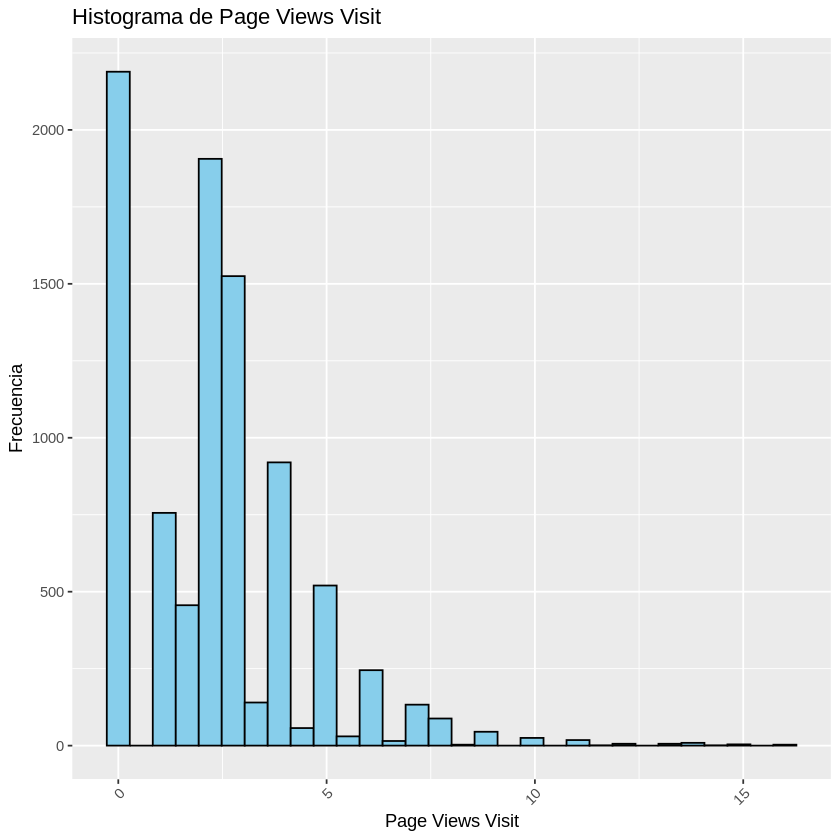

In [247]:
ggplot(df_subset, aes(x = page_views_visit)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Histograma de Page Views Visit", x = "Page Views Visit", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [248]:

head(df_subset)


time_on_site,total_visits,lead_source,lead_origin,lead_quality,lead_profile,specialization,country,city,no_email,⋯,from_article,from_forum,from_newspaper,tags,page_views_visit,activiy_index,profile_index,activity_score,profile_score,free_copy
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0,0,olark chat,api,low in relevance,select,select,undeclared,select,no,⋯,no,no,no,interested in other courses,0.0,02.medium,02.medium,15,15,no
674,5,organic search,api,unassigned,select,select,india,select,no,⋯,no,no,no,ringing,2.5,02.medium,02.medium,15,15,no
1532,2,direct traffic,landing page submission,might be,potential lead,business administration,india,mumbai,no,⋯,no,no,no,will revert after reading the email,2.0,02.medium,01.high,14,20,yes
305,1,direct traffic,landing page submission,not sure,select,media and advertising,india,mumbai,no,⋯,no,no,no,ringing,1.0,02.medium,01.high,13,17,no
1428,2,google,landing page submission,might be,select,select,india,mumbai,no,⋯,no,no,no,will revert after reading the email,1.0,02.medium,01.high,15,18,no
0,0,olark chat,api,unassigned,unassigned,undeclared,undeclared,undeclared,no,⋯,no,no,no,unassigned,0.0,01.high,02.medium,17,15,no


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


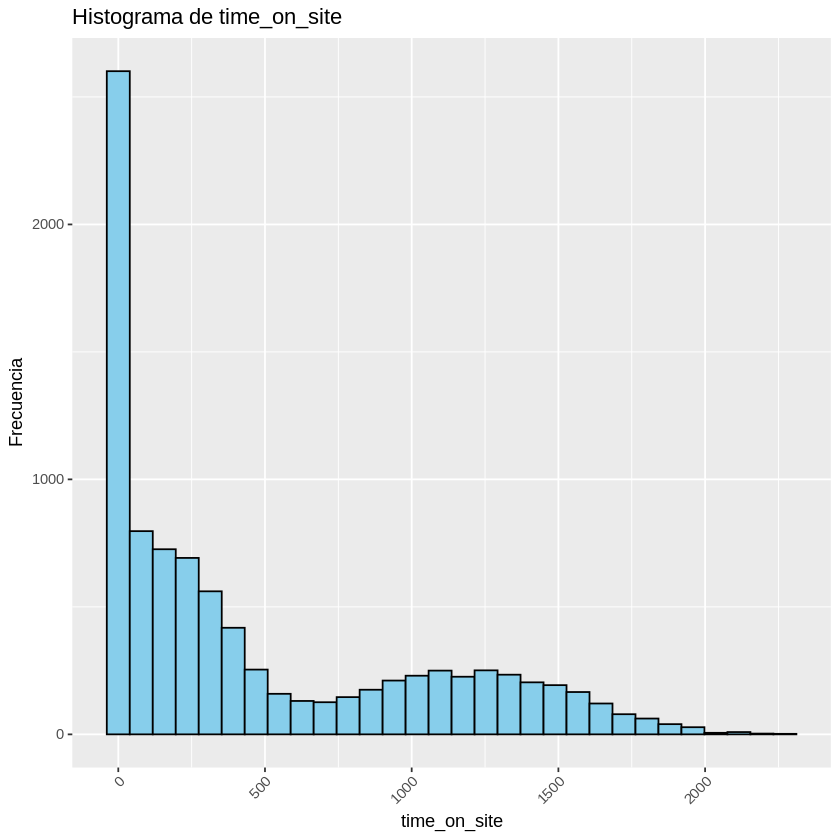

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


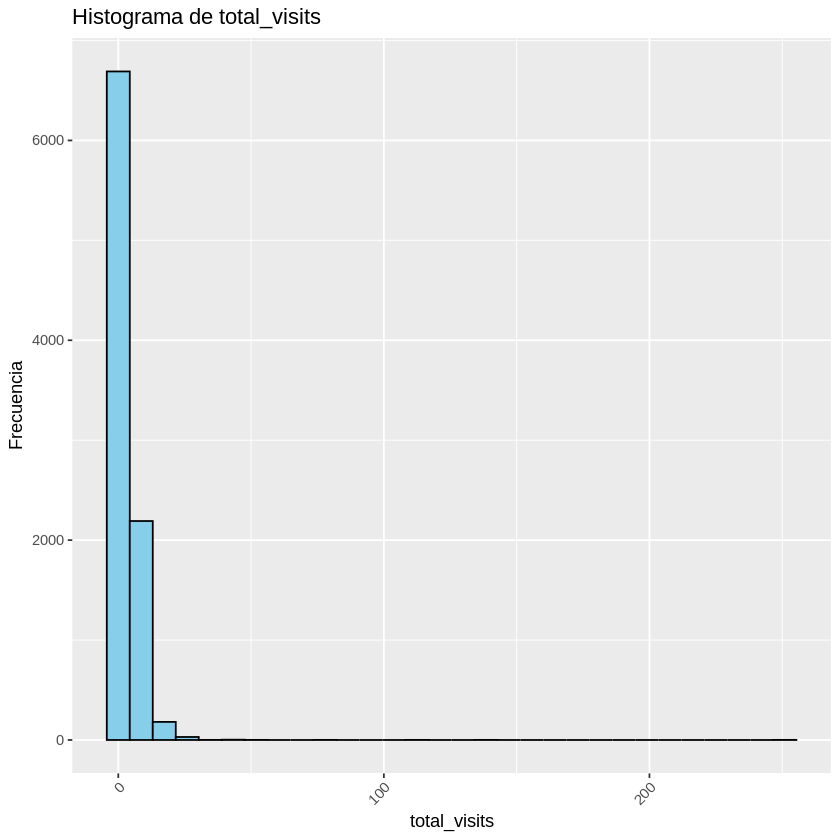

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


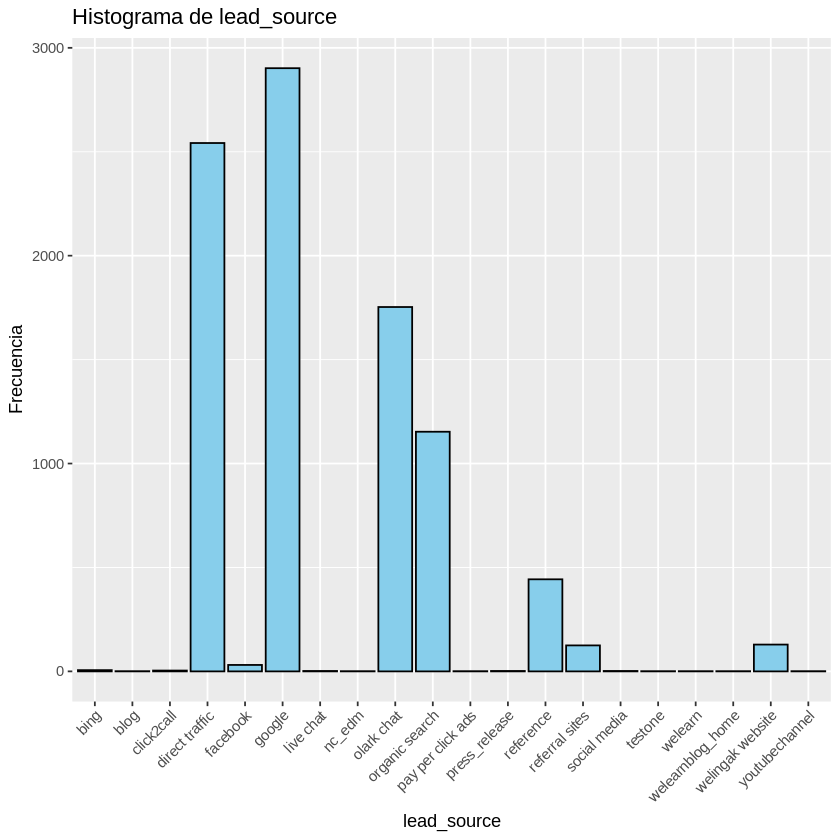

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


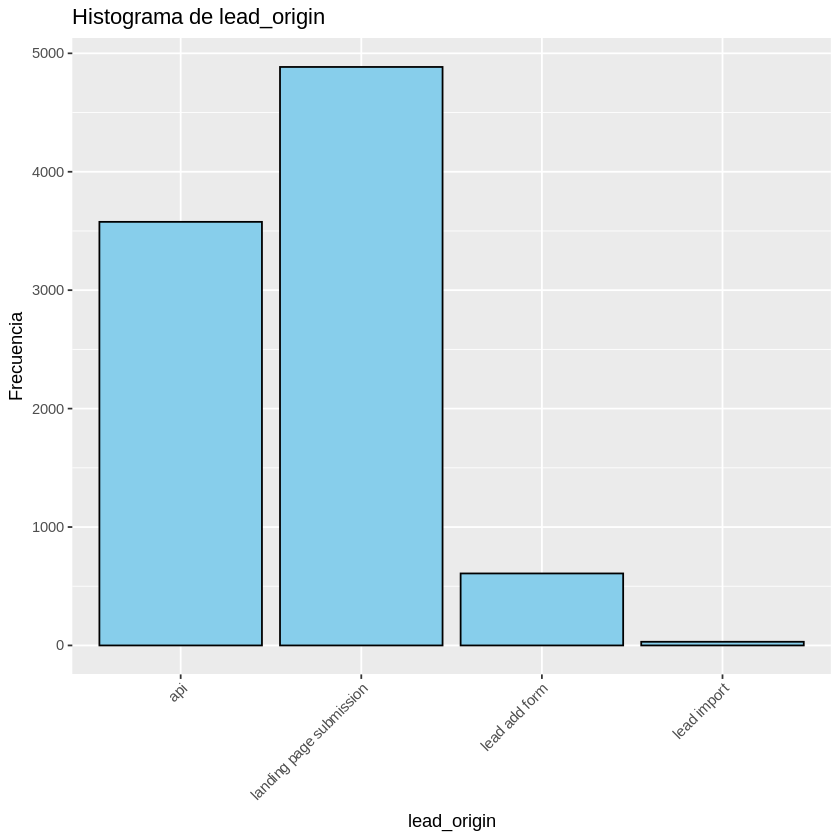

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


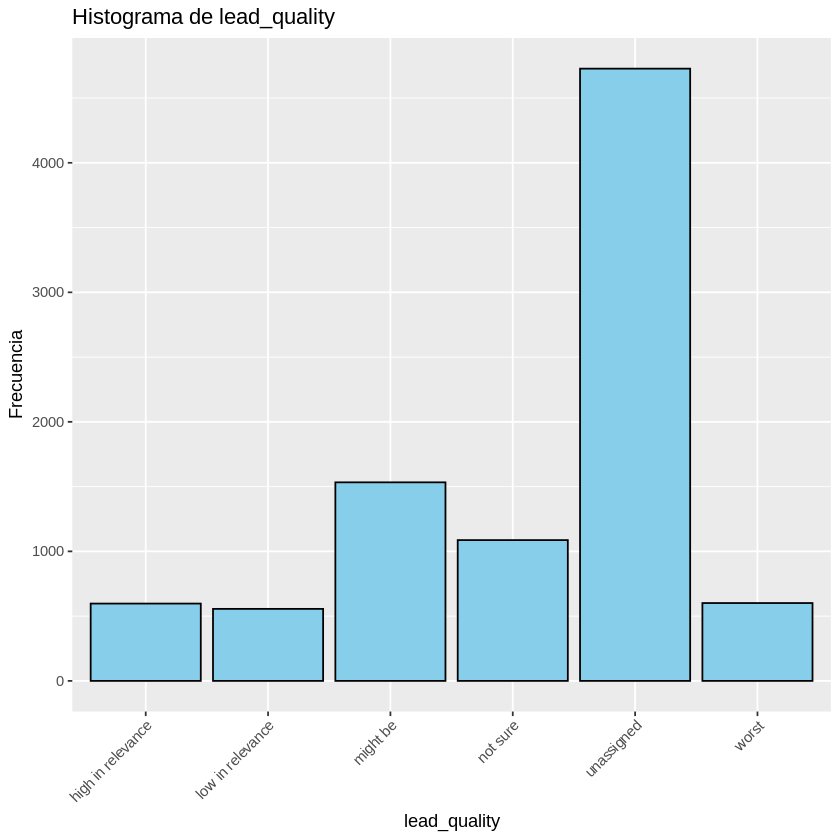

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


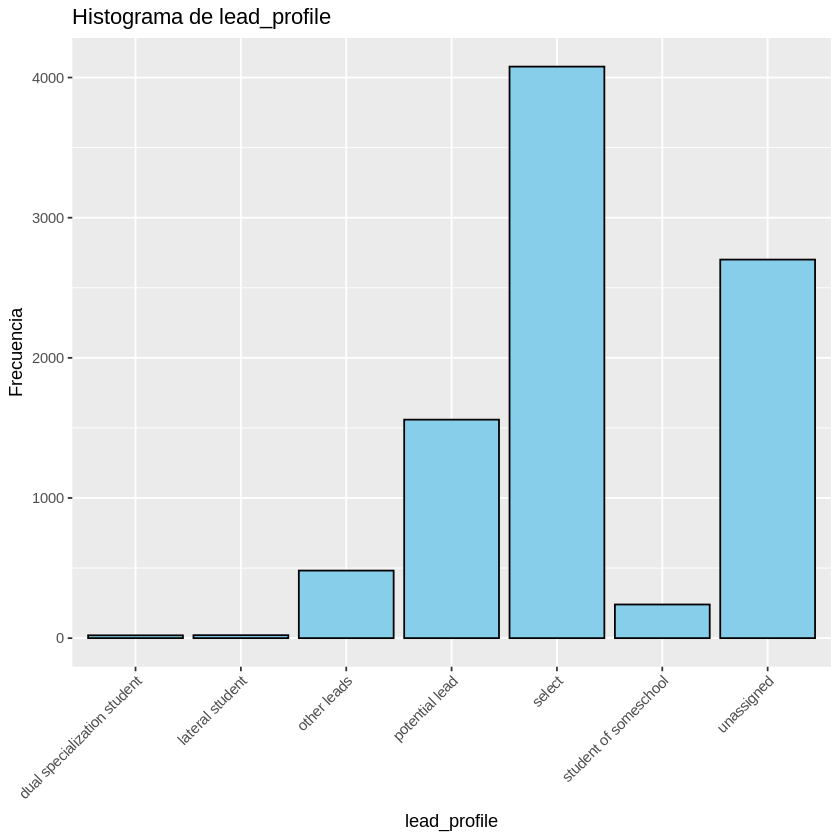

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


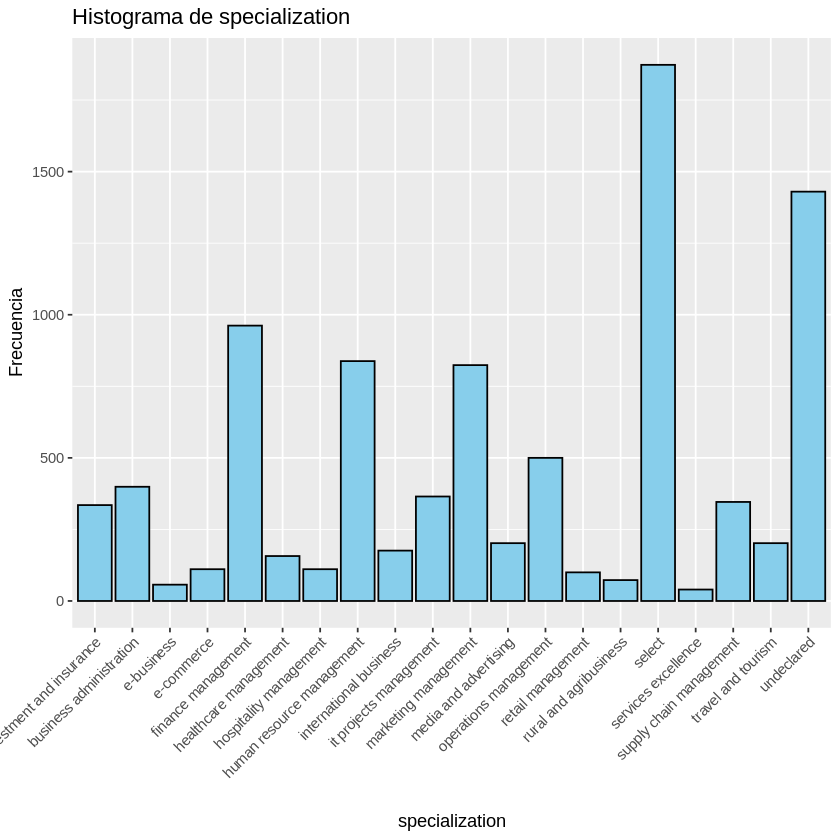

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


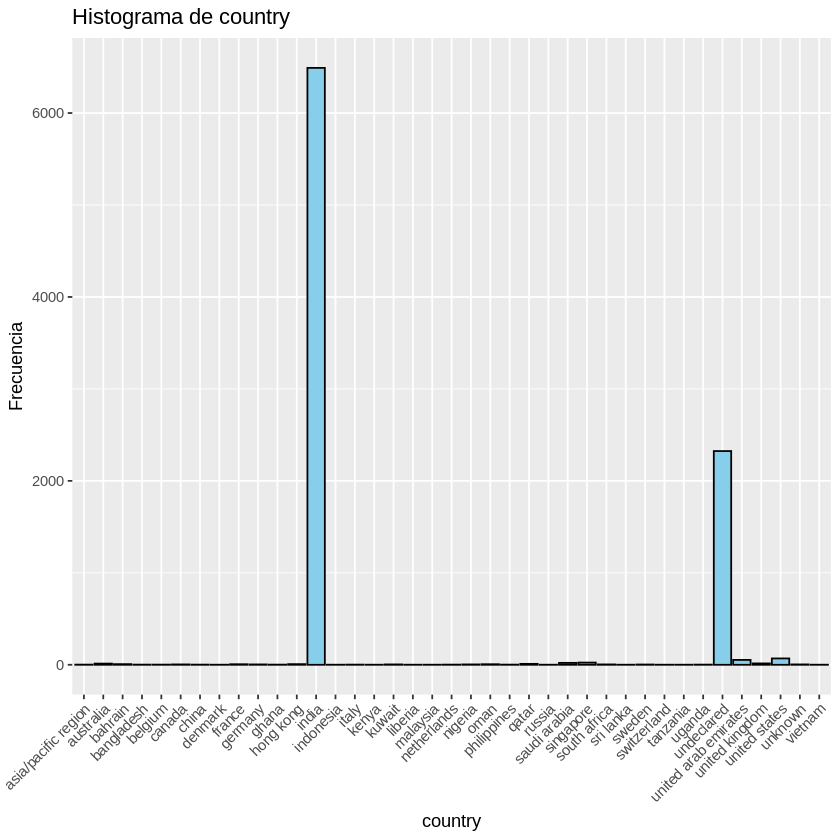

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


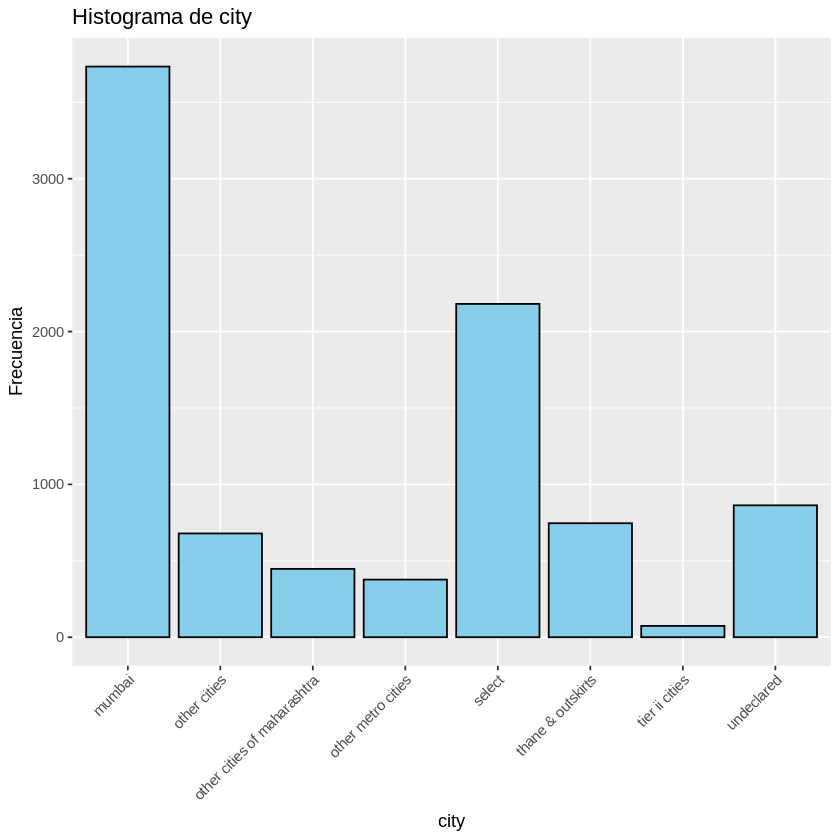

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


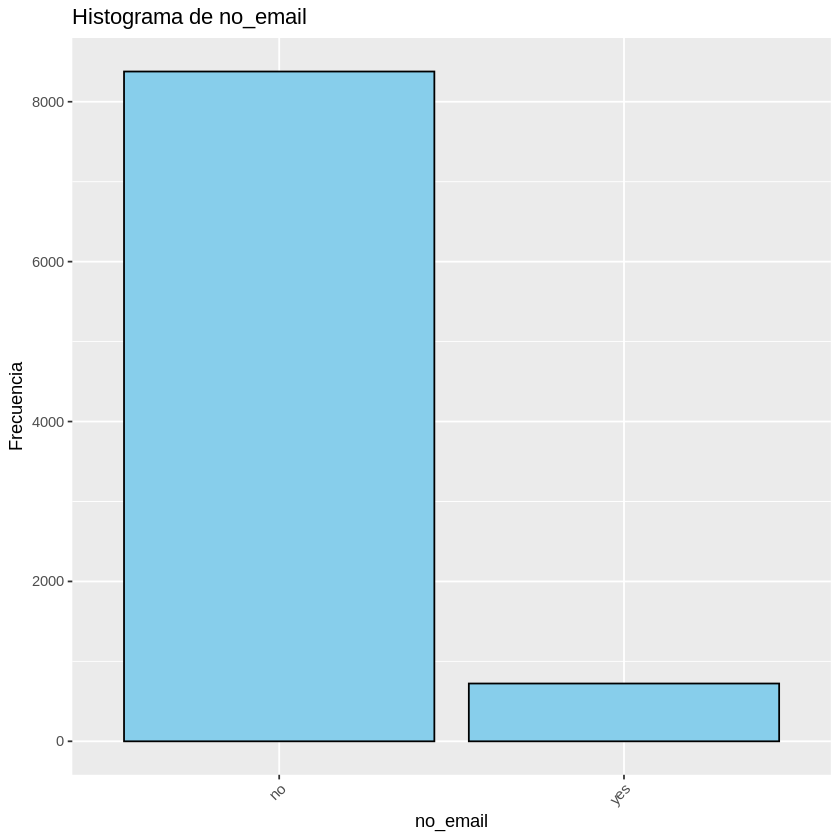

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


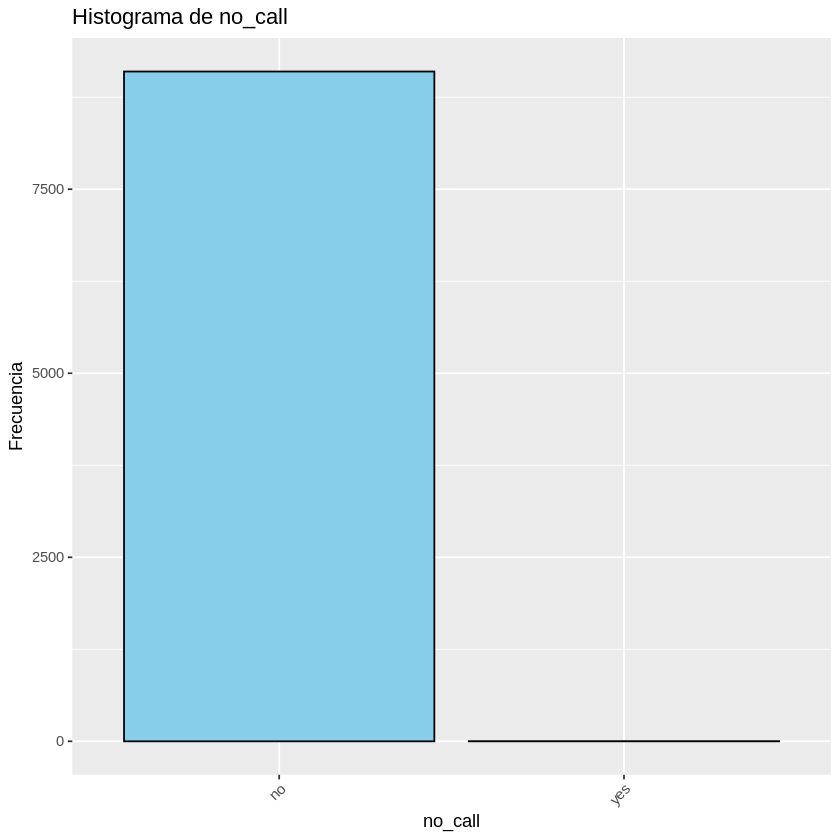

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


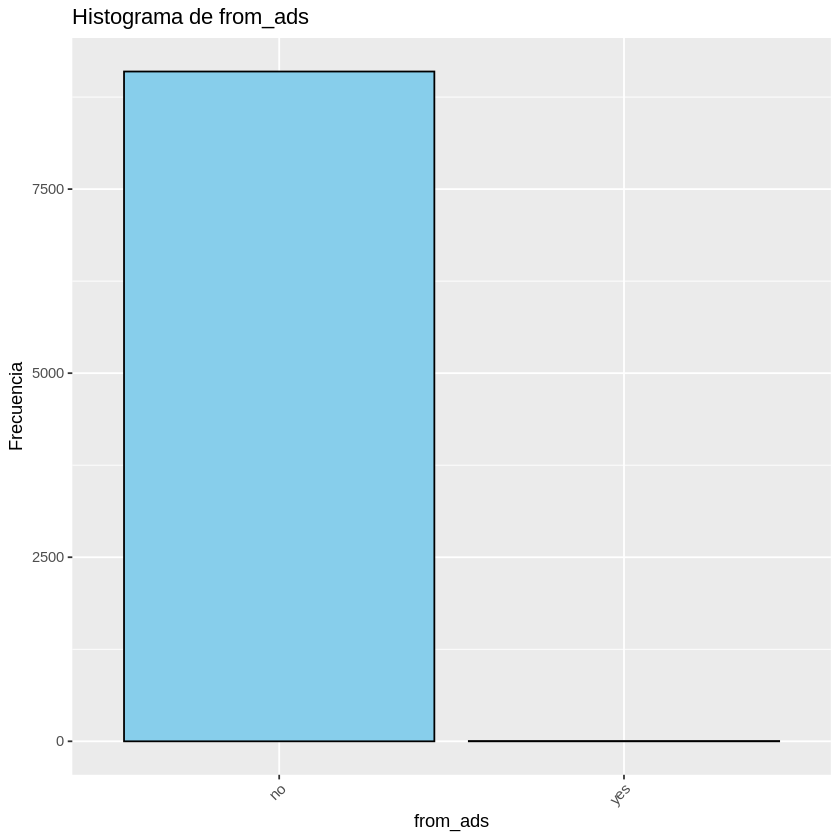

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


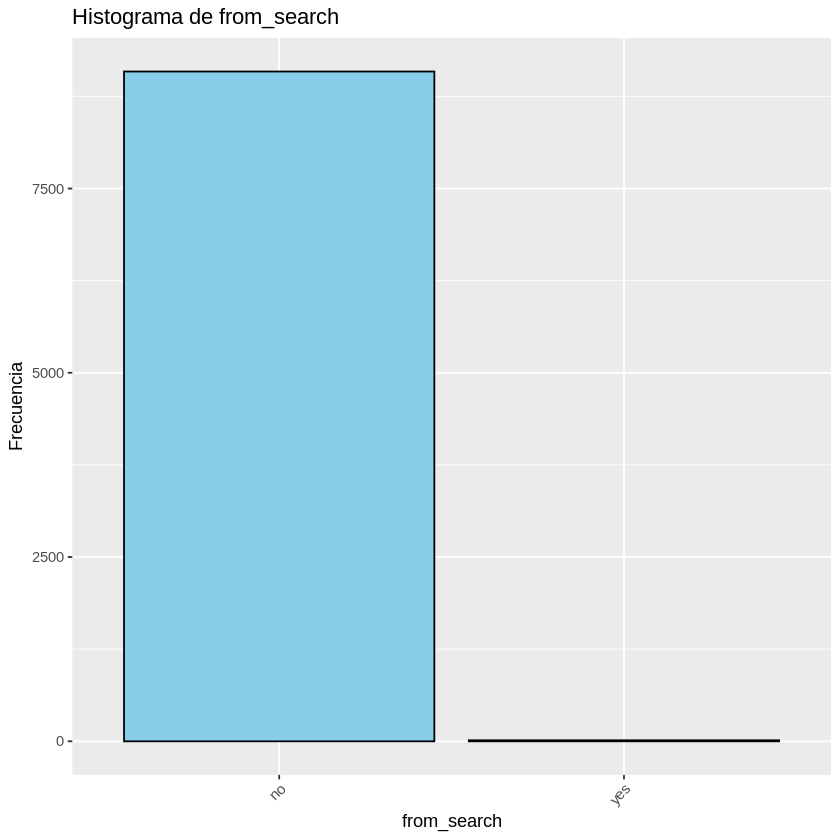

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


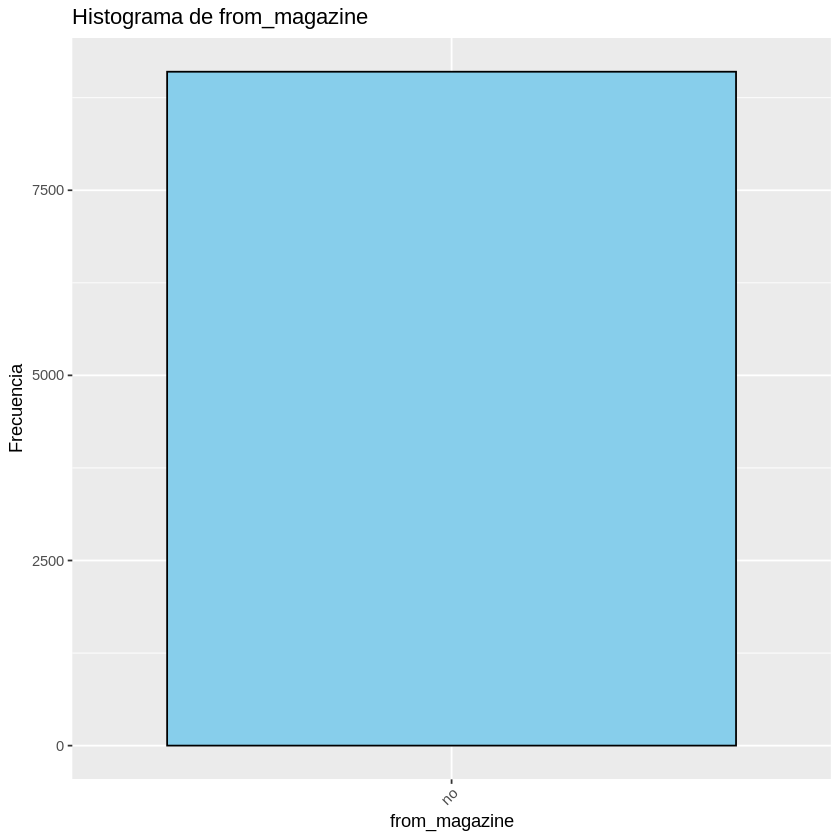

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


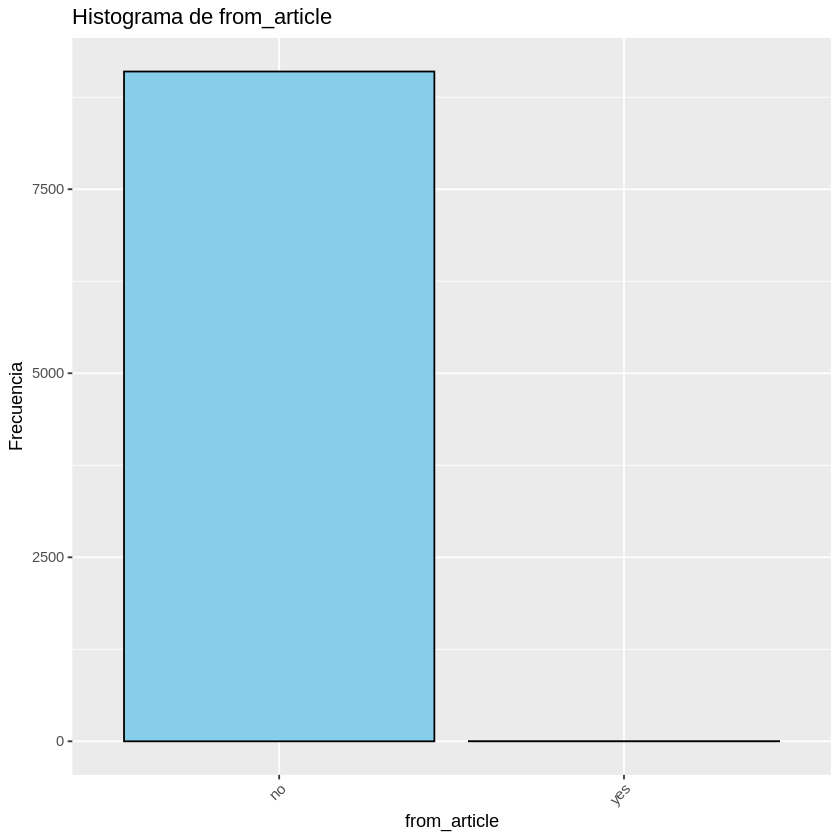

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


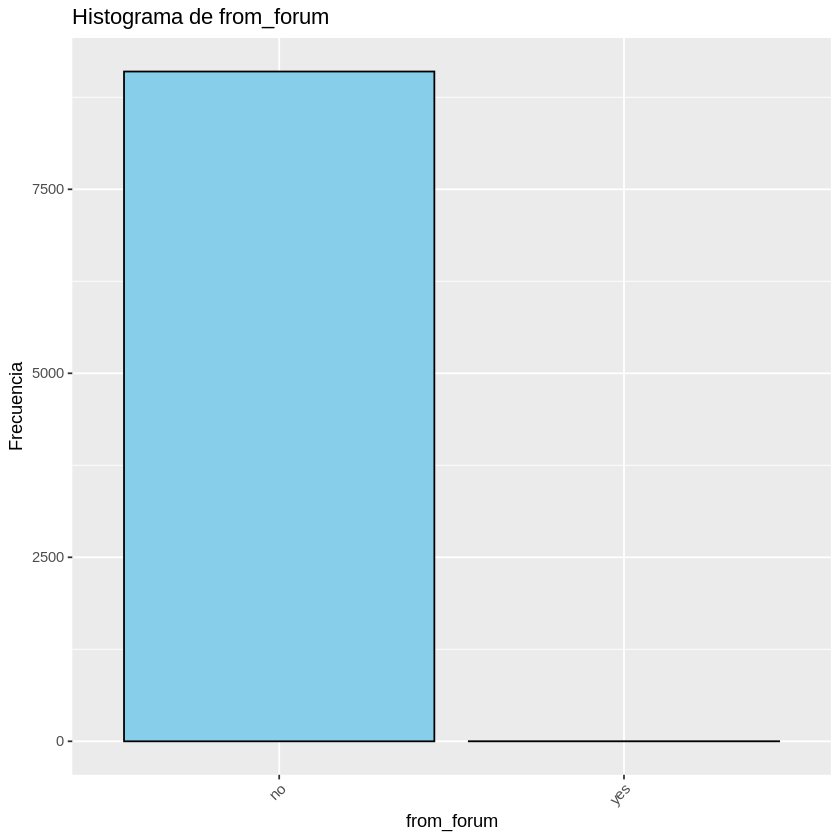

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


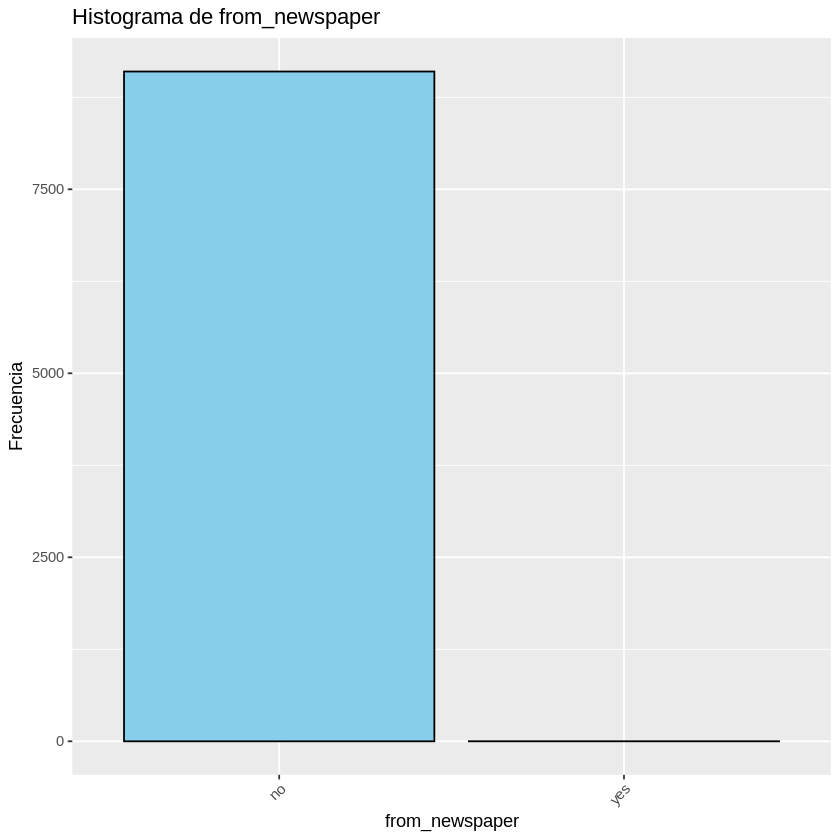

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


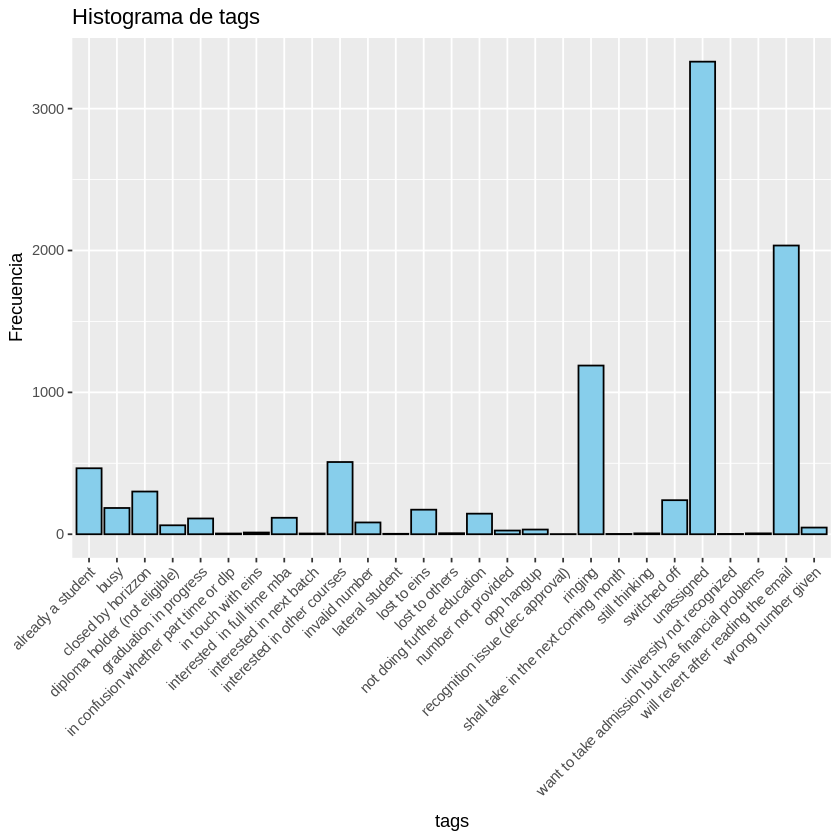

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


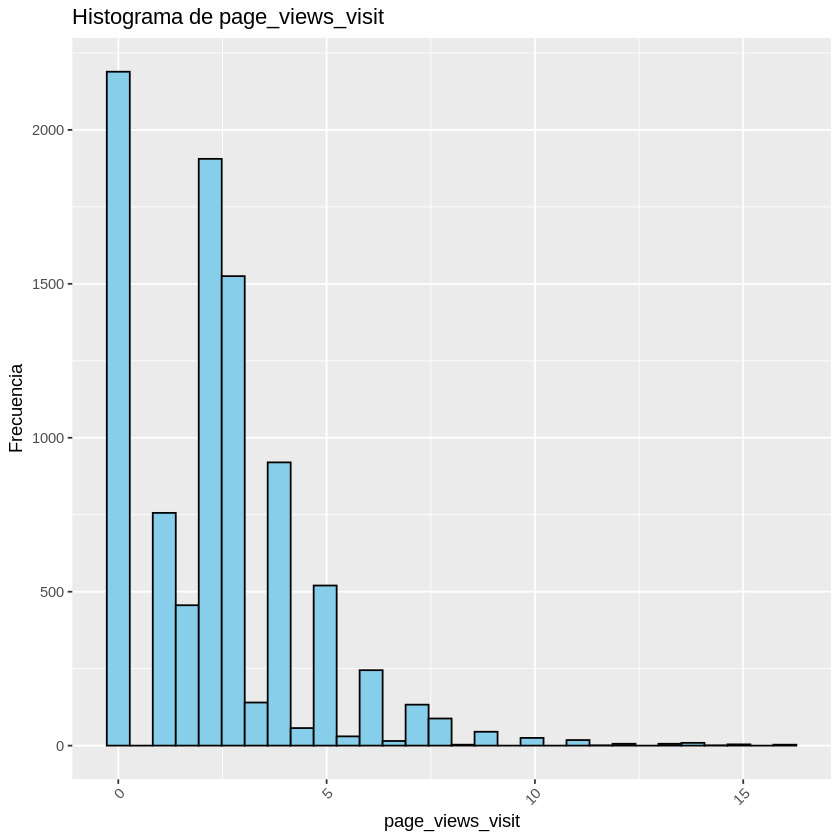

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


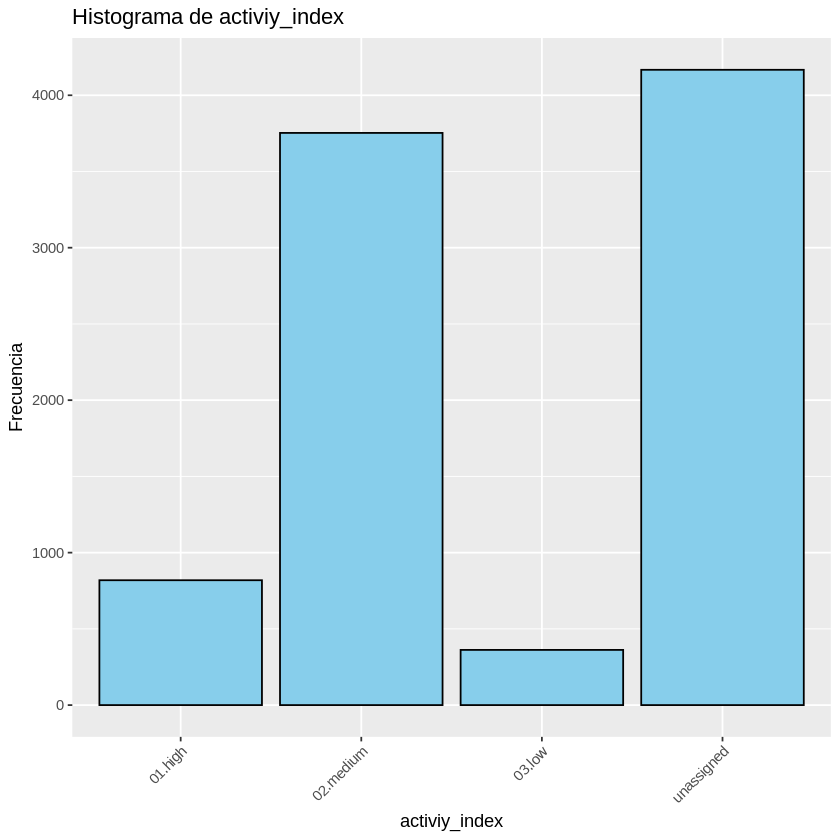

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


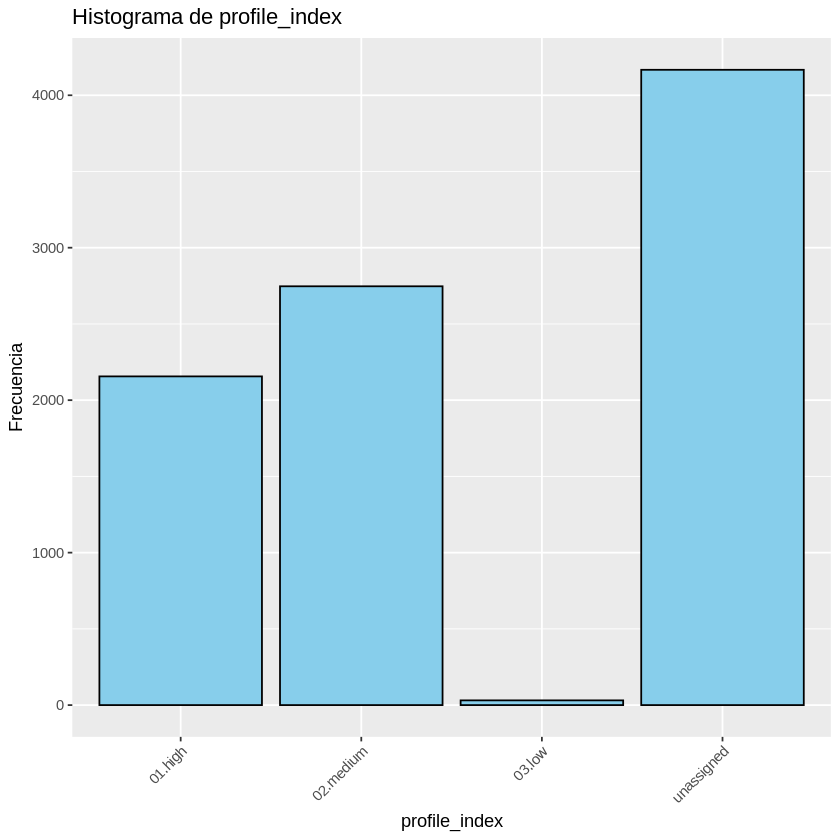

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


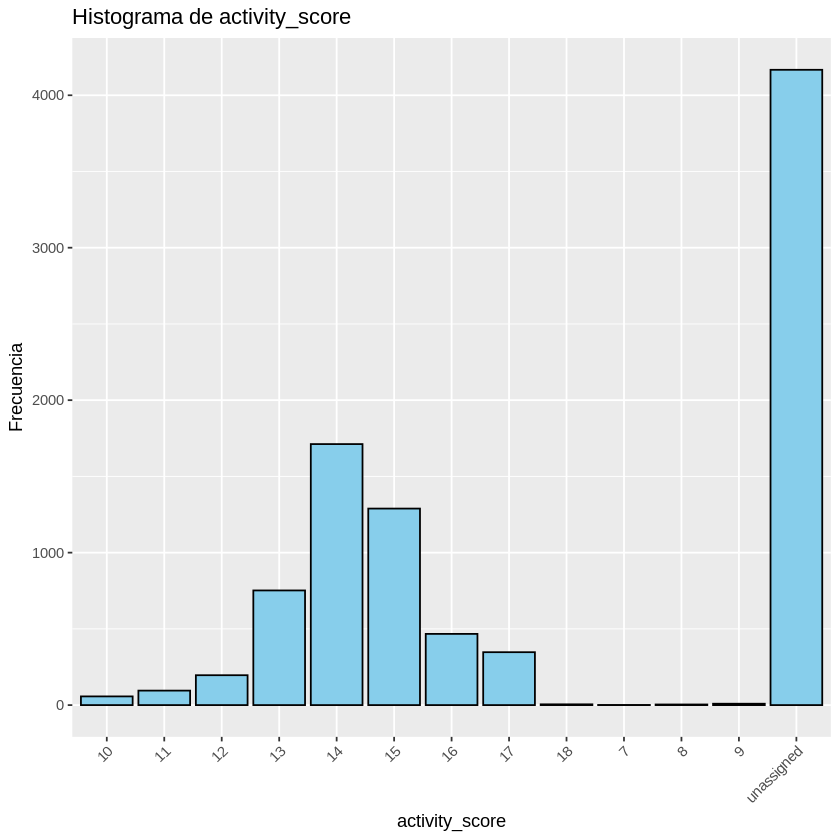

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


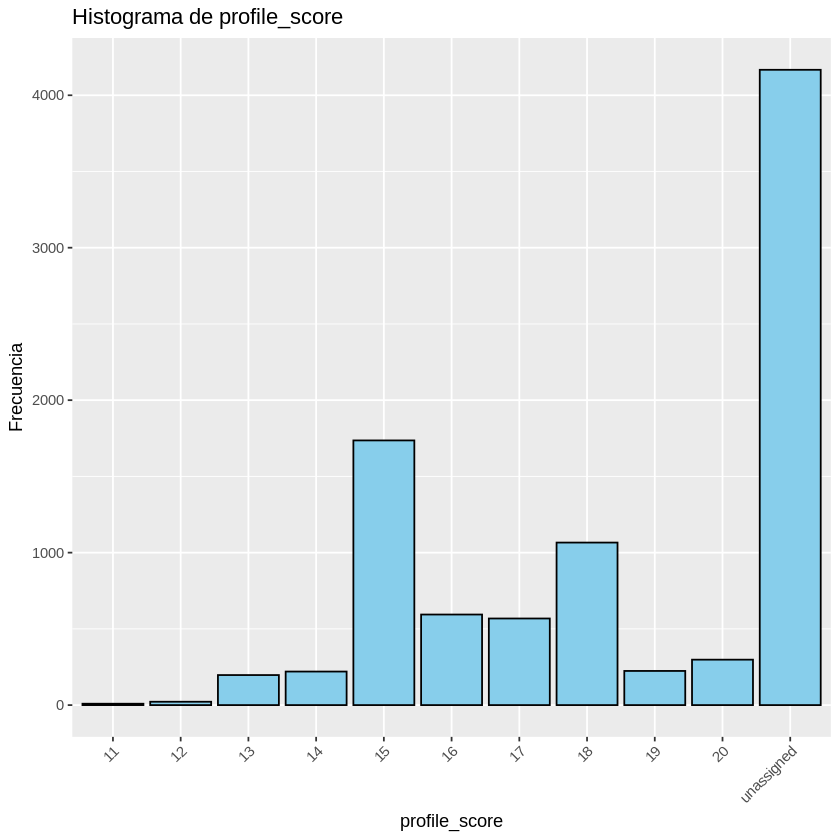

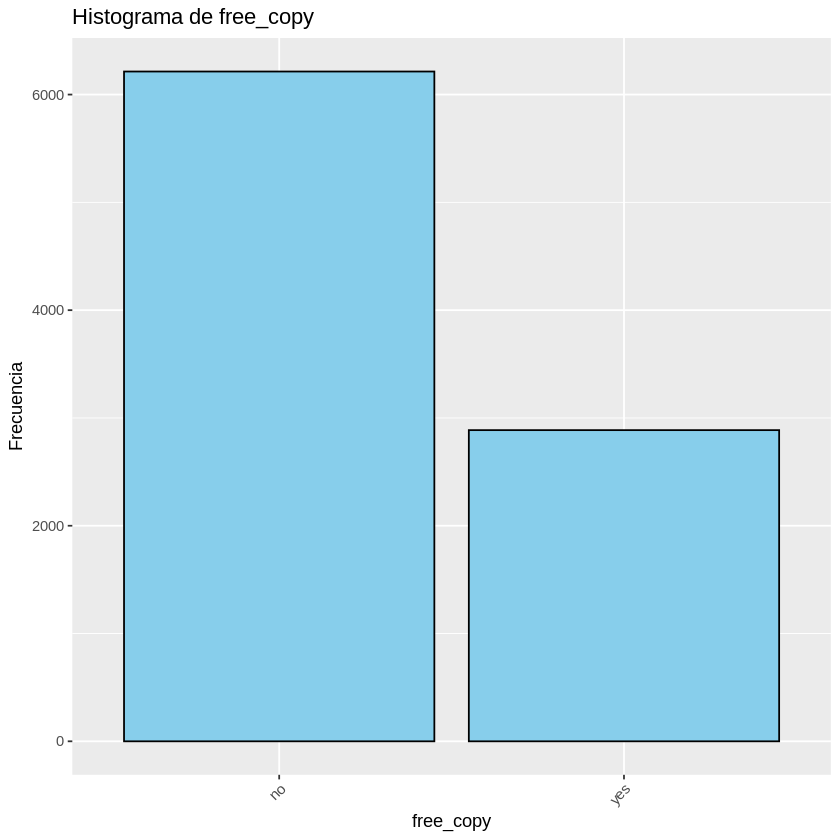

In [249]:
# prompt: quiero hacer histogramas de todas las variables en df_subset, quiero todos los eje x rotados 45 grados para hevitar solapamiento

# Loop through each column in df_subset
for (col in names(df_subset)) {
  # Check if the column is a factor or character (categorical)
  if (is.factor(df_subset[[col]]) || is.character(df_subset[[col]])) {
    # Create a histogram for categorical variables
    print(ggplot(df_subset, aes_string(x = col)) +
            geom_histogram(stat = "count", fill = "skyblue", color = "black") +
            labs(title = paste("Histograma de", col), x = col, y = "Frecuencia") +
            theme(axis.text.x = element_text(angle = 45, hjust = 1)))
  } else if (is.numeric(df_subset[[col]])) {
    # Create a histogram for numeric variables
    print(ggplot(df_subset, aes_string(x = col)) +
            geom_histogram(fill = "skyblue", color = "black") +
            labs(title = paste("Histograma de", col), x = col, y = "Frecuencia") +
            theme(axis.text.x = element_text(angle = 45, hjust = 1)))
  }
}

## Buscamos entender un poco mejor nuestra data

#### Analizando tiempo de visita

Analicemos el histograma de tiempo en el sitio wev. Obsevamos que debido a la escala numérica que presenta probablemente se está midiendo en segundos, además existe una fuerte concentración en valore menores 500 y a simple vista muy cercanos a cero

Warning message:
“Removed 3075 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


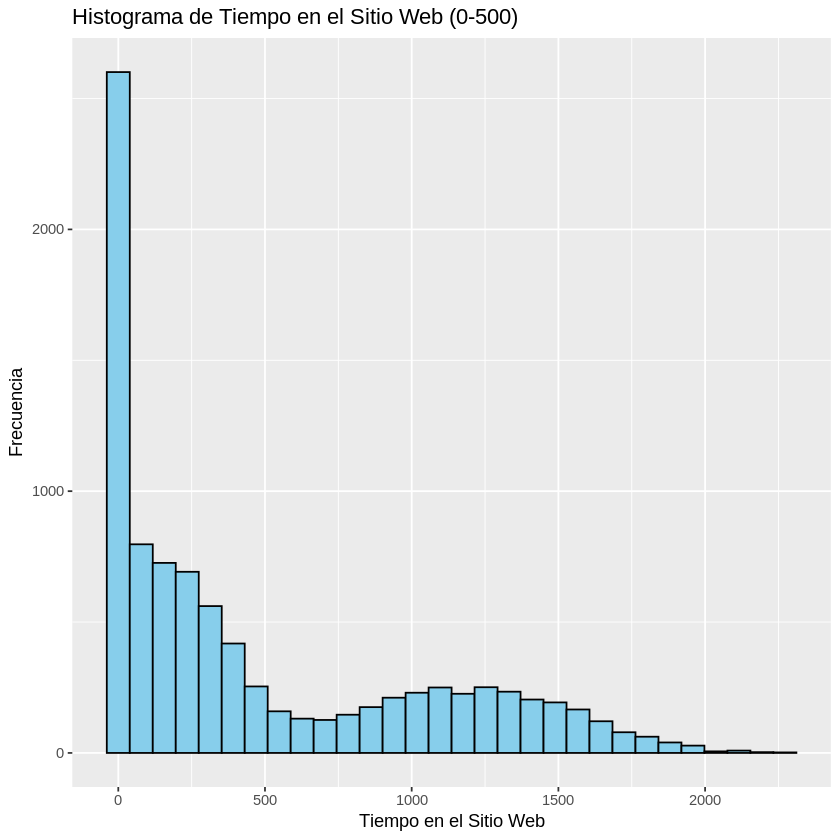

Warning message:
“Removed 6294 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


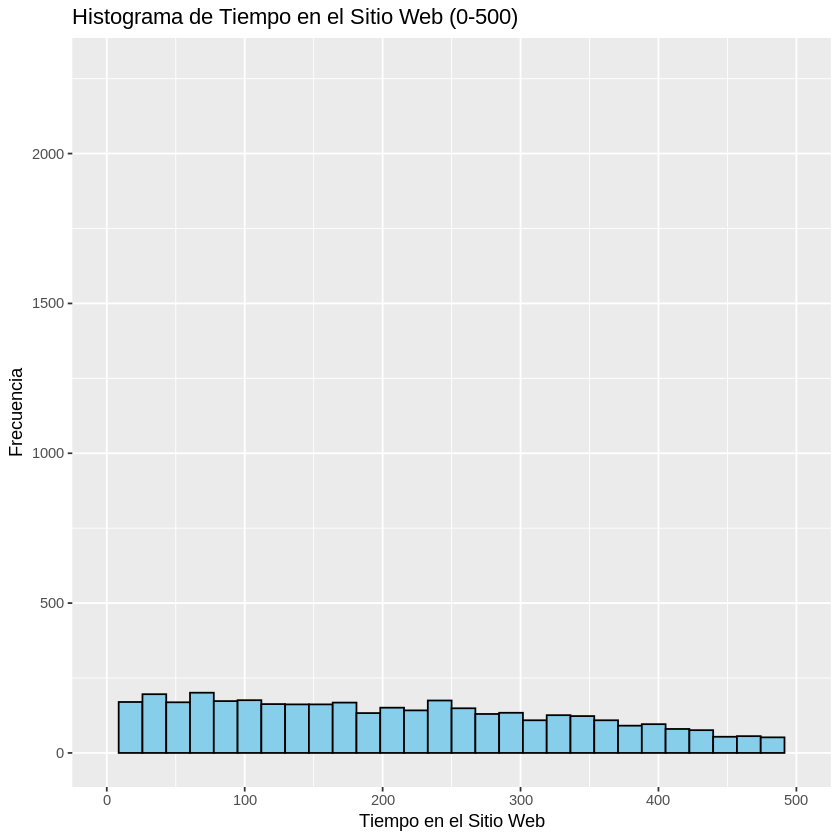

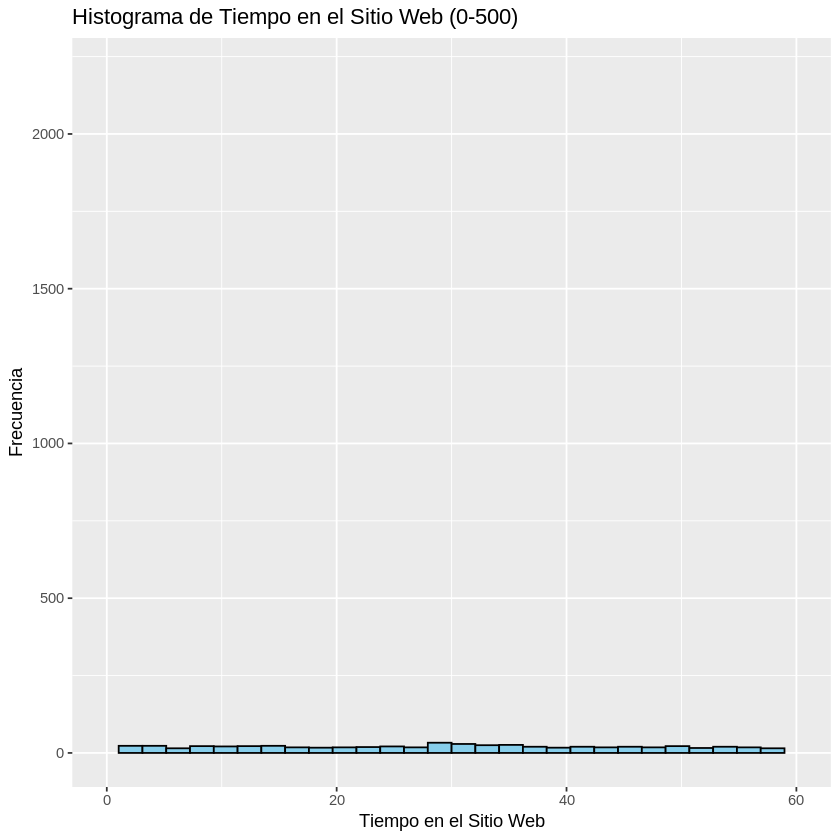

In [250]:
ggplot(df_subset, aes(x = time_on_site)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Histograma de Tiempo en el Sitio Web (0-500)",
       x = "Tiempo en el Sitio Web",
       y = "Frecuencia") #+
  #xlim(0, 500) # Limit the x-axis to the specified range

ggplot(df_subset, aes(x = time_on_site)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Histograma de Tiempo en el Sitio Web (0-500)",
       x = "Tiempo en el Sitio Web",
       y = "Frecuencia") +
  xlim(0, 500) # Limit the x-axis to the specified range

ggplot(df_subset, aes(x = time_on_site)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Histograma de Tiempo en el Sitio Web (0-500)",
       x = "Tiempo en el Sitio Web",
       y = "Frecuencia") +
  xlim(0, 60) # Limit the x-axis to the specified range

Finalmente observamos que los valores no están tan cercanos al cero como uno esperaría, de hecho la mayoria supera al menos el minuto de estancia en el citio web, por lo que existen muchos visitantes de "paso".

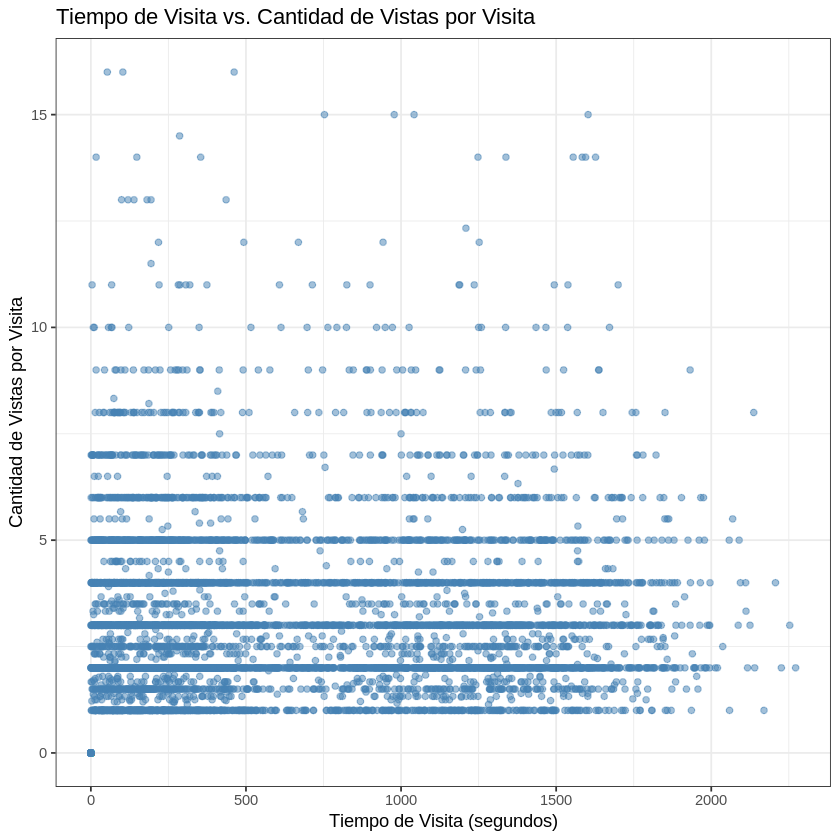

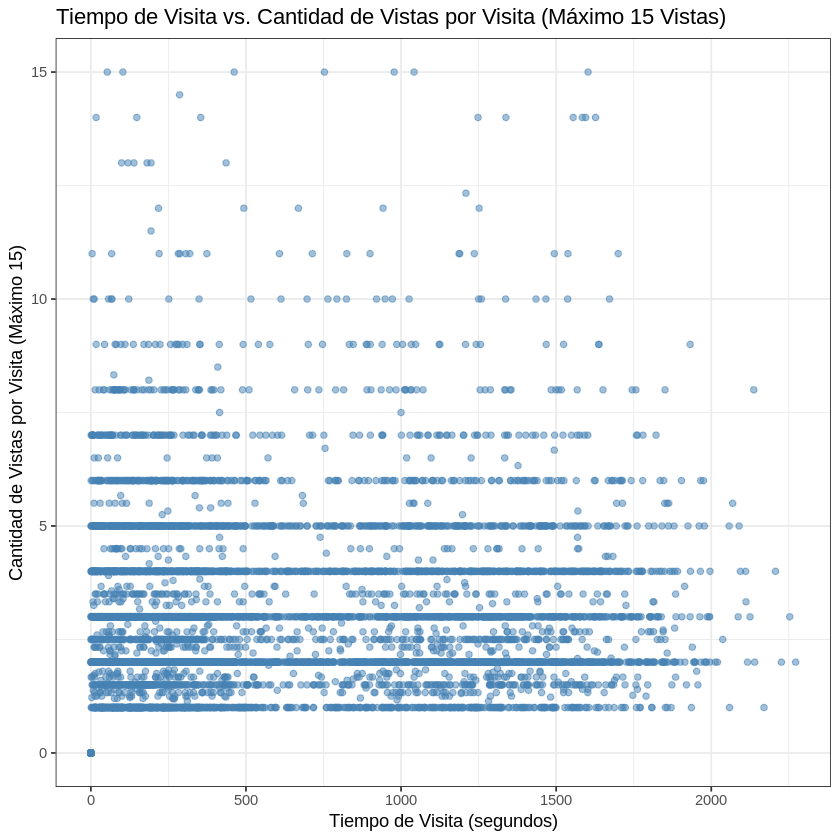

In [251]:
# prompt: grafico que compare tiempo de visita y cantidad de vistas pro viista

library(ggplot2)

# Assuming your data is in a data frame called 'df_subset'
# Create the scatterplot
ggplot(df_subset, aes(x = time_on_site, y = page_views_visit)) +
  geom_point(alpha = 0.5, color = "steelblue") +  # Adjust alpha for better visibility if needed
  labs(title = "Tiempo de Visita vs. Cantidad de Vistas por Visita",
       x = "Tiempo de Visita (segundos)",
       y = "Cantidad de Vistas por Visita") +
  theme_bw() # Optional: Use a black and white theme


# Limit page views per visit to a maximum of 15
df_subset_limited <- df_subset %>%
  dplyr::mutate(page_views_visit = dplyr::if_else(page_views_visit > 15, 15, page_views_visit))

# Create the scatterplot with the limit
ggplot(df_subset_limited, aes(x = time_on_site, y = page_views_visit)) +
  geom_point(alpha = 0.5, color = "steelblue") +
  labs(title = "Tiempo de Visita vs. Cantidad de Vistas por Visita (Máximo 15 Vistas)",
       x = "Tiempo de Visita (segundos)",
       y = "Cantidad de Vistas por Visita (Máximo 15)") +
  theme_bw()

#### Analizamos Total de visitas

Warning message:
“Removed 5 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


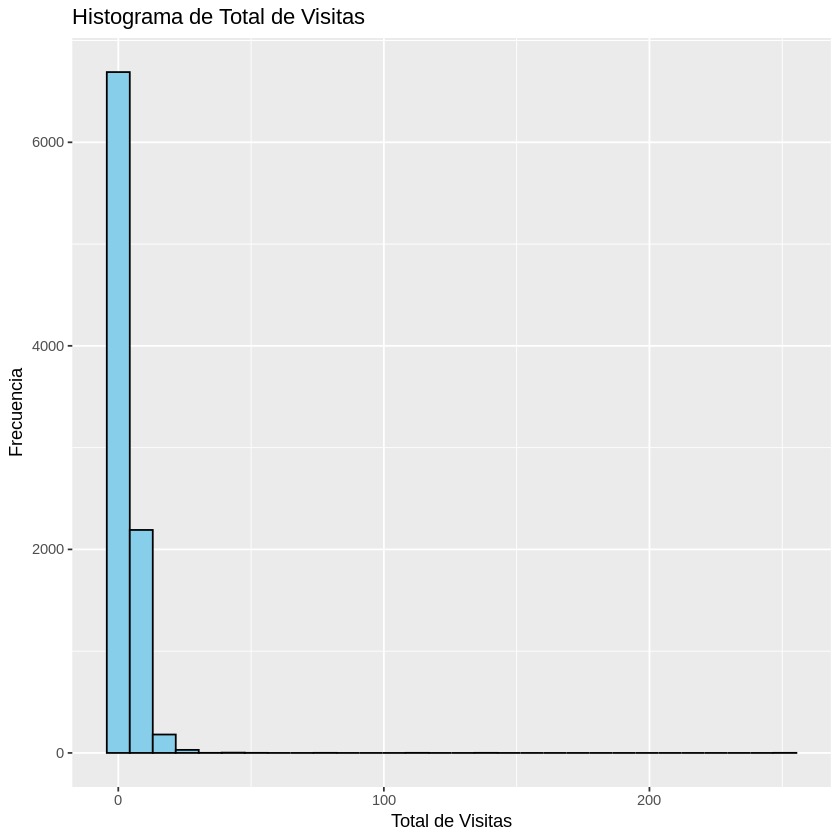

Warning message:
“Removed 45 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


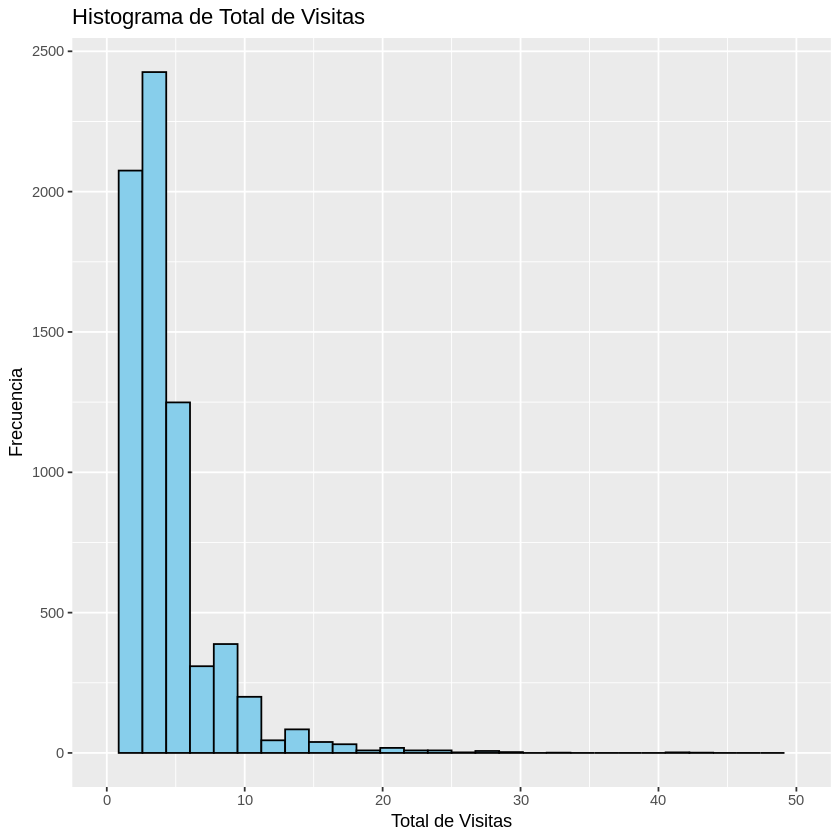

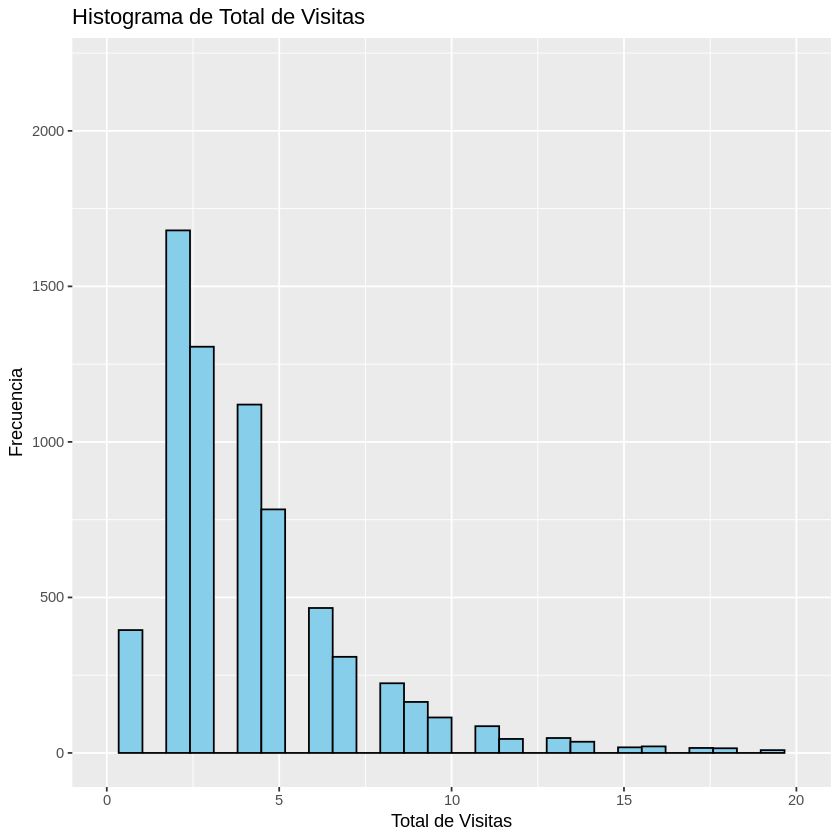

In [252]:
# prompt: histograma de total de visitas

ggplot(df_subset, aes(x = total_visits)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Histograma de Total de Visitas",
       x = "Total de Visitas",
       y = "Frecuencia")

ggplot(df_subset, aes(x = total_visits)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Histograma de Total de Visitas",
       x = "Total de Visitas",
       y = "Frecuencia") +
      xlim(0,50)

ggplot(df_subset, aes(x = total_visits)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Histograma de Total de Visitas",
       x = "Total de Visitas",
       y = "Frecuencia") +
      xlim(0,20)


Observamos que gran parte de las personas que visitan la página, se concentran en el extremo inferior con menos de 5 visitas

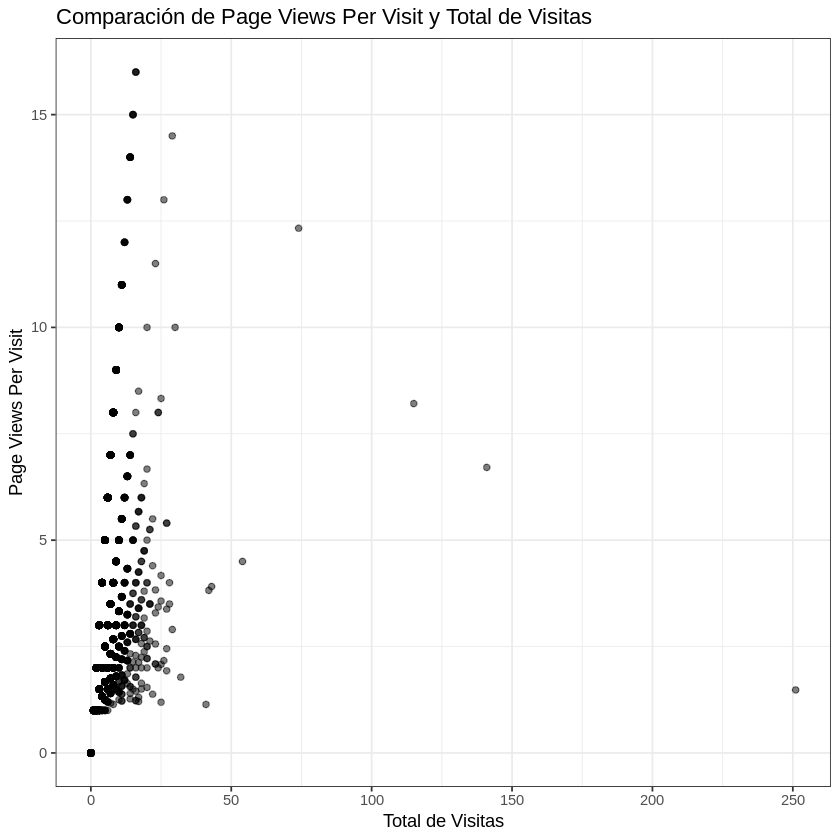

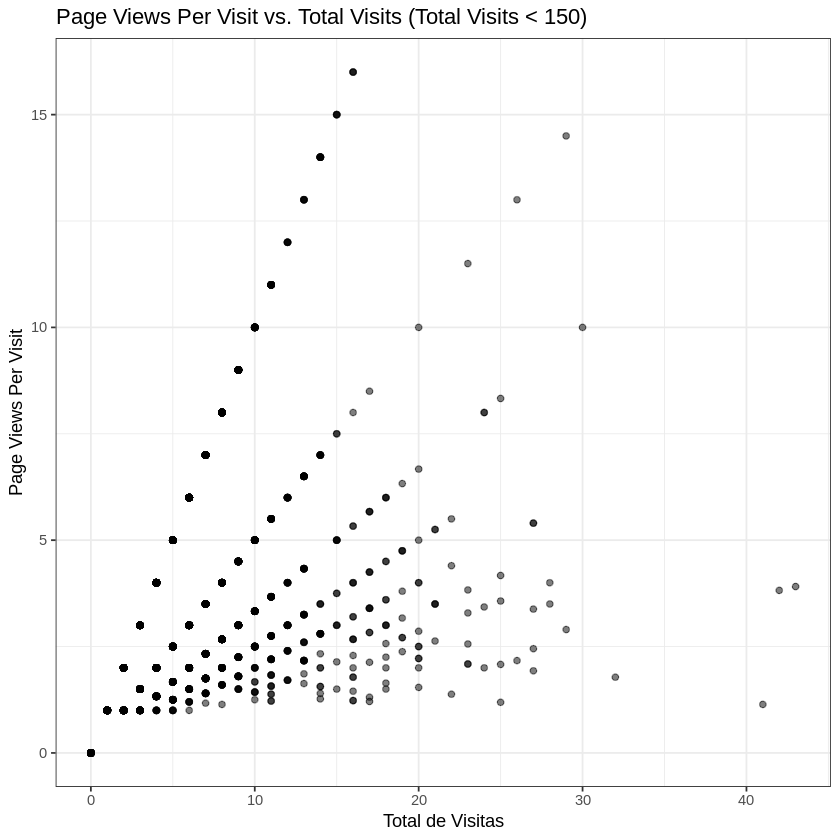

In [253]:
# prompt: grafico que compare Page_Views_Visit y total de visitas


# Create the scatter plot
ggplot(df_subset, aes(x = total_visits, y = page_views_visit)) +
  geom_point(alpha = 0.5) +  # Add transparency for better visualization of overlapping points
  labs(title = "Comparación de Page Views Per Visit y Total de Visitas",
       x = "Total de Visitas",
       y = "Page Views Per Visit") +
  theme_bw() # Use a black and white theme for a cleaner look



# Filter data for total visits less than 150
subset_data <- subset(df_subset, total_visits < 50)

# Create the scatter plot
ggplot(subset_data, aes(x = total_visits, y = page_views_visit)) +
  geom_point(alpha = 0.5) +  # Add transparency for better visualization
  labs(title = "Page Views Per Visit vs. Total Visits (Total Visits < 150)",
       x = "Total de Visitas",
       y = "Page Views Per Visit") +
  theme_bw()

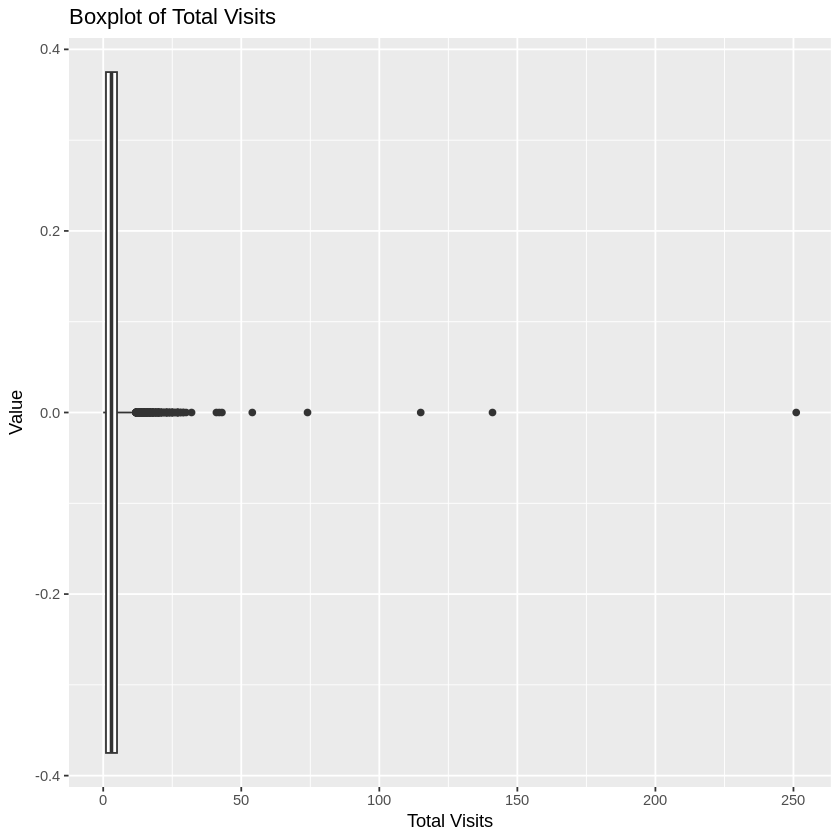

In [254]:
# prompt: boxplot de total de visitas

# Assuming df_subset is already created and processed as in the provided code

library(ggplot2)

ggplot(df_subset, aes(x = total_visits)) +
  geom_boxplot() +
  labs(title = "Boxplot of Total Visits", x = "Total Visits", y = "Value")

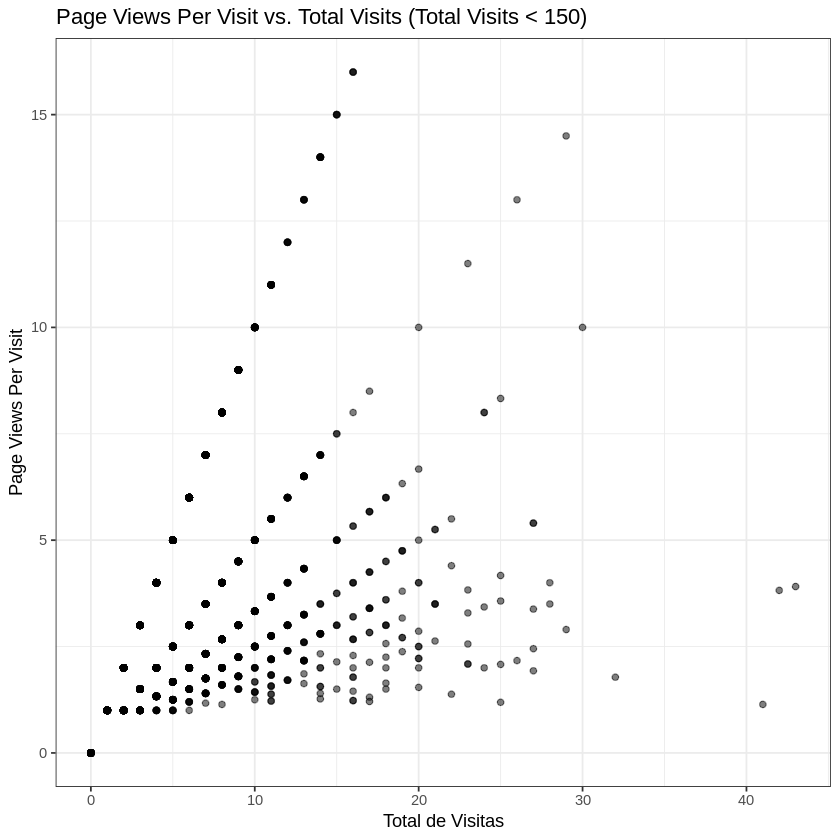

In [255]:
# prompt: grafico que compare Page_Views_Visit y total de visitas, limitando al total de visitas menores a 150

library(ggplot2)

# Filter data for total visits less than 150
subset_data <- subset(df_subset, total_visits < 50)

# Create the scatter plot
ggplot(subset_data, aes(x = total_visits, y = page_views_visit)) +
  geom_point(alpha = 0.5) +  # Add transparency for better visualization
  labs(title = "Page Views Per Visit vs. Total Visits (Total Visits < 150)",
       x = "Total de Visitas",
       y = "Page Views Per Visit") +
  theme_bw()

#### Ahora observaremos un grupo de variables binarias demasiado cargadas a un lado

In [256]:
# prompt: tengo las variables no_email, no_call, from_search, from_article, from_forum y from_newspaper y quiero hacer una tabla que compare la cantidad de valores Yes No en cada una de ellas y a cuanto porcentaje corresponden de los datos

# Create a function to calculate Yes/No proportions
calculate_proportions <- function(df, column_name) {
  # Calculate counts for "Yes" and "No"
  yes_count <- sum(df[[column_name]] == "yes", na.rm = TRUE)
  no_count <- sum(df[[column_name]] == "yo", na.rm = TRUE)

  # Calculate total observations
  total_count <- yes_count + no_count

  # Calculate percentages
  yes_percentage <- round((yes_count / total_count) * 100, 2)
  no_percentage <- round((no_count / total_count) * 100, 2)

  # Return the results as a data frame
  return(data.frame(
    Category = c("yes", "yo"),
    Count = c(yes_count, no_count),
    Percentage = c(yes_percentage, no_percentage)
  ))
}

# Specify the columns to analyze
columns_to_analyze <- c("no_email", "no_call", "from_search", "from_article", "from_forum", "from_newspaper","from_ads")

# Initialize an empty list to store results
results_list <- list()

# Loop through columns and calculate proportions
for (col in columns_to_analyze) {
  results_list[[col]] <- calculate_proportions(df_subset, col)
}

# Combine results into a single data frame
final_results <- do.call(rbind, results_list)

# Add a column to indicate the original variable
final_results$Variable <- rep(names(results_list), each = 2)

# Rearrange columns
final_results <- final_results[, c("Variable", "Category", "Count", "Percentage")]


# Print the final table
final_results

,Variable,Category,Count,Percentage
,<chr>,<chr>,<int>,<dbl>
no_email.1,no_email,yes,723,100
no_email.2,no_email,yo,0,0
no_call.1,no_call,yes,2,100
no_call.2,no_call,yo,0,0
from_search.1,from_search,yes,14,100
from_search.2,from_search,yo,0,0
from_article.1,from_article,yes,2,100
from_article.2,from_article,yo,0,0
from_forum.1,from_forum,yes,1,100


In [257]:
# prompt: para from_newspaper quiero observa el registro que tiene el valor de Yes

# Assuming 'df_subset' is your data frame

# Filter rows where 'from_newspaper' is "Yes"
newspaper_yes <- df_subset[df_subset$from_newspaper == "yes", ]

# Print or further analyze the subset
newspaper_yes

time_on_site,total_visits,lead_source,lead_origin,lead_quality,lead_profile,specialization,country,city,no_email,⋯,from_article,from_forum,from_newspaper,tags,page_views_visit,activiy_index,profile_index,activity_score,profile_score,free_copy
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1812,10,direct traffic,landing page submission,not sure,select,finance management,india,select,no,⋯,no,no,yes,ringing,3.33,unassigned,unassigned,unassigned,unassigned,no


In [258]:
# prompt: para from_forum quiero observa el registro que tiene el valor de Yes

# Assuming 'df_subset' is your data frame

# Filter rows where 'from_forum' is "Yes"
forum_yes <- df_subset[df_subset$from_forum == "yes", ]

# Print or further analyze the subset
forum_yes

time_on_site,total_visits,lead_source,lead_origin,lead_quality,lead_profile,specialization,country,city,no_email,⋯,from_article,from_forum,from_newspaper,tags,page_views_visit,activiy_index,profile_index,activity_score,profile_score,free_copy
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
814,20,direct traffic,landing page submission,unassigned,unassigned,healthcare management,india,other metro cities,no,⋯,yes,yes,no,unassigned,2.5,unassigned,unassigned,unassigned,unassigned,yes


In [259]:
# prompt: para from_article quiero observa el registro que tiene el valor de Yes

# Filter rows where 'from_article' is "Yes"
article_yes <- df_subset[df_subset$from_article == "yes", ]

# Print or further analyze the subset
article_yes

time_on_site,total_visits,lead_source,lead_origin,lead_quality,lead_profile,specialization,country,city,no_email,⋯,from_article,from_forum,from_newspaper,tags,page_views_visit,activiy_index,profile_index,activity_score,profile_score,free_copy
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
814,20,direct traffic,landing page submission,unassigned,unassigned,healthcare management,india,other metro cities,no,⋯,yes,yes,no,unassigned,2.5,unassigned,unassigned,unassigned,unassigned,yes
1005,9,organic search,landing page submission,might be,select,select,india,select,no,⋯,yes,no,no,will revert after reading the email,9.0,02.medium,01.high,15,17,no


In [260]:
# prompt:  para from_search quiero observa el registro que tiene el valor de Yes

# Filter rows where 'from_search' is "Yes"
from_search_yes <- df_subset[df_subset$from_search == "yes", ]

# Print or further analyze the subset
from_search_yes

time_on_site,total_visits,lead_source,lead_origin,lead_quality,lead_profile,specialization,country,city,no_email,⋯,from_article,from_forum,from_newspaper,tags,page_views_visit,activiy_index,profile_index,activity_score,profile_score,free_copy
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
333,12,olark chat,api,low in relevance,potential lead,marketing management,india,mumbai,no,⋯,no,no,no,will revert after reading the email,4.00,02.medium,01.high,15,18,no
470,14,direct traffic,landing page submission,unassigned,unassigned,undeclared,india,mumbai,no,⋯,no,no,no,unassigned,2.80,02.medium,01.high,14,17,no
94,6,direct traffic,landing page submission,not sure,select,finance management,india,other metro cities,no,⋯,no,no,no,ringing,2.00,unassigned,unassigned,unassigned,unassigned,yes
1355,8,organic search,landing page submission,high in relevance,potential lead,finance management,india,mumbai,no,⋯,no,no,no,closed by horizzon,8.00,unassigned,unassigned,unassigned,unassigned,yes
11,13,direct traffic,landing page submission,not sure,potential lead,e-commerce,india,mumbai,no,⋯,no,no,no,ringing,6.50,unassigned,unassigned,unassigned,unassigned,yes
1448,10,direct traffic,landing page submission,unassigned,select,business administration,india,select,no,⋯,no,no,no,ringing,5.00,unassigned,unassigned,unassigned,unassigned,no
814,20,direct traffic,landing page submission,unassigned,unassigned,healthcare management,india,other metro cities,no,⋯,yes,yes,no,unassigned,2.50,unassigned,unassigned,unassigned,unassigned,yes
276,4,direct traffic,landing page submission,unassigned,select,it projects management,india,select,no,⋯,no,no,no,ringing,4.00,unassigned,unassigned,unassigned,unassigned,no
932,2,direct traffic,landing page submission,high in relevance,student of someschool,operations management,india,other cities,no,⋯,no,no,no,closed by horizzon,2.00,unassigned,unassigned,unassigned,unassigned,no


In [261]:
# prompt:  para no_call  quiero observa el registro que tiene el valor de Yes

# Filter rows where 'no_call' is "Yes"
no_call_yes <- df_subset[df_subset$no_call == "yes", ]

# Print or further analyze the subset
no_call_yes

time_on_site,total_visits,lead_source,lead_origin,lead_quality,lead_profile,specialization,country,city,no_email,⋯,from_article,from_forum,from_newspaper,tags,page_views_visit,activiy_index,profile_index,activity_score,profile_score,free_copy
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1482,9,google,api,not sure,select,marketing management,india,mumbai,no,⋯,no,no,no,will revert after reading the email,3,02.medium,02.medium,15,16,no
0,0,reference,lead add form,might be,potential lead,healthcare management,undeclared,mumbai,no,⋯,no,no,no,closed by horizzon,0,01.high,01.high,16,17,no


In [262]:
# prompt: para from_ads quiero observa el registro que tiene el valor de Yes

# Filter rows where 'from_ads' is "Yes"
from_ads_yes <- df_subset[df_subset$from_ads == "yes", ]

# Print or further analyze the subset
from_ads_yes

time_on_site,total_visits,lead_source,lead_origin,lead_quality,lead_profile,specialization,country,city,no_email,⋯,from_article,from_forum,from_newspaper,tags,page_views_visit,activiy_index,profile_index,activity_score,profile_score,free_copy
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
814,20,direct traffic,landing page submission,unassigned,unassigned,healthcare management,india,other metro cities,no,⋯,yes,yes,no,unassigned,2.5,unassigned,unassigned,unassigned,unassigned,yes
352,9,direct traffic,landing page submission,not sure,select,select,india,select,no,⋯,no,no,no,ringing,9.0,unassigned,unassigned,unassigned,unassigned,no
73,4,direct traffic,landing page submission,unassigned,select,supply chain management,india,select,no,⋯,no,no,no,opp hangup,4.0,02.medium,01.high,15,17,no
1513,3,direct traffic,landing page submission,might be,potential lead,operations management,india,select,no,⋯,no,no,no,will revert after reading the email,3.0,02.medium,01.high,15,18,no


In [263]:
# prompt: dado que las variables  no_call, from_search, from_article, from_forum y from_newspaper no presentan información relevante, eliminaremos las columnas de df_subset

df_subset <- df_subset %>%
  select(-no_call, -from_search, -from_article, -from_forum, -from_newspaper, -from_ads, -from_magazine)

In [264]:

head(df_subset)


time_on_site,total_visits,lead_source,lead_origin,lead_quality,lead_profile,specialization,country,city,no_email,tags,page_views_visit,activiy_index,profile_index,activity_score,profile_score,free_copy
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0,0,olark chat,api,low in relevance,select,select,undeclared,select,no,interested in other courses,0.0,02.medium,02.medium,15,15,no
674,5,organic search,api,unassigned,select,select,india,select,no,ringing,2.5,02.medium,02.medium,15,15,no
1532,2,direct traffic,landing page submission,might be,potential lead,business administration,india,mumbai,no,will revert after reading the email,2.0,02.medium,01.high,14,20,yes
305,1,direct traffic,landing page submission,not sure,select,media and advertising,india,mumbai,no,ringing,1.0,02.medium,01.high,13,17,no
1428,2,google,landing page submission,might be,select,select,india,mumbai,no,will revert after reading the email,1.0,02.medium,01.high,15,18,no
0,0,olark chat,api,unassigned,unassigned,undeclared,undeclared,undeclared,no,unassigned,0.0,01.high,02.medium,17,15,no


### Observamos el comportamiento de la variable tags

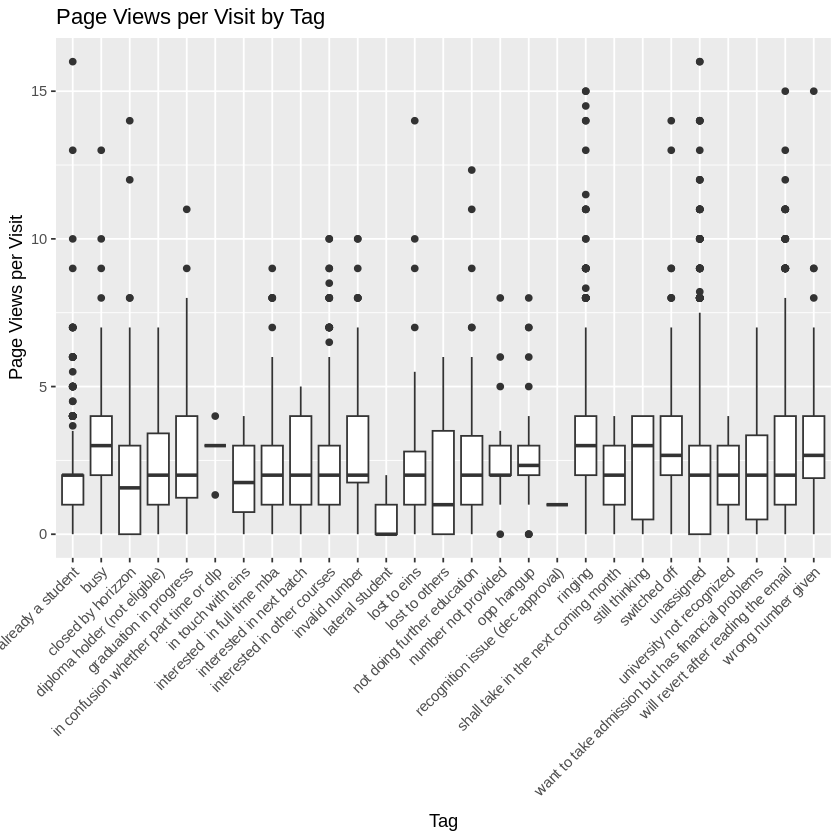

In [265]:
# prompt: grafico que muestre el comportamiento de tags con pages biew visit

library(ggplot2)

# Assuming 'df_subset' contains your data and 'tags' and 'page_views_visit' are columns

ggplot(df_subset, aes(x = tags, y = page_views_visit)) +
  geom_boxplot() +  # Use boxplot to show distribution for each tag
  labs(title = "Page Views per Visit by Tag",
       x = "Tag",
       y = "Page Views per Visit") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels if needed

Warning message:
“Removed 48 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


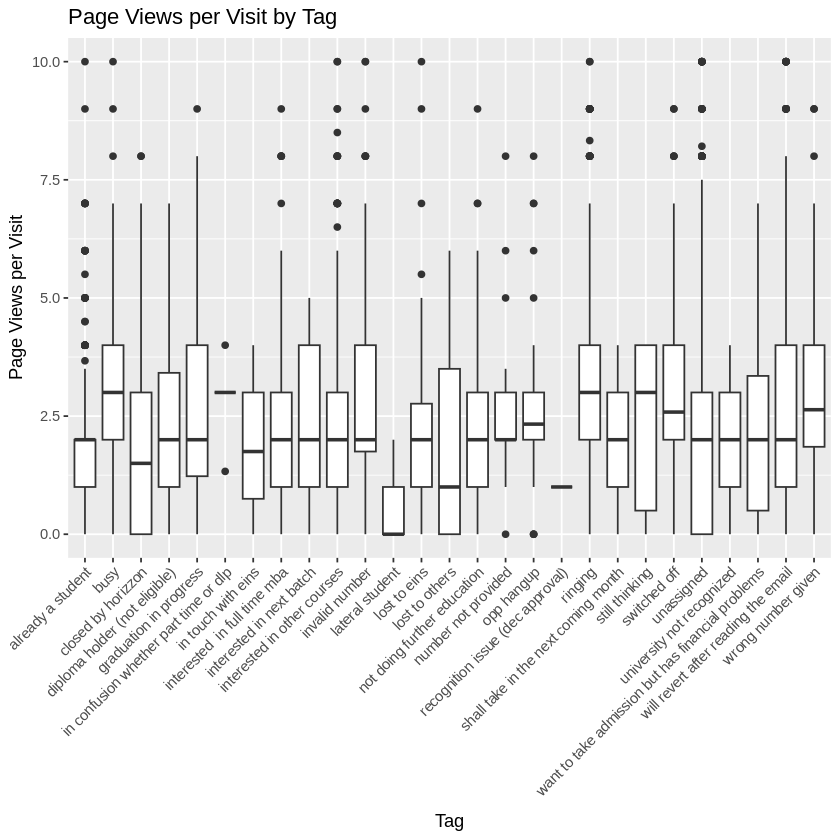

In [266]:
# prompt: grafico que muestre el comportamiento de tags con pages biew visit con limite de 8 en page view visit eje y

library(ggplot2)

# Assuming 'df_subset' contains your data and 'tags' and 'page_views_visit' are columns

ggplot(df_subset, aes(x = tags, y = page_views_visit)) +
  geom_boxplot() +  # Use boxplot to show distribution for each tag
  labs(title = "Page Views per Visit by Tag",
       x = "Tag",
       y = "Page Views per Visit") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + # Rotate x-axis labels if needed
  ylim(0,10) #Limit Y axis

### Optimización de variables

##### Optimizando country

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


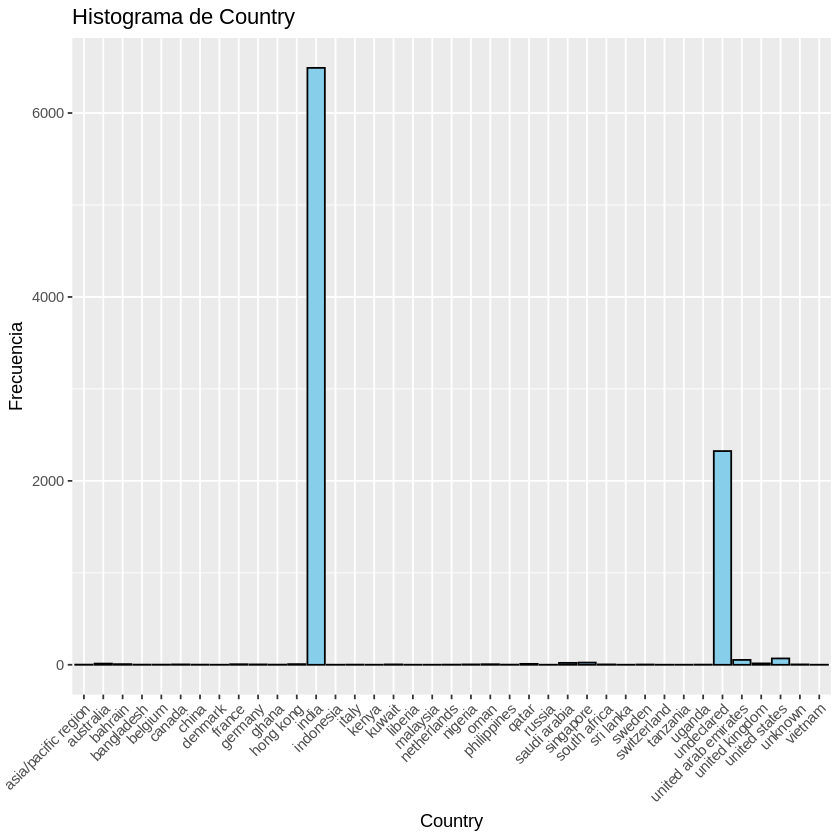

In [267]:
# prompt: histograma de country

# Assuming df_subset is your data frame and 'country' is a column

ggplot(df_subset, aes(x = country)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Country", x = "Country", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [268]:
# prompt: para country quiero solo quedar con estas categorias , United Arab Emirates, United States, United Kingdom, undeclared, Inda, Otros, por lo que quiero que las que no correspondan a alguna de la lista, pasen a Otros

# Define the allowed countries
allowed_countries <- c("united arab emirates", "united states", "undeclared", "india", "otros")

# Replace countries not in the allowed list with "Otros"
df_subset$country <- ifelse(df_subset$country %in% allowed_countries, df_subset$country, "otros")

# Verify the changes
table(df_subset$country)

# Now, you can proceed with your analysis or visualizations using the updated 'country' column


               india                otros           undeclared 
                6491                  164                 2324 
united arab emirates        united states 
                  53                   69 

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


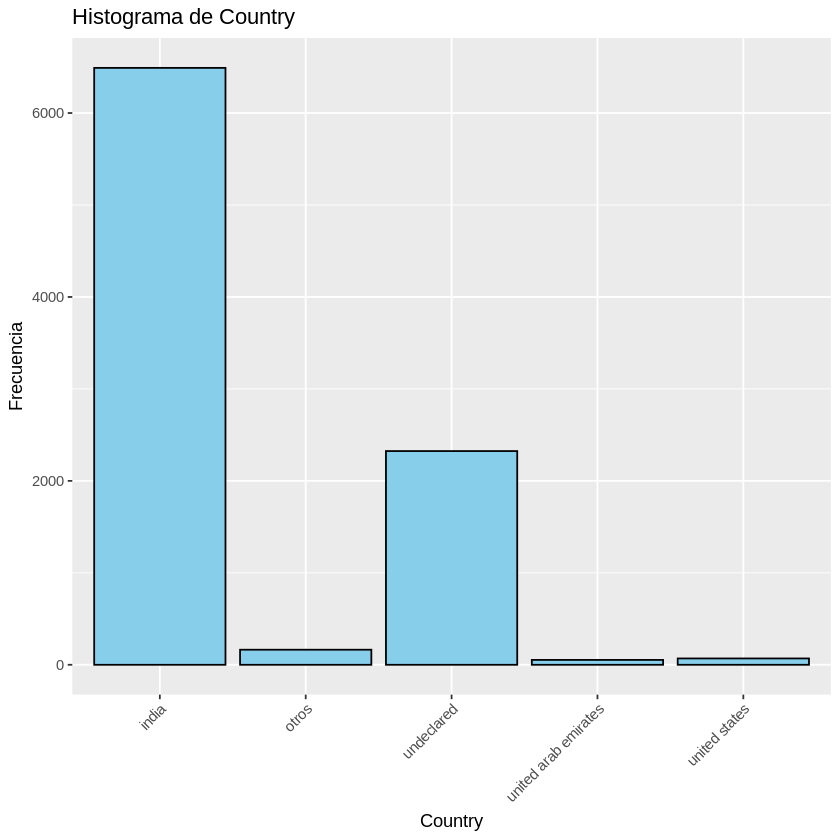

In [269]:
ggplot(df_subset, aes(x = country)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Country", x = "Country", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Lead Source

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


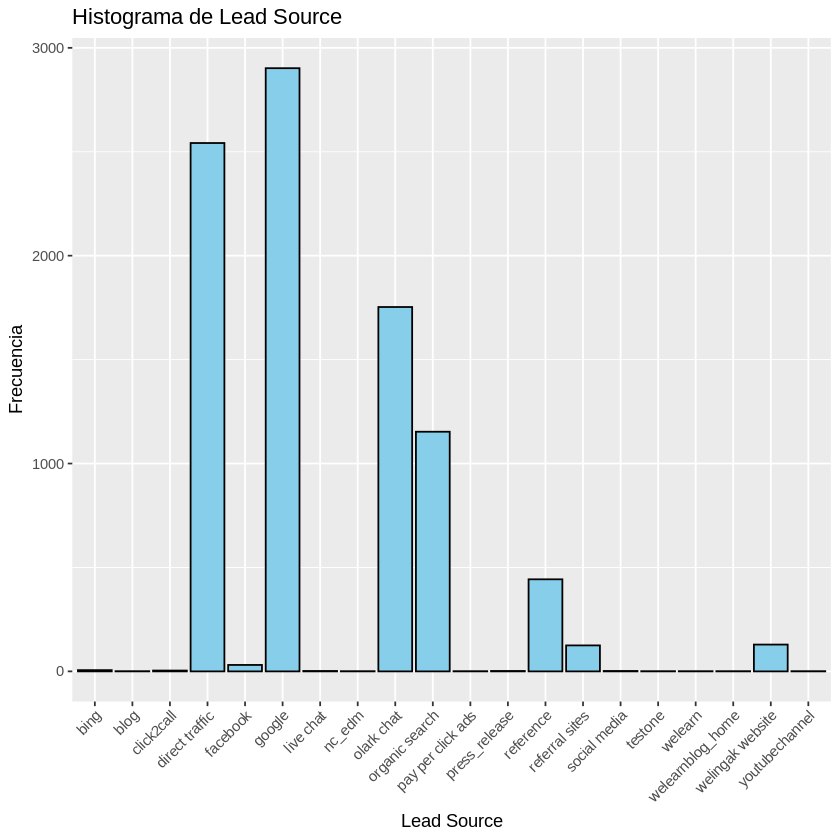

In [270]:
# prompt: histograma de Lead Source

# Assuming 'df_subset' is your data frame and 'Lead Source' is a column

library(ggplot2)

ggplot(df_subset, aes(x = `lead_source`)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Lead Source", x = "Lead Source", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


  direct traffic         facebook           google       olark chat 
            2542               31             2902             1753 
  organic search            otros        reference   referral sites 
            1153               23              443              125 
welingak website 
             129 

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


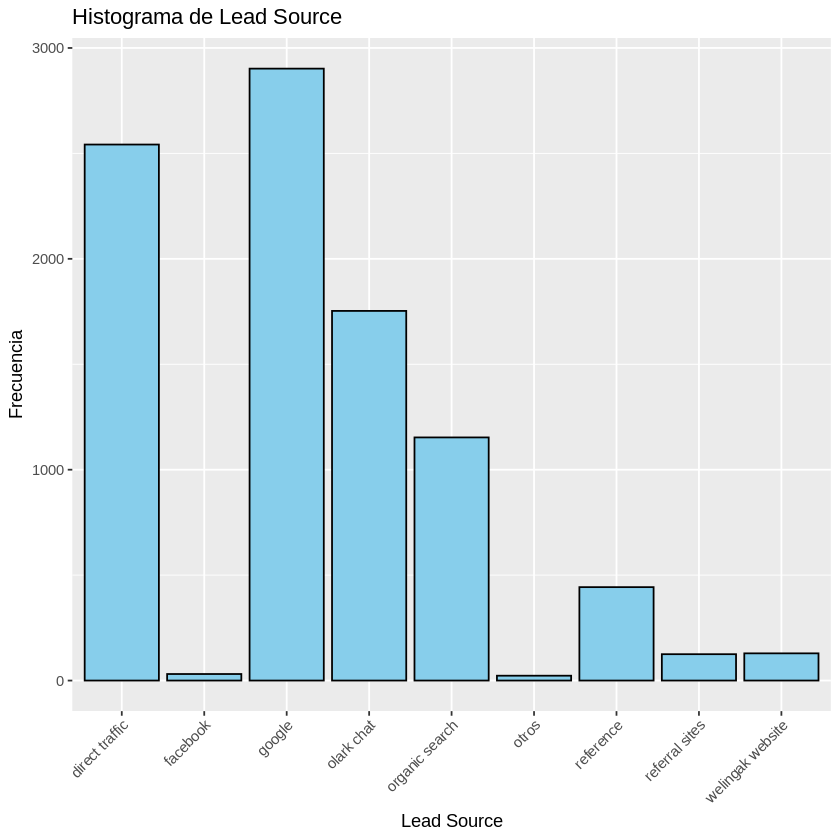

In [280]:
# prompt: para lead source quiero que queden solo direct traffic, Facebook, Google, olark chart, organic search, reference, referral sites, welingak website, otros, por las que no correspondas a la la lista queden en otros

# Define the allowed lead sources
allowed_lead_sources <- c("direct traffic", "facebook", "google", "olark chat", "organic search", "reference", "referral sites", "welingak website", "otros")

# Replace lead sources not in the allowed list with "otros"
df_subset$lead_source <- ifelse(df_subset$lead_source %in% allowed_lead_sources, df_subset$lead_source, "otros")

# Verify the changes
table(df_subset$lead_source)

# Now, you can proceed with your analysis or visualizations using the updated 'lead_source' column
ggplot(df_subset, aes(x = lead_source)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Lead Source", x = "Lead Source", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Optimizamos tags

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


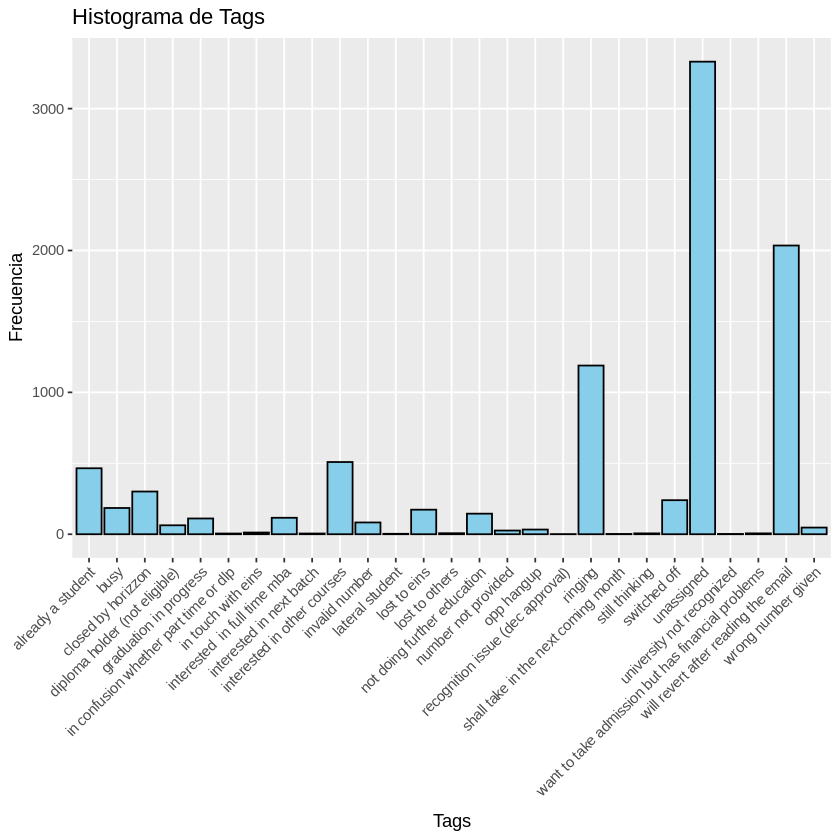

In [281]:
# prompt: histograma de tags

# Assuming 'df_subset' is your data frame and 'tags' is a column

library(ggplot2)

ggplot(df_subset, aes(x = tags)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Tags", x = "Tags", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [294]:
# prompt: en tags quiero pasar estas categorias "in confusión wheter part time or dlp, in touch with eins, interested in full time mba, lateral student, lost to other, recognition issue (dec aproval), shall take in the next coming month, still thionking, university not recognized, want to take admission but has financial problems," a otros

# Define the mapping for tags
tag_mapping <- c(
  "in confusion whether part time or dlp" = "other",
  "in touch with eins" = "other",
  "interested in next batch" = "other",
  "interested in full time mba" = "other",
  "lateral student" = "other",
  "lost to others" = "other",
  "recognition issue (dec approval)" = "other",
  "shall take in the next coming month" = "other",
  "still thinking" = "other",
  "university not recognized" = "other",
  "want to take admission but has financial problems" = "other"
)


# Replace the tags in the 'tags' column using the mapping
df_subset$tags <- ifelse(df_subset$tags %in% names(tag_mapping), tag_mapping[df_subset$tags], df_subset$tags)


# Verify the changes
table(df_subset$tags)


                  already a student                                busy 
                                465                                 185 
                 closed by horizzon       diploma holder (not eligible) 
                                301                                  63 
             graduation in progress        interested  in full time mba 
                                111                                 116 
        interested in other courses                      invalid number 
                                509                                  83 
                       lost to eins         not doing further education 
                                173                                 145 
                number not provided                          opp hangup 
                                 26                                  33 
                              other                             ringing 
                                 49               

Warning message in geom_histogram(stat = "count", fill = "skyblue", color = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


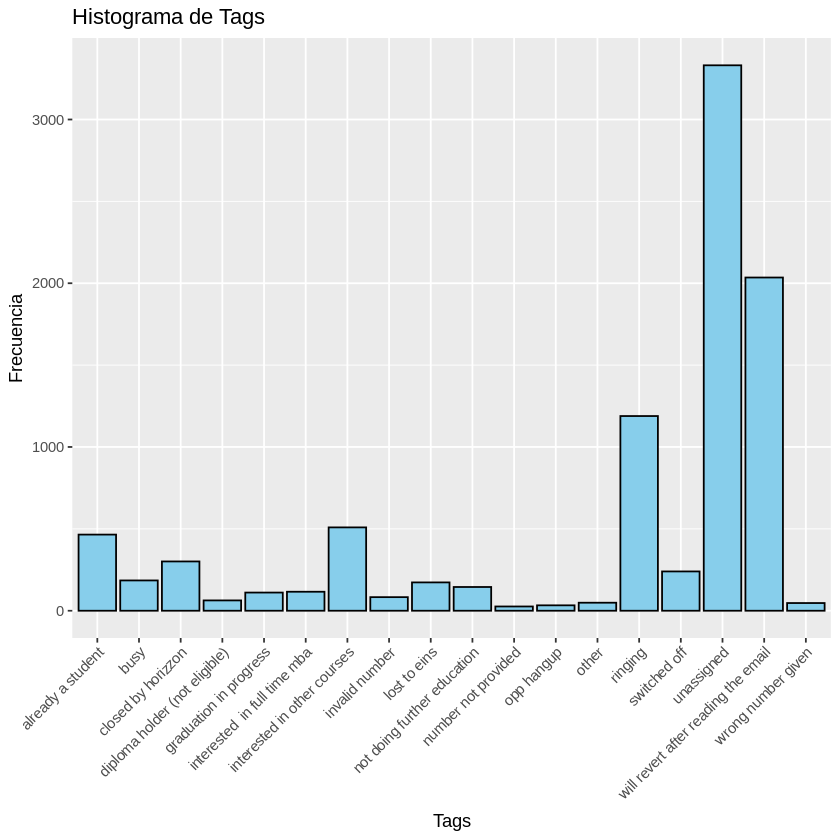

In [295]:
library(ggplot2)

ggplot(df_subset, aes(x = tags)) +
  geom_histogram(stat = "count", fill = "skyblue", color = "black") +
  labs(title = "Histograma de Tags", x = "Tags", y = "Frecuencia") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Desarrollo

## Pregunta 1

## Pregunta 2

### Pregunta a)

In [296]:
names(df_subset)


[1] "time_on_site"     "total_visits"     "lead_source"      "lead_origin"     
 [5] "lead_quality"     "lead_profile"     "specialization"   "country"         
 [9] "city"             "no_email"         "tags"             "page_views_visit"
[13] "activiy_index"    "profile_index"    "activity_score"   "profile_score"   
[17] "free_copy"

Las variables "activity_index", "profile_index", "activy_score", "profile_score" y "tags" son variables que usualmente son asignadas por criterior internos de un equipo, inicialmente me gustaría analizar solo a partir de comportamiento o caracteristicas del usuario

#### Primer modelo
Este modelo toma en cuenta variables que explican la interacción que tuvo el usuario con la página y el medio que utilizó para llegar a ella.
Este tipo de análisis es útil para observar que aspectos de la interacción del cliente habría que favorecer, por ejemplo, si la interacción más fuerte se realiza a través de medios directos "Google" entonces ese medio hay que mantenerlo constantemente reforzado para no perder esa clientela, sin embargo, si un medio como Social Media tiene poco impacto, podría ser útil reforzarlo si es que un análisis posterior indica que efectivamente hay espacio de mejora y oportunidad de crecer en dicho aspecto.


In [297]:
modelo_lm1 <- lm(
  page_views_visit ~ log1p(total_visits) +
    log1p(time_on_site) +
    (total_visits*time_on_site)^2 +
    lead_source +
    lead_origin +
    city +
    country,
  data = df_subset
)

summary(modelo_lm1)



Call:
lm(formula = page_views_visit ~ log1p(total_visits) + log1p(time_on_site) + 
    (total_visits * time_on_site)^2 + lead_source + lead_origin + 
    city + country, data = df_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0447 -0.3480  0.0223  0.3508 10.4127 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -5.474e-01  9.980e-02  -5.485 4.24e-08 ***
log1p(total_visits)                 2.415e+00  4.556e-02  53.004  < 2e-16 ***
log1p(time_on_site)                -1.377e-01  1.790e-02  -7.691 1.62e-14 ***
total_visits                       -4.738e-02  4.566e-03 -10.376  < 2e-16 ***
time_on_site                        3.134e-04  5.745e-05   5.455 5.03e-08 ***
lead_sourcefacebook                 6.717e-01  8.789e-01   0.764 0.444699    
lead_sourcegoogle                   2.482e-01  3.698e-02   6.712 2.04e-11 ***
lead_sourceolark chat              -1.751e-01  1.048e-01  -1.670 0.094946 .  


#### Segundo Modelo
Incorpora métricas prpias asignadas por el equipo

In [300]:
modelo_lm2 <- lm(
  page_views_visit ~
    activiy_index +
    profile_index +
    log1p(total_visits) +
    log1p(time_on_site) +
    (total_visits + time_on_site)^2 +
    lead_source +
    lead_origin +
    #(activity_score + profile_score) +
    (activity_score * profile_score) +
    tags +
    city +
    country +
    free_copy,
  data = df_subset
)

summary(modelo_lm2)



Call:
lm(formula = page_views_visit ~ activiy_index + profile_index + 
    log1p(total_visits) + log1p(time_on_site) + (total_visits + 
    time_on_site)^2 + lead_source + lead_origin + (activity_score * 
    profile_score) + tags + city + country + free_copy, data = df_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5524 -0.3850  0.0168  0.3832 10.4242 

Coefficients: (63 not defined because of singularities)
                                                   Estimate Std. Error t value
(Intercept)                                       2.501e+00  8.500e-01   2.942
activiy_index02.medium                           -1.608e+00  1.433e+00  -1.122
activiy_index03.low                              -2.565e+00  6.420e-01  -3.996
activiy_indexunassigned                          -3.210e+00  8.431e-01  -3.808
profile_index02.medium                           -1.513e+00  6.841e-01  -2.211
profile_index03.low                              -7.688e-01  7.735e-01  -0.994
profile_indexuna

### Pregunta b)

#### Selecciones automáticas sencillas de variables

In [301]:
# Selección automática de variables (dirección "both")
#modelo_lm2_step <- step(modelo_lm2, direction = "forward", trace = FALSE)
#modelo_lm2_step <- step(modelo_lm2, direction = "backward", trace = FALSE)
modelo_lm1_step <- step(modelo_lm1, direction = "both", trace = FALSE)

# Ver el resumen del modelo seleccionado
summary(modelo_lm1_step)


Call:
lm(formula = page_views_visit ~ log1p(total_visits) + log1p(time_on_site) + 
    (total_visits * time_on_site)^2 + lead_source + lead_origin + 
    city + country, data = df_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0447 -0.3480  0.0223  0.3508 10.4127 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -5.474e-01  9.980e-02  -5.485 4.24e-08 ***
log1p(total_visits)                 2.415e+00  4.556e-02  53.004  < 2e-16 ***
log1p(time_on_site)                -1.377e-01  1.790e-02  -7.691 1.62e-14 ***
total_visits                       -4.738e-02  4.566e-03 -10.376  < 2e-16 ***
time_on_site                        3.134e-04  5.745e-05   5.455 5.03e-08 ***
lead_sourcefacebook                 6.717e-01  8.789e-01   0.764 0.444699    
lead_sourcegoogle                   2.482e-01  3.698e-02   6.712 2.04e-11 ***
lead_sourceolark chat              -1.751e-01  1.048e-01  -1.670 0.094946 .  


In [302]:
# Selección automática de variables (dirección "both")
#modelo_lm2_step <- step(modelo_lm2, direction = "forward", trace = FALSE)
#modelo_lm2_step <- step(modelo_lm2, direction = "backward", trace = FALSE)
modelo_lm2_step <- step(modelo_lm2, direction = "both", trace = FALSE)

# Ver el resumen del modelo seleccionado
summary(modelo_lm2_step)



Call:
lm(formula = page_views_visit ~ log1p(total_visits) + log1p(time_on_site) + 
    total_visits + time_on_site + lead_source + lead_origin + 
    activity_score + tags + city + country + free_copy + total_visits:time_on_site, 
    data = df_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0992 -0.3765  0.0115  0.3820 10.4474 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -7.497e-01  2.057e-01  -3.645 0.000269
log1p(total_visits)                      2.412e+00  4.576e-02  52.697  < 2e-16
log1p(time_on_site)                     -1.338e-01  1.789e-02  -7.478 8.27e-14
total_visits                            -4.784e-02  4.555e-03 -10.504  < 2e-16
time_on_site                             3.199e-04  5.863e-05   5.457 4.98e-08
lead_sourcefacebook                      5.054e-01  8.852e-01   0.571 0.568011
lead_sourcegoogle                        1.873e-01  4.328e-02   4.327 1.53e-05
lead_

##### Selección compleja automática de variables

60 x 1 sparse Matrix of class "dgCMatrix"
                                                   s1
(Intercept)                              0.9997910602
total_visits                             0.1104105406
time_on_site                             0.0001234119
lead_sourcefacebook                      0.3454844927
lead_sourcegoogle                        0.5565325305
lead_sourceolark chat                   -1.2055223517
lead_sourceorganic search                1.3752981781
lead_sourceotros                         0.4638585911
lead_sourcereference                     0.3748783735
lead_sourcereferral sites                1.4785752094
lead_sourcewelingak website              0.3932518234
lead_originlanding page submission       0.9310588113
lead_originlead add form                -1.6021155787
lead_originlead import                  -1.5546983274
activity_score11                        -0.2405540410
activity_score12                        -0.1099153078
activity_score13                        

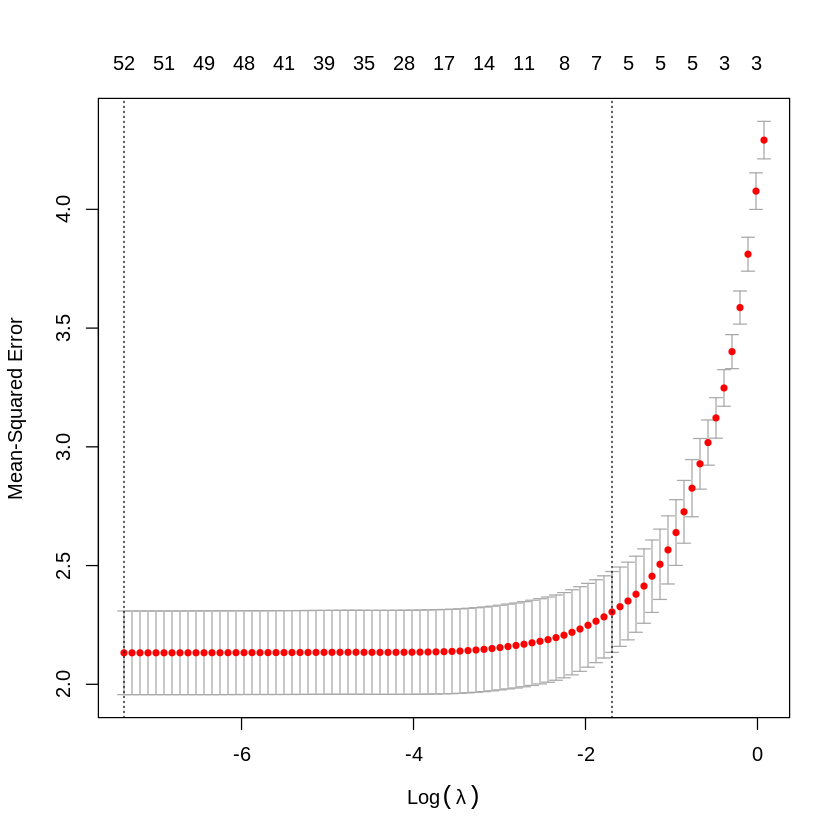

In [303]:
library(glmnet)

# Convertir factores a dummies para usar glmnet
X <- model.matrix(page_views_visit ~ total_visits + time_on_site + lead_source + lead_origin +
                    activity_score + profile_score + tags + free_copy + profile_index + activiy_index,
                  data = df_subset)[, -1]  # eliminar intercepto

y <- df_subset$page_views_visit

# Lasso con validación cruzada
cv_model <- cv.glmnet(X, y, alpha = 1)  # alpha=1 → Lasso
plot(cv_model)

# Ver coeficientes seleccionados
coef(cv_model, s = "lambda.min")


## Pregunta 3

#### Random Forest

In [312]:
if(!require(caTools)){install.packages("caTools")}
if(!require(randomForest)){install.packages("randomForest")}

Loading required package: randomForest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘randomForest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [310]:
# Cargar librerías necesarias
library(caTools)   # Para dividir los datos
library(tidyverse) # Para manipulación moderna de datos

# Asegura que df_subset existe
# Suponemos que df_subset ya tiene las variables limpias y transformadas

# Fijar semilla para que el split sea reproducible
set.seed(123)

# Dividir datos: 70% entrenamiento, 30% prueba
split <- sample.split(df_subset$page_views_visit, SplitRatio = 0.7)

# Crear sets de entrenamiento y prueba
train_data <- subset(df_subset, split == TRUE)
test_data  <- subset(df_subset, split == FALSE)


In [315]:
# prompt: usemos ahora random forest

# Ajustar el modelo de Random Forest
library(randomForest)
rf_model <- randomForest(page_views_visit ~ ., data = train_data, ntree = 500, mtry = 4) # Ajusta ntree y mtry según sea necesario

# Imprimir resumen del modelo
print(rf_model)

# Predecir en el set de prueba
predictions <- predict(rf_model, newdata = test_data)

# Evaluar el modelo (ejemplo con RMSE)
rmse <- sqrt(mean((predictions - test_data$page_views_visit)^2))
print(paste("RMSE:", rmse))

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(formula = page_views_visit ~ ., data = train_data,      ntree = 500, mtry = 4) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 1.515258
                    % Var explained: 65.05
[1] "RMSE: 1.20737725385752"


#### KNN

In [321]:
if(!require(kknn)){install.packages("kknn")}  # Si no lo tienes aún
library(kknn)

# Convertir factores a numérico para todas las variables predictoras
predictors <- c("total_visits", "time_on_site", "lead_source", "lead_origin", "city", "country",'tags','free_copy')

for (col in predictors) {
  if (is.factor(train_data[[col]])) {
    train_data[[col]] <- as.numeric(train_data[[col]])
    test_data[[col]] <- as.numeric(test_data[[col]])
  }
}


knn_model <- kknn(
  page_views_visit ~ total_visits + time_on_site + lead_source + lead_origin + city + country,
  train = train_data,
  test = test_data,
  k = 5,
  kernel = "rectangular"  # puedes probar otros como "triangular", "gaussian", etc.
)

# Obtener predicciones
pred_knn <- fitted(knn_model)


library(caret)
rmse_knn <- RMSE(pred_knn, test_data$page_views_visit)
r2_knn <- R2(pred_knn, test_data$page_views_visit)

cat("KNN (regresión) - RMSE:", rmse_knn, "\n")
cat("KNN (regresión) - R²:", r2_knn, "\n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘igraph’


Warning message in install.packages("kknn"):
“installation of package ‘igraph’ had non-zero exit status”
Warning message in install.packages("kknn"):
“installation of package ‘kknn’ had non-zero exit status”


ERROR: Error in library(kknn): there is no package called ‘kknn’


## Pregunta 4

### Pregunta a)

In [322]:
df_subset <- df_subset %>%
  mutate(
    lead_source    = as.factor(lead_source),
    lead_origin    = as.factor(lead_origin),
    tags           = as.factor(tags),
    free_copy      = as.factor(free_copy),
    profile_index  = as.factor(profile_index),
    activiy_index  = as.factor(activiy_index)
  )


In [335]:
modelo_poisson <- glm(
  page_views_visit ~
    log(total_visits + 1) +
    log(time_on_site + 1) +
    lead_source +
    lead_origin +
    #(activity_score * profile_score) +
    tags +
    free_copy,
  data = df_subset,
  family = poisson()
)

summary(modelo_poisson)


Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 2.500000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 2.670000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.330000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.500000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 3.500000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.500000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.500000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.500000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 2.330000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 8.500000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 5.500000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 3.500000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.500000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 1.


Call:
glm(formula = page_views_visit ~ log(total_visits + 1) + log(time_on_site + 
    1) + lead_source + lead_origin + tags + free_copy, family = poisson(), 
    data = df_subset)

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -0.514146   0.052182  -9.853  < 2e-16
log(total_visits + 1)                    0.635208   0.012377  51.323  < 2e-16
log(time_on_site + 1)                    0.052002   0.005768   9.016  < 2e-16
lead_sourcefacebook                      0.305756   0.481033   0.636 0.525023
lead_sourcegoogle                        0.083308   0.019319   4.312 1.62e-05
lead_sourceolark chat                   -1.673873   0.071229 -23.500  < 2e-16
lead_sourceorganic search                0.211517   0.020058  10.545  < 2e-16
lead_sourceotros                         0.206449   0.134226   1.538 0.124033
lead_sourcereference                    -0.039577   0.400752  -0.099 0.921331
lead_sourcereferral sit

In [336]:
if(!require(performance)){install.packages("performance")}
library(performance)
check_overdispersion(modelo_poisson)



No overdispersion detected.



# Overdispersion test

       dispersion ratio =    0.538
  Pearson's Chi-Squared = 4879.447
                p-value =        1


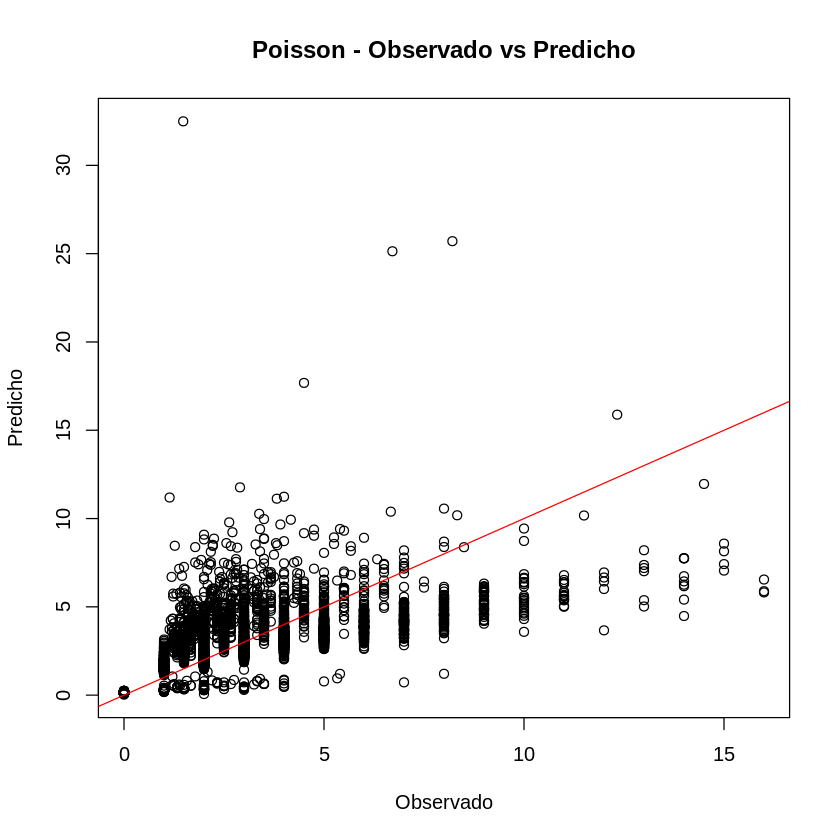

In [337]:
predicted <- predict(modelo_poisson, type = "response")
plot(df_subset$page_views_visit, predicted,
     xlab = "Observado", ylab = "Predicho", main = "Poisson - Observado vs Predicho")
abline(0, 1, col = "red")


### Pregunta b)

# Resumen